In [25]:
from __future__ import print_function
import sys
import os
from getpass import getuser
import string
import subprocess
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as netcdf4
import xarray as xr
import pandas
#import regionmask
import cartopy.crs as ccrs
from IPython.display import display, Math, Latex
import warnings

# import own utils module
from func_utils import *

# do plotting settings
#set_plot_param()

In [26]:
model='mpiesm'
#agg='seas'   #to add options for months (seas) and lats
case_flag='crop-ctl'
signal='local'

# set directories
outdir='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'

# Define directory where processing is done -- subject to change
outdir='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'

# go to processing directory 
os.chdir(procdir)

# ignore all runtime warnings
warnings.filterwarnings('ignore')

In [63]:
# read in data
def read_ebal_data(case_flag,agg,model,signal='local',outdir=outdir,mask=None):
    outdir_old=outdir
    outdir=outdir+case_flag+'/'
    if model=='cesm':
        var_list=['FSDS','FSR','FLDS','FIRE','FSH','EFLX_LH_TOT','TG','TSA','albedo','TS_ebal']
        table='Lmon'
        ini=''
    elif model=='mpiesm':
        var_list=['rsds','rsus','rlds','rlus','hfss','hfls','ts','tas','albedo','ts_ebal']
        table='Amon'
        ini=''
    elif model=='ecearth':
        var_list=['ssrd','SWout','strd','LWout','sshf','slhf','stl1','2t','albedo','ts_ebal']
        table='Amon'
        ini='interped_'
    if agg=='avg':
        mean='ensmean'
    elif agg=='lat':
        mean='ensmean'
    elif agg=='seas':
        mean='ymonensmean'
    if mask=='none':
        mask='lnd'
    var_cesm=var_list[0]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dSWin_total=ds_cesm[var_cesm+'_'+signal]
    #da=da_dSWin_total
    #print(da_dSWin_total)
    #fn_mask='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/masks/'+mask+'_mask.nc'
    #ds_mask = xr.open_dataset(fn_mask)
    #da_mask=ds_mask['latmask']
    #print(da_mask)
    #da_mask_2=xr.DataArray(da_mask,coords=(da.lat,da.lon))
    #print(da_mask_2)
    #da=xr.where(da_mask_2==1,da,np.nan)
    #da_dSWin_total=da
    da_dSWin_total=mask_data(da_dSWin_total,case_flag,model,mask)
    #print(da_dSWin_total)
    
    var_cesm=var_list[1]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dSWout_total=ds_cesm[var_cesm+'_'+signal]
    da_dSWout_total=mask_data(da_dSWout_total,case_flag,model,mask)

    # Long wave radiation
    var_cesm=var_list[2]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dLWin_total=ds_cesm[var_cesm+'_'+signal]
    da_dLWin_total=mask_data(da_dLWin_total,case_flag,model,mask)

    var_cesm=var_list[3]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dLWout_total=ds_cesm[var_cesm+'_'+signal]
    da_dLWout_total=mask_data(da_dLWout_total,case_flag,model,mask)
    # surface fluxes
    var_cesm=var_list[4]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dSHF_total=ds_cesm[var_cesm+'_'+signal]
    da_dSHF_total=mask_data(da_dSHF_total,case_flag,model,mask)

    var_cesm=var_list[5]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dLHF_total=ds_cesm[var_cesm+'_'+signal]
    da_dLHF_total=mask_data(da_dLHF_total,case_flag,model,mask)

    # surface temperature
    var_cesm=var_list[6]
    if model=='ecearth':
        fn_cesm='Lmon/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    else:
        fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dTS_total=ds_cesm[var_cesm+'_'+signal]
    da_dTS_total=mask_data(da_dTS_total,case_flag,model,mask)

    var_cesm=var_list[7]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dTREFHT_total=ds_cesm[var_cesm+'_'+signal]
    da_dTREFHT_total=mask_data(da_dTREFHT_total,case_flag,model,mask)

    # albedo 
    var_cesm=var_list[8]
    if model=='ecearth':
        fn_cesm='Amon/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'  
    else:
        fn_cesm='Lmon/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'    
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dalbedo_total=ds_cesm[var_cesm+'_'+signal]
    da_dalbedo_total=mask_data(da_dalbedo_total,case_flag,model,mask)
    
    if model=='ecearth':
        da_dSWin_total=da_dSWin_total/(3*3600)
        da_dSWout_total=da_dSWout_total/(3*3600)
        da_dLWin_total=da_dLWin_total/(3*3600)
        da_dLWout_total=da_dLWout_total/(3*3600)
        da_dSHF_total=da_dSHF_total/(3*3600)
        da_dLHF_total=da_dLHF_total/(3*3600)

    # radiative TS 
    var_cesm=var_list[9]
    fn_cesm=table+'/'+var_cesm+'/'+ini+var_cesm+'_'+case_flag+'_'+model+'_'+mean+'_signal-separated.nc'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_dTSR_total=ds_cesm[var_cesm+'_'+signal]
    da_dTSR_total=mask_data(da_dTSR_total,case_flag,model,mask)


    # check if balance closes for averaged values - works
    closure_SEB = da_dSWin_total.mean() - da_dSWout_total.mean() + da_dLWin_total.mean() - da_dLWout_total.mean() - da_dLHF_total.mean() - da_dSHF_total.mean() 
    print(closure_SEB)

    # do for local, non local and total
    # mask non lnd areas out
    # calculate annual global averaged of terms and calculate resmask
    if agg != 'lat':
        # Short wave radiation
        dSWin_total  = da_dSWin_total.mean(dim=('lat','lon')).values
        dSWout_total = da_dSWout_total.mean(dim=('lat','lon')).values

        dSWnet_total  = (dSWin_total - dSWout_total)

        # Long wave radiation
        dLWin_total = da_dLWin_total.mean(dim=('lat','lon')).values
        dLWout_total   = da_dLWout_total.mean(dim=('lat','lon')).values

        dLWnet_total = (dLWin_total - dLWout_total)

        # surface fluxes
        dSHF_total = da_dSHF_total.mean(dim=('lat','lon')).values
        dLHF_total = da_dLHF_total.mean(dim=('lat','lon')).values

        # surface temperature
        dTS_total    = da_dTS_total.mean(dim=('lat','lon')).values
        dTSA_total    = da_dTREFHT_total.mean(dim=('lat','lon')).values
        dTSR_total    = da_dTSR_total.mean(dim=('lat','lon')).values

        #albedo
        dalbedo_total = da_dalbedo_total.mean(dim=('lat','lon')).values
    elif agg=='lat':
        # Short wave radiation
        dSWin_total  = da_dSWin_total.mean(dim=('lon')).values
        dSWout_total = da_dSWout_total.mean(dim=('lon')).values

        dSWnet_total  = (dSWin_total - dSWout_total)

        # Long wave radiation
        dLWin_total = da_dLWin_total.mean(dim=('lon')).values
        dLWout_total   = da_dLWout_total.mean(dim=('lon')).values

        dLWnet_total = (dLWin_total - dLWout_total)

        # surface fluxes
        dSHF_total = da_dSHF_total.mean(dim=('lon')).values
        dLHF_total = da_dLHF_total.mean(dim=('lon')).values

        # surface temperature
        dTS_total    = da_dTS_total.mean(dim=('lon')).values
        dTSA_total    = da_dTREFHT_total.mean(dim=('lon')).values
        dTSR_total    = da_dTSR_total.mean(dim=('lon')).values

        #albedo
        dalbedo_total = da_dalbedo_total.mean(dim=('lon')).values
    if model=='ecearth':
        add='_local'
    else:
        add=''
    if agg =='avg':
        fn_ctl_SWin=outdir_old+'frst-ctl/'+table+'/'+var_list[0]+'/'+ini+var_list[0]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_SWin=xr.open_dataset(fn_ctl_SWin)
        SWin_ctl=ds_cesm_SWin[var_list[0]+add].mean().values
        fn_ctl_SWout=outdir_old+'frst-ctl/'+table+'/'+var_list[1]+'/'+ini+var_list[1]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_SWout=xr.open_dataset(fn_ctl_SWout)
        SWout_ctl=ds_cesm_SWout[var_list[1]+add].mean().values
        fn_ctl_LWout=outdir_old+'frst-ctl/'+table+'/'+var_list[3]+'/'+ini+var_list[3]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_LWout=xr.open_dataset(fn_ctl_LWout)
        LWout_ctl=ds_cesm_LWout[var_list[3]+add].mean().values
        fn_ctl_TSR=outdir_old+'frst-ctl/'+table+'/'+var_list[9]+'/'+ini+var_list[9]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_TSR=xr.open_dataset(fn_ctl_TSR)
        TSR_ctl=ds_cesm_TSR[var_list[9]+add].mean().values
    elif agg=='seas':
        if model !='ecearth':
            fn_ctl_SWin=outdir_old+'frst-ctl/'+table+'/'+var_list[0]+'/'+ini+var_list[0]+'_ctl_'+model+'_150-years.nc'
            ds_cesm_SWin=xr.open_dataset(fn_ctl_SWin)
            SWin_ctl=ds_cesm_SWin[var_list[0]+add].groupby('time.month').mean().mean(dim=('lat','lon')).values
            fn_ctl_SWout=outdir_old+'frst-ctl/'+table+'/'+var_list[1]+'/'+ini+var_list[1]+'_ctl_'+model+'_150-years.nc'
            ds_cesm_SWout=xr.open_dataset(fn_ctl_SWout)
            SWout_ctl=ds_cesm_SWout[var_list[1]+add].groupby('time.month').mean().mean(dim=('lat','lon')).values
            fn_ctl_LWout=outdir_old+'frst-ctl/'+table+'/'+var_list[3]+'/'+ini+var_list[3]+'_ctl_'+model+'_150-years.nc'
            ds_cesm_LWout=xr.open_dataset(fn_ctl_LWout)
            LWout_ctl=ds_cesm_LWout[var_list[3]+add].groupby('time.month').mean().mean(dim=('lat','lon')).values
            fn_ctl_TSR=outdir_old+'frst-ctl/'+table+'/'+var_list[9]+'/'+ini+var_list[9]+'_ctl_'+model+'_150-years.nc'
            ds_cesm_TSR=xr.open_dataset(fn_ctl_TSR)
            TSR_ctl=ds_cesm_TSR[var_list[9]+add].groupby('time.month').mean().mean(dim=('lat','lon')).values
        else:
            fn_ctl_SWin=outdir_old+'frst-ctl/'+table+'/'+var_list[0]+'/'+ini+var_list[0]+'_frst-ctl_'+model+'_ymonensmean_signal-separated.nc'
            ds_cesm_SWin=xr.open_dataset(fn_ctl_SWin)
            SWin_ctl=ds_cesm_SWin[var_list[0]].mean(dim=('lat','lon')).values
            fn_ctl_SWout=outdir_old+'frst-ctl/'+table+'/'+var_list[1]+'/'+ini+var_list[1]+'_frst-ctl_'+model+'_ymonensmean_signal-separated.nc'
            ds_cesm_SWout=xr.open_dataset(fn_ctl_SWout)
            SWout_ctl=ds_cesm_SWout[var_list[1]].mean(dim=('lat','lon')).values
            fn_ctl_LWout=outdir_old+'frst-ctl/'+table+'/'+var_list[3]+'/'+ini+var_list[3]+'_frst-ctl_'+model+'_ymonensmean_signal-separated.nc'
            ds_cesm_LWout=xr.open_dataset(fn_ctl_LWout)
            LWout_ctl=ds_cesm_LWout[var_list[3]].mean(dim=('lat','lon')).values
            fn_ctl_TSR=outdir_old+'frst-ctl/'+table+'/'+var_list[9]+'/'+ini+var_list[9]+'_frst-ctl_'+model+'_ymonensmean_signal-separated.nc'
            ds_cesm_TSR=xr.open_dataset(fn_ctl_TSR)
            TSR_ctl=ds_cesm_TSR[var_list[9]].mean(dim=('lat','lon')).values+273.15
    elif agg=='lat':
        fn_ctl_SWin=outdir_old+'frst-ctl/'+table+'/'+var_list[0]+'/'+ini+var_list[0]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_SWin=xr.open_dataset(fn_ctl_SWin)
        SWin_ctl=ds_cesm_SWin[var_list[0]+add].mean(dim=('lon','time')).values
        fn_ctl_SWout=outdir_old+'frst-ctl/'+table+'/'+var_list[1]+'/'+ini+var_list[1]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_SWout=xr.open_dataset(fn_ctl_SWout)
        SWout_ctl=ds_cesm_SWout[var_list[1]+add].mean(dim=('lon','time')).values
        fn_ctl_LWout=outdir_old+'frst-ctl/'+table+'/'+var_list[3]+'/'+ini+var_list[3]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_LWout=xr.open_dataset(fn_ctl_LWout)
        LWout_ctl=ds_cesm_LWout[var_list[3]+add].mean(dim=('lon','time')).values
        fn_ctl_TSR=outdir_old+'frst-ctl/'+table+'/'+var_list[9]+'/'+ini+var_list[9]+'_ctl_'+model+'_150-years.nc'
        ds_cesm_TSR=xr.open_dataset(fn_ctl_TSR)
        TSR_ctl=ds_cesm_TSR[var_list[9]+add].mean(dim=('lon','time')).values
    if model=='ecearth':
        SWin_ctl=SWin_ctl/(3*3600)
        SWout_ctl=SWout_ctl/(3*3600)
        LWout_ctl=LWout_ctl/(3*3600)
    # terms necessary for STDC (read in ctl, average then add signals)
    ##distinguish between cases, different between irr and harv and others
    if case_flag=='crop-ctl' or case_flag=='frst-ctl' or case_flag=='crop-frst':
        #check which case if crop/frst just add signal d read before, if irr-ctl or harv-frst also add signal lcc
        SWin  = SWin_ctl+dSWin_total
        SWout = SWout_ctl+dSWout_total
        TSR = TSR_ctl+dTSR_total
        LWout     = LWout_ctl+dSWout_total
    elif case_flag=='irr-crop' or case_flag=='harv-frst':
        if case_flag=='irr-crop':
            case_lcc='crop-ctl'
        elif case_flag=='harv-frst':
            case_lcc='frst-ctl'
        #add signal lcc and case
        #read in signals crop-ctl
        outdir_lcc='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'+case_lcc+'/'
        fn_cesm=table+'/'+var_list[0]+'/'+ini+var_list[0]+'_'+case_lcc+'_'+model+'_'+mean+'_signal-separated.nc'
        ds_cesm=xr.open_dataset(outdir_lcc+fn_cesm)
        da_dSWin_total_lcc=ds_cesm[var_list[0]+'_'+signal]
        da_dSWin_total_lcc=mask_data(da_dSWin_total,case_flag,model,mask)

        fn_cesm=table+'/'+var_list[1]+'/'+ini+var_list[1]+'_'+case_lcc+'_'+model+'_'+mean+'_signal-separated.nc'
        ds_cesm=xr.open_dataset(outdir_lcc+fn_cesm)
        da_dSWout_total_lcc=ds_cesm[var_list[1]+'_'+signal]
        da_dSWout_total_lcc=mask_data(da_dSWout_total,case_flag,model,mask)

        fn_cesm=table+'/'+var_list[3]+'/'+ini+var_list[3]+'_'+case_lcc+'_'+model+'_'+mean+'_signal-separated.nc'
        ds_cesm=xr.open_dataset(outdir_lcc+fn_cesm)
        da_dLWout_total_lcc=ds_cesm[var_list[3]+'_'+signal]
        da_dLWout_total_lcc=mask_data(da_dLWout_total,case_flag,model,mask)

        fn_cesm=table+'/'+var_list[9]+'/'+ini+var_list[9]+'_'+case_lcc+'_'+model+'_'+mean+'_signal-separated.nc'
        ds_cesm=xr.open_dataset(outdir_lcc+fn_cesm)
        da_dTSR_total_lcc=ds_cesm[var_list[9]+'_'+signal]
        da_dTSR_total_lcc=mask_data(da_dTSR_total,case_flag,model,mask)
        if agg == 'avg' or agg=='seas':
            dSWin_total_lcc  = da_dSWin_total_lcc.mean(dim=('lat','lon')).values
            dSWout_total_lcc = da_dSWout_total_lcc.mean(dim=('lat','lon')).values
            dLWout_total_lcc   = da_dLWout_total_lcc.mean(dim=('lat','lon')).values
            dTSR_total_lcc    = da_dTSR_total_lcc.mean(dim=('lat','lon')).values
        elif agg=='lat':
            dSWin_total_lcc  = da_dSWin_total_lcc.mean(dim=('lon')).values
            dSWout_total_lcc = da_dSWout_total_lcc.mean(dim=('lon')).values
            dLWout_total_lcc   = da_dLWout_total_lcc.mean(dim=('lon')).values
            dTSR_total_lcc    = da_dTSR_total_lcc.mean(dim=('lon')).values

        SWin  = SWin_ctl+dSWin_total+dSWin_total_lcc
        SWout = SWout_ctl+dSWout_total+dSWout_total_lcc
        TSR = TSR_ctl+dTSR_total+dTSR_total_lcc
        LWout     = LWout_ctl+dLWout_total+dLWout_total_lcc
        #print(da_dSWin_total)
    return dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl

In [64]:
# plot SEB
def plot_SEB(dSWnet,dLWnet,dSHF,dLHF,case_flag):
    ax = plt.subplot(111)
    ind = np.arange(4)  
    ax.bar(ind,[dSWnet,dLWnet,dSHF,dLHF])
    ax.set_xticks(ind)
    ax.set_xticklabels(('$\Delta$SWnet','$\Delta$LWnet','$\Delta$SHF','$\Delta$LHF'))
    ax.set_ylabel(case_flag+' impact [W m$^{-2}$]')
    ax.set_title('Surface Energy Balance', loc='right', fontsize=13)
    ax.axhline(0, color='gray', linewidth=1)


def do_STDC(TSR,dTSR, SWin,SWout,SWin_ctl,SWout_ctl,dSWin,dLWin,dLHF,dSHF):
    """Do Surface Temperature Decomposition"""
    
    
    # Stefan Boltzman constant
    sigma = 5.67e-8 # W m² K^-4

    # assumption: emissivity is constant (1)
    
    print('TSR',TSR)
    term = 1 / (4 * sigma * TSR**3)

    dT_albedo = term * (-1) * SWin * (SWout/SWin - SWout_ctl/SWin_ctl) 
    dT_SWin   = term * (1 - SWout/SWin) * dSWin
    dT_LWin   = term * dLWin 
    dT_LHF    = term * (-1) * dLHF
    dT_SHF    = term * (-1) * dSHF

    print('SWin',dT_SWin)
    print('LWin',dT_LWin)
    print('LHF',dT_LHF)
    # Wim didn't calculate emissivity -> check why? 
    # also don't include here (suppose is 1, black body)

    dT       = [ dT_LHF, dT_SHF, dT_albedo, dT_SWin, dT_LWin,  dTSR]
    
    # Again check closure for dTs (calculated and model diagnostic)

    closure_dT    = dTSR - sum(dT[:5]);
    #closure_dT_rel = closure_dT / dTSR * 100
    print(closure_dT)
    #print(closure_dT_rel)
    #print('closure dTs')
    #print(closure_dT)
    #print('closure dT relative')
    #print(closure_dT_rel)
    
    return dT


def plot_STDC(dT_array, ax = False, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition for annual data"""

    if ax == False:
        ax = plt.subplot(111)
        
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [cmap(0.2), cmap(0.3), cmap(0.4), cmap(0.05), cmap(0.1), 'maroon', 'maroon']

    # plot STDC
    ind = np.arange(7)  
    ax.bar(ind,dT_array, color=colors_terms)

    ax.set_xticks(ind)
    ax.set_xticklabels(('LHF','SHF',r'$\alpha$','SWin','LWin','$\Delta$Ts', '$\Delta$T2M'))
    ax.set_ylabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('Reservoir cells > '+str(threshold)+'%', loc='right');
    ax.set_xlim([ind.min()-1,ind.max()+1])
    ax.axhline(0, color='gray', linewidth=1)
    ax.axvline(4.5, color='lightgray',  linestyle='dashed',linewidth=1)
    if panel_label != False:
        ax.text(0, 1.02, panel_label, color='dimgrey', fontsize=12, transform=ax.transAxes, weight = 'bold') 
    if ylims != False:
        ax.set_ylim(ylims)
   
            
def plot_STDC_seas(dT_month,dT_year,approach='thiery', ax = False, legend = True, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition for seasonal cycle and year"""

    if ax == False:
        ax = plt.subplot(111)
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [ cmap(0.2), cmap(0.3), cmap(0.5), cmap(0.05), cmap(0.1)]
    months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

    print(dT_month)
    # plot monthly STCD
    ind_months = np.arange(12)  
    dT_month = np.asarray(dT_month)
    dT_month_stack = get_bottom(dT_month)

    for i in np.arange(0, dT_month.shape[0]-1):
        ax.bar(ind_months,dT_month[i], bottom=dT_month_stack[i], color=colors_terms[i])
    
    # plot annual STCD
    ind_year = 12.5
    dT_year = np.asarray(dT_year)
    dT_year_stack = get_bottom(dT_year)

    for j, term in enumerate(dT_year[:-1]):
        ax.bar(ind_year,dT_year[j], bottom = dT_year_stack[j], color=colors_terms[j])

    # plot mean temperature as line
    ax.plot(ind_months,dT_month[-1,:],  '-o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7)
    ax.plot(ind_year,dT_year[-1],  'o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7, label='_nolegend_')

    ind = np.append(ind_months,ind_year)
    # plot settings
    xticklabels = months+ ['year']
    ax.set_xticks(ind)
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('grid cells >'+str(threshold)+'% reservoir area fracrion', loc='right');
    ax.set_xlim([ind.min()-1,ind.max()+1]) 
    ax.axhline(0, color='gray', linewidth=1, label='_nolegend_');
    ax.axvline(11.75, color='lightgray',  linestyle='dashed',linewidth=1, label='_nolegend_') ;

    # optional arguments
    if legend:
        ax.legend([r'$\Delta$Ts','LHF','SHF',r'$\alpha$','SWin','LWin'], loc='center left',  bbox_to_anchor=(1, 0.5), frameon=False)
    if panel_label != False:
        ax.text(0.05, 0.9, panel_label, fontsize=16, transform=ax.transAxes)  
    if ylims != False:
        ax.set_ylim(ylims)

def plot_STDC_seas_all(dT_month_all,dT_year_all, ax = False, legend = True, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition for seasonal cycle and year"""

    if ax == False:
        ax = plt.subplot(111)
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [ cmap(0.2), cmap(0.3), cmap(0.5), cmap(0.05), cmap(0.1)]
    months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

    print(dT_month)
    # plot monthly STCD
    ind_months = np.arange(12)  
    dT_month = np.asarray(dT_month)
    dT_month_stack = get_bottom(dT_month)

    for i in np.arange(0, dT_month.shape[0]-1):
        ax.bar(ind_months,dT_month[i], bottom=dT_month_stack[i], color=colors_terms[i])
    
    # plot annual STCD
    ind_year = 12.5
    dT_year = np.asarray(dT_year)
    dT_year_stack = get_bottom(dT_year)

    for j, term in enumerate(dT_year[:-1]):
        ax.bar(ind_year,dT_year[j], bottom = dT_year_stack[j], color=colors_terms[j])

    # plot mean temperature as line
    ax.plot(ind_months,dT_month[-1,:],  '-o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7)
    ax.plot(ind_year,dT_year[-1],  'o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7, label='_nolegend_')

    ind = np.append(ind_months,ind_year)
    # plot settings
    xticklabels = months+ ['year']
    ax.set_xticks(ind)
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('grid cells >'+str(threshold)+'% reservoir area fracrion', loc='right');
    ax.set_xlim([ind.min()-1,ind.max()+1]) 
    ax.axhline(0, color='gray', linewidth=1, label='_nolegend_');
    ax.axvline(11.75, color='lightgray',  linestyle='dashed',linewidth=1, label='_nolegend_') ;

    # optional arguments
    if legend:
        ax.legend([r'$\Delta$Ts','LHF','SHF',r'$\alpha$','SWin','LWin'], loc='center left',  bbox_to_anchor=(1, 0.5), frameon=False)
    if panel_label != False:
        ax.text(0, 1.02, panel_label, color='dimgrey', fontsize=12, transform=ax.transAxes, weight = 'bold') 
    if ylims != False:
        ax.set_ylim(ylims)

def plot_STDC_lats(dT_lat,dT_year, model='cesm', ax = False, legend = True, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition over lats"""
    if model=='cesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/AREA_CESM.nc'
        ds_dummy=xr.open_dataset(path)
        lat=ds_dummy.lat.values
    elif model=='mpiesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/jsbach_T63GR15_11tiles_5layers_2005_dynveg_slm_glac.nc'
        ds_dummy=xr.open_dataset(path)
        lat=-1*ds_dummy.lat.values
    new=np.zeros((6,9))
    for i in np.arange(0, 5):
        print(i)
        #####read in lat, take the indices fulfilling certain conditions and use these to select data to average
        new[i,0]=np.nanmean(dT_lat[i][np.where(lat<-69.999)])
        new[i,1]=np.nanmean(dT_lat[i][np.where(((lat<-49.999) & (lat>-69.999)))])
        new[i,2]=np.nanmean(dT_lat[i][np.where(((lat<-29.999) & (lat>-49.999)))])
        new[i,3]=np.nanmean(dT_lat[i][np.where(((lat<-9.999) & (lat>-29.999)))])
        new[i,4]=np.nanmean(dT_lat[i][np.where(((lat<9.999) & (lat>-9.999)))])
        new[i,5]=np.nanmean(dT_lat[i][np.where(((lat<29.999) & (lat>9.999)))])
        new[i,6]=np.nanmean(dT_lat[i][np.where(((lat<49.999) & (lat>29.999)))])
        new[i,7]=np.nanmean(dT_lat[i][np.where(((lat<69.999) & (lat>49.999)))])
        new[i,8]=np.nanmean(dT_lat[i][np.where(((lat>69.999)))])
       
       # np.nan_to_num(new)
        #dT_lat_new[i]=np.asarray([new[0],new[1],new[2],new[3],new[4],new[5],new[6],new[7],new[8]])
    dT_lat=np.asarray(new)
    if ax == False:
        ax = plt.subplot(111)
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [ cmap(0.2), cmap(0.3),cmap(0.5), cmap(0.05), cmap(0.1)]
    groups = ['[-90,-70]', '[-70,-50]', '[-50,-30]', '[-30,-10]', '[-10,10]', '[10,30]', '[30,50]', '[50,70]', [70,90]]

    # plot monthly STCD
    ind_groups = np.arange(9)  
    dT_lat = np.asarray(dT_lat)
    dT_lat_stack = get_bottom(dT_lat)
   
    for i in np.arange(0, dT_lat.shape[0]-1):
        ax.barh(ind_groups,dT_lat[i], left=dT_lat_stack[i], color=colors_terms[i])

    # plot annual STCD
   # ind_year = 9.5
    #dT_year = np.asarray(dT_year)
    #dT_year_stack = get_bottom(dT_year)

    #for j, term in enumerate(dT_year[:-1]):
     #   ax.barh(ind_year,dT_year[j], bottom = dT_year_stack[j], color=colors_terms[j])

    # plot mean temperature as line
    ax.plot(dT_lat[0,:],ind_groups,  '-o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7)
   # ax.plot(ind_year,dT_year[-1],  'o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7, label='_nolegend_')

    #ind = np.append(ind_groups,ind_year)
    # plot settings
    #xticklabels = groups+ ['global']
    yticklabels = groups
    ind=ind_groups
    ax.set_yticks(ind)
    ax.set_yticklabels(yticklabels, Fontsize=7)
    ax.set_xlabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('grid cells >'+str(threshold)+'% reservoir area fracrion', loc='right');
    ax.set_ylim([ind.min()-1,ind.max()+1]) 
    ax.axvline(0, color='gray', linewidth=1, label='_nolegend_');
    ax.axhline(11.75, color='lightgray',  linestyle='dashed',linewidth=1, label='_nolegend_') ;
    # optional arguments
    if legend:
        ax.legend([r'$\Delta$Ts','LHF','SHF',r'$\alpha$','SWin','LWin'], loc='center left',  bbox_to_anchor=(1, 0.5), frameon=False)
    if panel_label != False:
        ax.text(0, 1.02, panel_label, color='dimgrey', fontsize=12, transform=ax.transAxes, weight = 'bold') 
    if ylims != False:
        ax.set_xlim(ylims)

def plot_STDC_lat_10(dT_lat,dT_year, model='cesm', ax = False, legend = True, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition over lats"""
    if model=='cesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/AREA_CESM.nc'
        ds_dummy=xr.open_dataset(path)
        lat=ds_dummy.lat.values
    elif model=='mpiesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/jsbach_T63GR15_11tiles_5layers_2005_dynveg_slm_glac.nc'
        ds_dummy=xr.open_dataset(path)
        lat=ds_dummy.lat.values
    new=np.zeros((6,17))
    for i in np.arange(0, 5):
        print(i)
        #####read in lat, take the indices fulfilling certain conditions and use these to select data to average
        new[i,0]=np.nanmean(dT_lat[i][np.where(lat<-79.999)])
        new[i,1]=np.nanmean(dT_lat[i][np.where(((lat<-69.999) & (lat>-79.999)))])
        new[i,2]=np.nanmean(dT_lat[i][np.where(((lat<-59.999) & (lat>-69.999)))])
        new[i,3]=np.nanmean(dT_lat[i][np.where(((lat<-49.999) & (lat>-59.999)))])
        new[i,4]=np.nanmean(dT_lat[i][np.where(((lat<-39.999) & (lat>-49.999)))])
        new[i,5]=np.nanmean(dT_lat[i][np.where(((lat<-29.999) & (lat>-39.999)))])
        new[i,6]=np.nanmean(dT_lat[i][np.where(((lat<-19.999) & (lat>-29.999)))])
        new[i,7]=np.nanmean(dT_lat[i][np.where(((lat<-9.999) & (lat>-19.999)))])
        new[i,8]=np.nanmean(dT_lat[i][np.where(((lat<0.999) & (lat>-9.999)))])
        new[i,9]=np.nanmean(dT_lat[i][np.where(((lat<9.999) & (lat>0.999)))])
        new[i,10]=np.nanmean(dT_lat[i][np.where(((lat<19.999) & (lat>9.999)))])
        new[i,11]=np.nanmean(dT_lat[i][np.where(((lat<29.999) & (lat>19.999)))])
        new[i,12]=np.nanmean(dT_lat[i][np.where(((lat<39.999) & (lat>29.999)))])
        new[i,13]=np.nanmean(dT_lat[i][np.where(((lat<49.999) & (lat>39.999)))])
        new[i,14]=np.nanmean(dT_lat[i][np.where(((lat<59.999) & (lat>49.999)))])
        new[i,15]=np.nanmean(dT_lat[i][np.where(((lat<69.999) & (lat>59.999)))])
        new[i,16]=np.nanmean(dT_lat[i][np.where(((lat>79.999)))])
       
       # np.nan_to_num(new)
        #dT_lat_new[i]=np.asarray([new[0],new[1],new[2],new[3],new[4],new[5],new[6],new[7],new[8]])
    dT_lat=np.asarray(new)
    if ax == False:
        ax = plt.subplot(111)
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [ cmap(0.2), cmap(0.3),cmap(0.5), cmap(0.05), cmap(0.1)]
    groups = ['[-80,90]','[-80, -70]', '[-70,-60]','[-60, -50]', '[-50,-40]','[-40,-30]','[-30,-20]','[-20,-10]', '[-10,0]','[0,10]', '[10,20]','[20,30]', '[30,40]','[40,50]', '[50,60]','[60,70]', '[70,80]']

    # plot monthly STCD
    ind_groups = np.arange(17)  
    dT_lat = np.asarray(dT_lat)
    dT_lat_stack = get_bottom(dT_lat)
   
    for i in np.arange(0, dT_lat.shape[0]-1):
        ax.barh(ind_groups,dT_lat[i], left=dT_lat_stack[i], color=colors_terms[i])

    # plot annual STCD
   # ind_year = 9.5
    #dT_year = np.asarray(dT_year)
    #dT_year_stack = get_bottom(dT_year)

    #for j, term in enumerate(dT_year[:-1]):
     #   ax.barh(ind_year,dT_year[j], bottom = dT_year_stack[j], color=colors_terms[j])

    # plot mean temperature as line
    ax.plot(dT_lat[0,:],ind_groups,  '-o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7)
   # ax.plot(ind_year,dT_year[-1],  'o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7, label='_nolegend_')

    #ind = np.append(ind_groups,ind_year)
    # plot settings
    #xticklabels = groups+ ['global']
    yticklabels = groups
    ind=ind_groups
    ax.set_yticks(ind)
    ax.set_yticklabels(yticklabels, Fontsize=7)
    ax.set_xlabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('grid cells >'+str(threshold)+'% reservoir area fracrion', loc='right');
    ax.set_ylim([ind.min()-1,ind.max()+1]) 
    ax.axvline(0, color='gray', linewidth=1, label='_nolegend_');
    ax.axhline(11.75, color='lightgray',  linestyle='dashed',linewidth=1, label='_nolegend_') ;
    # optional arguments
    if legend:
        ax.legend([r'$\Delta$Ts','LHF','SHF',r'$\alpha$','SWin','LWin'], loc='center left',  bbox_to_anchor=(1, 0.5), frameon=False)
    if panel_label != False:
        ax.text(0, 1.02, panel_label, color='dimgrey', fontsize=12, transform=ax.transAxes, weight = 'bold') 
    if ylims != False:
        ax.set_xlim(ylims)

def plot_STDC_lat_15(dT_lat,dT_year, model='cesm', ax = False, legend = True, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition over lats"""
    if model=='cesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/AREA_CESM.nc'
        ds_dummy=xr.open_dataset(path)
        lat=ds_dummy.lat.values
    elif model=='mpiesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/jsbach_T63GR15_11tiles_5layers_2005_dynveg_slm_glac.nc'
        ds_dummy=xr.open_dataset(path)
        lat=-1*ds_dummy.lat.values
    new=np.zeros((6,12))
    for i in np.arange(0, 5):
        print(i)
        print(dT_lat[i][np.where(lat>74.999)])
        print(i)
        print(dT_lat[i][np.where(((lat>59.999) & (lat<74.999)))])
        print(lat)
        print(len(dT_lat[i]))
        print(len(lat))
        #####read in lat, take the indices fulfilling certain conditions and use these to select data to average
        new[i,0]=np.nanmean(dT_lat[i][np.where(lat<-74.999)])
        new[i,1]=np.nanmean(dT_lat[i][np.where(((lat<-59.999) & (lat>-74.999)))])
        new[i,2]=np.nanmean(dT_lat[i][np.where(((lat<-44.999) & (lat>-59.999)))])
        new[i,3]=np.nanmean(dT_lat[i][np.where(((lat<-29.999) & (lat>-44.999)))])
        new[i,4]=np.nanmean(dT_lat[i][np.where(((lat<-14.999) & (lat>-29.999)))])
        new[i,5]=np.nanmean(dT_lat[i][np.where(((lat<0.0001) & (lat>-14.999)))])
        new[i,6]=np.nanmean(dT_lat[i][np.where(((lat<15.0001) & (lat>0.0001)))])
        new[i,7]=np.nanmean(dT_lat[i][np.where(((lat<30.0001) & (lat>15.0001)))])
        new[i,8]=np.nanmean(dT_lat[i][np.where(((lat<45.0001) & (lat>30.0001)))])
        new[i,9]=np.nanmean(dT_lat[i][np.where(((lat<60.0001) & (lat>45.0001)))])
        new[i,10]=np.nanmean(dT_lat[i][np.where(((lat<75.0001) & (lat>60.0001)))])
        new[i,11]=np.nanmean(dT_lat[i][np.where(((lat>75.0001)))])
       
       # np.nan_to_num(new)
        #dT_lat_new[i]=np.asarray([new[0],new[1],new[2],new[3],new[4],new[5],new[6],new[7],new[8]])
    dT_lat=np.asarray(new)
    if ax == False:
        ax = plt.subplot(111)
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [ cmap(0.2), cmap(0.3),cmap(0.5), cmap(0.05), cmap(0.1)]
    groups = ['75°-90°SH','60°-75°SH', '45°-60°SH','30°-45°SH', '15°-30°SH', '0°-15°SH','0°-15°NH', '15°-30°NH','30°-45°NH', '45°-60°NH','60°-75°NH', '75°-90°NH']

    # plot monthly STCD
    ind_groups = np.arange(12)  
    dT_lat = np.asarray(dT_lat)
    dT_lat_stack = get_bottom(dT_lat)
   
    for i in np.arange(0, dT_lat.shape[0]-1):
        ax.barh(ind_groups,dT_lat[i], left=dT_lat_stack[i], color=colors_terms[i])

    # plot annual STCD
   # ind_year = 9.5
    #dT_year = np.asarray(dT_year)
    #dT_year_stack = get_bottom(dT_year)

    #for j, term in enumerate(dT_year[:-1]):
     #   ax.barh(ind_year,dT_year[j], bottom = dT_year_stack[j], color=colors_terms[j])

    # plot mean temperature as line
    ax.plot(dT_lat[-1,:],ind_groups,  '-o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7)
   # ax.plot(ind_year,dT_year[-1],  'o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7, label='_nolegend_')

    #ind = np.append(ind_groups,ind_year)
    # plot settings
    #xticklabels = groups+ ['global']
    yticklabels = groups
    ind=ind_groups
    ax.set_yticks(ind)
    ax.set_yticklabels(yticklabels, Fontsize=12)
    ax.set_xlabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('grid cells >'+str(threshold)+'% reservoir area fracrion', loc='right');
    ax.set_ylim([ind.min()-1,ind.max()+1]) 
    ax.axvline(0, color='gray', linewidth=1, label='_nolegend_');
    ax.axhline(len(ind_groups)+0.75, color='lightgray',  linestyle='dashed',linewidth=1, label='_nolegend_') ;
    # optional arguments
    if legend:
        ax.legend([r'$\Delta$Ts','LHF','SHF',r'$\alpha$','SWin','LWin'], loc='center left',  bbox_to_anchor=(1, 0.5), frameon=False)
    if panel_label != False:
        ax.text(0, 1.02, panel_label, color='dimgrey', fontsize=12, transform=ax.transAxes, weight = 'bold') 
    if ylims != False:
        ax.set_xlim(ylims)

def plot_STDC_lat_15(dT_lat,dT_year, model='cesm', ax = False, legend = True, ylims = False, panel_label=False):
    """Plot Surface Temperature Decomposition over lats"""
    if model=='cesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/AREA_CESM.nc'
        ds_dummy=xr.open_dataset(path)
        lat=ds_dummy.lat.values
    elif model=='mpiesm':
        path='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/LU_maps/jsbach_T63GR15_11tiles_5layers_2005_dynveg_slm_glac.nc'
        ds_dummy=xr.open_dataset(path)
        lat=-1*ds_dummy.lat.values
    new=np.zeros((6,8))
    for i in np.arange(0, 6):
        #print(i)
        #print(dT_lat[i][np.where(((lat>59.999)))])
        #print(np.nanmean(dT_lat[i][np.where(((lat<-59.999)))]))
        #####read in lat, take the indices fulfilling certain conditions and use these to select data to average
        #new[i,0]=np.nanmean(dT_lat[i][np.where(((lat<-59.999)))])
        #new[i,1]=np.nanmean(dT_lat[i][np.where(((lat<-44.999) & (lat>-59.999)))])
        new[i,0]=np.nanmean(dT_lat[i][np.where(((lat<-29.999) & (lat>-44.999)))])
        new[i,1]=np.nanmean(dT_lat[i][np.where(((lat<-14.999) & (lat>-29.999)))])
        new[i,2]=np.nanmean(dT_lat[i][np.where(((lat<0.0001) & (lat>-14.999)))])
        new[i,3]=np.nanmean(dT_lat[i][np.where(((lat<15.0001) & (lat>0.0001)))])
        new[i,4]=np.nanmean(dT_lat[i][np.where(((lat<30.0001) & (lat>15.0001)))])
        new[i,5]=np.nanmean(dT_lat[i][np.where(((lat<45.0001) & (lat>30.0001)))])
        new[i,6]=np.nanmean(dT_lat[i][np.where(((lat<60.0001) & (lat>45.0001)))])
        new[i,7]=np.nanmean(dT_lat[i][np.where(((lat>60.0001)))])
       
       # np.nan_to_num(new)
        #dT_lat_new[i]=np.asarray([new[0],new[1],new[2],new[3],new[4],new[5],new[6],new[7],new[8]])
    print(new[5,:])
    dT_lat=np.asarray(new)
    if ax == False:
        ax = plt.subplot(111)
    cmap = mpl.cm.get_cmap('Paired')
    colors_terms = [ cmap(0.2), cmap(0.3),cmap(0.5), cmap(0.05), cmap(0.1)]
    groups = ['30°-45°SH', '15°-30°SH', '0°-15°SH','0°-15°NH', '15°-30°NH','30°-45°NH','45°-60°NH','60°-90°NH']

    # plot monthly STCD
    ind_groups = np.arange(8)  
    dT_lat = np.asarray(dT_lat)
    dT_lat_stack = get_bottom(dT_lat)
   
    for i in np.arange(0, dT_lat.shape[0]-1):
        ax.barh(ind_groups,dT_lat[i], left=dT_lat_stack[i], color=colors_terms[i])

    # plot annual STCD
   # ind_year = 9.5
    #dT_year = np.asarray(dT_year)
    #dT_year_stack = get_bottom(dT_year)

    #for j, term in enumerate(dT_year[:-1]):
     #   ax.barh(ind_year,dT_year[j], bottom = dT_year_stack[j], color=colors_terms[j])
    # plot mean temperature as line
    ax.plot(dT_lat[5,:],ind_groups,  '-o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7)
   # ax.plot(ind_year,dT_year[-1],  'o', markersize=4, linewidth=1.5, color='maroon', alpha=0.7, label='_nolegend_')

    #ind = np.append(ind_groups,ind_year)
    # plot settings
    #xticklabels = groups+ ['global']
    yticklabels = groups
    ind=ind_groups
    ax.set_yticks(ind)
    ax.set_yticklabels(yticklabels, Fontsize=12)
    ax.set_xlabel('$\Delta$ Ts forcing [K]')
    #ax.set_title('grid cells >'+str(threshold)+'% reservoir area fracrion', loc='right');
    ax.set_ylim([ind.min()-1,ind.max()+1]) 
    ax.axvline(0, color='gray', linewidth=1, label='_nolegend_');
    ax.axhline(len(ind_groups)+0.75, color='lightgray',  linestyle='dashed',linewidth=1, label='_nolegend_') ;
    ax.axhline(y=2.5,linewidth=0.5,linestyle='dashed', label='_nolegend_')
    # optional arguments
    if legend:
        ax.legend([r'$\Delta$Ts','LHF','SHF',r'$\alpha$','SWin','LWin'], loc='center left',  bbox_to_anchor=(1, 0.5), frameon=False)
    if panel_label != False:
        ax.text(0.05, 0.9, panel_label, fontsize=16, transform=ax.transAxes) 
    if ylims != False:
        ax.set_xlim(ylims)

def get_bottom(data): 
    """ helper function to calculate bottom to plot negative and positive stacked barplots """
    #print(data.size)
    #print(data)
    #print(type(data))
    #print(data[0])
    #print(data[0].size)
    #print(type(data[0]))
    # Take negative and positive data apart and cumulate
    def get_cumulated_array(data, **kwargs):
        cum = data.clip(**kwargs)
        cum = np.cumsum(cum, axis=0)
        d = np.zeros(np.shape(data))
        d[1:] = cum[:-1]
        return d  

    cumulated_data = get_cumulated_array(data, min=0)
    cumulated_data_neg = get_cumulated_array(data, max=0)

    # Re-merge negative and positive data.
    row_mask = (data<0)
    cumulated_data[row_mask] = cumulated_data_neg[row_mask]
    data_stack = cumulated_data
    
    return data_stack



In [29]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='lnd')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='lnd')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='lnd')
#dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='lnd')
#dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dG_crop_ctl_cesm_avg,dR_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data(case_flag,'avg','cesm')
dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='lnd')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='lnd')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='lnd')
#dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='lnd')




<xarray.DataArray ()>
array(0.06831993)
<xarray.DataArray ()>
array(-0.0195898)
<xarray.DataArray ()>
array(0.01720413)
<xarray.DataArray ()>
array(0.06831993)
<xarray.DataArray ()>
array(-0.0195898)
<xarray.DataArray ()>
array(0.01720413)


In [65]:
dSWin_crop_ctl_ecearth_avg,dSWout_crop_ctl_ecearth_avg,dSWnet_crop_ctl_ecearth_avg,dLWin_crop_ctl_ecearth_avg,dLWout_crop_ctl_ecearth_avg,dLWnet_crop_ctl_ecearth_avg,dSHF_crop_ctl_ecearth_avg,dLHF_crop_ctl_ecearth_avg,dTS_crop_ctl_ecearth_avg,dTSA_crop_ctl_ecearth_avg,dTSR_crop_ctl_ecearth_avg,dalbedo_crop_ctl_ecearth_avg,SWin_crop_ctl_ecearth_avg,SWout_crop_ctl_ecearth_avg,TSR_crop_ctl_ecearth_avg,LWout_crop_ctl_ecearth_avg,SWin_ctl_crop_ctl_ecearth_avg,SWout_ctl_crop_ctl_ecearth_avg,TSR_ctl_crop_ctl_ecearth_avg,LWout_ctl_crop_ctl_ecearth_avg=read_ebal_data('crop-ctl','avg','ecearth',mask='lnd')
dSWin_frst_ctl_ecearth_avg,dSWout_frst_ctl_ecearth_avg,dSWnet_frst_ctl_ecearth_avg,dLWin_frst_ctl_ecearth_avg,dLWout_frst_ctl_ecearth_avg,dLWnet_frst_ctl_ecearth_avg,dSHF_frst_ctl_ecearth_avg,dLHF_frst_ctl_ecearth_avg,dTS_frst_ctl_ecearth_avg,dTSA_frst_ctl_ecearth_avg,dTSR_frst_ctl_ecearth_avg,dalbedo_frst_ctl_ecearth_avg,SWin_frst_ctl_ecearth_avg,SWout_frst_ctl_ecearth_avg,TSR_frst_ctl_ecearth_avg,LWout_frst_ctl_ecearth_avg,SWin_ctl_frst_ctl_ecearth_avg,SWout_ctl_frst_ctl_ecearth_avg,TSR_ctl_frst_ctl_ecearth_avg,LWout_ctl_frst_ctl_ecearth_avg=read_ebal_data('frst-ctl','avg','ecearth',mask='lnd')
dSWin_crop_ctl_ecearth_seas,dSWout_crop_ctl_ecearth_seas,dSWnet_crop_ctl_ecearth_seas,dLWin_crop_ctl_ecearth_seas,dLWout_crop_ctl_ecearth_seas,dLWnet_crop_ctl_ecearth_seas,dSHF_crop_ctl_ecearth_seas,dLHF_crop_ctl_ecearth_seas,dTS_crop_ctl_ecearth_seas,dTSA_crop_ctl_ecearth_seas,dTSR_crop_ctl_ecearth_seas,dalbedo_crop_ctl_ecearth_seas,SWin_crop_ctl_ecearth_seas,SWout_crop_ctl_ecearth_seas,TSR_crop_ctl_ecearth_seas,LWout_crop_ctl_ecearth_seas,SWin_ctl_crop_ctl_ecearth_seas,SWout_ctl_crop_ctl_ecearth_seas,TSR_ctl_crop_ctl_ecearth_seas,LWout_ctl_crop_ctl_ecearth_seas=read_ebal_data('crop-ctl','seas','ecearth',mask='lnd')
dSWin_frst_ctl_ecearth_seas,dSWout_frst_ctl_ecearth_seas,dSWnet_frst_ctl_ecearth_seas,dLWin_frst_ctl_ecearth_seas,dLWout_frst_ctl_ecearth_seas,dLWnet_frst_ctl_ecearth_seas,dSHF_frst_ctl_ecearth_seas,dLHF_frst_ctl_ecearth_seas,dTS_frst_ctl_ecearth_seas,dTSA_frst_ctl_ecearth_seas,dTSR_frst_ctl_ecearth_seas,dalbedo_frst_ctl_ecearth_seas,SWin_frst_ctl_ecearth_seas,SWout_frst_ctl_ecearth_seas,TSR_frst_ctl_ecearth_seas,LWout_frst_ctl_ecearth_seas,SWin_ctl_frst_ctl_ecearth_seas,SWout_ctl_frst_ctl_ecearth_seas,TSR_ctl_frst_ctl_ecearth_seas,LWout_ctl_frst_ctl_ecearth_seas=read_ebal_data('frst-ctl','seas','ecearth',mask='lnd')
#dSWin_irr_crop_ec_seas,dSWout_irr_crop_ec_seas,dSWnet_irr_crop_ec_seas,dLWin_irr_crop_ec_seas,dLWout_irr_crop_ec_seas,dLWnet_irr_crop_ec_seas,dSHF_irr_crop_ec_seas,dLHF_irr_crop_ec_seas,dTS_irr_crop_ec_seas,dTSA_irr_crop_ec_seas,dTSR_irr_crop_ec_seas,dalbedo_irr_crop_ec_seas,SWin_irr_crop_ec_seas,SWout_irr_crop_ec_seas,TSR_irr_crop_ec_seas,LWout_irr_crop_ec_seas,SWin_ctl_irr_crop_ec_seas,SWout_ctl_irr_crop_ec_seas,TSR_ctl_irr_crop_ec_seas,LWout_ctl_irr_crop_ec_seas=read_ebal_data('irr-crop','seas','ecearth',mask='lnd')
dSWin_crop_ctl_ecearth_lat,dSWout_crop_ctl_ecearth_lat,dSWnet_crop_ctl_ecearth_lat,dLWin_crop_ctl_ecearth_lat,dLWout_crop_ctl_ecearth_lat,dLWnet_crop_ctl_ecearth_lat,dSHF_crop_ctl_ecearth_lat,dLHF_crop_ctl_ecearth_lat,dTS_crop_ctl_ecearth_lat,dTSA_crop_ctl_ecearth_lat,dTSR_crop_ctl_ecearth_lat,dalbedo_crop_ctl_ecearth_lat,SWin_crop_ctl_ecearth_lat,SWout_crop_ctl_ecearth_lat,TSR_crop_ctl_ecearth_lat,LWout_crop_ctl_ecearth_lat,SWin_ctl_crop_ctl_ecearth_lat,SWout_ctl_crop_ctl_ecearth_lat,TSR_ctl_crop_ctl_ecearth_lat,LWout_ctl_crop_ctl_ecearth_lat=read_ebal_data('crop-ctl','lat','ecearth',mask='lnd')
dSWin_frst_ctl_ecearth_lat,dSWout_frst_ctl_ecearth_lat,dSWnet_frst_ctl_ecearth_lat,dLWin_frst_ctl_ecearth_lat,dLWout_frst_ctl_ecearth_lat,dLWnet_frst_ctl_ecearth_lat,dSHF_frst_ctl_ecearth_lat,dLHF_frst_ctl_ecearth_lat,dTS_frst_ctl_ecearth_lat,dTSA_frst_ctl_ecearth_lat,dTSR_frst_ctl_ecearth_lat,dalbedo_frst_ctl_ecearth_lat,SWin_frst_ctl_ecearth_lat,SWout_frst_ctl_ecearth_lat,TSR_frst_ctl_ecearth_lat,LWout_frst_ctl_ecearth_lat,SWin_ctl_frst_ctl_ecearth_lat,SWout_ctl_frst_ctl_ecearth_lat,TSR_ctl_frst_ctl_ecearth_lat,LWout_ctl_frst_ctl_ecearth_lat=read_ebal_data('frst-ctl','lat','ecearth',mask='lnd')


<xarray.DataArray ()>
array(0.15633297, dtype=float32)
<xarray.DataArray ()>
array(0.01894313, dtype=float32)
<xarray.DataArray ()>
array(0.15633368, dtype=float32)
<xarray.DataArray ()>
array(-1.8715231, dtype=float32)
<xarray.DataArray ()>
array(0.15633297, dtype=float32)
<xarray.DataArray ()>
array(0.01894313, dtype=float32)


In [66]:
print(LWout_ctl_crop_ctl_ecearth_seas)
print(TSR_ctl_crop_ctl_ecearth_seas)

[-0.68308157 -0.32879868 -0.5072166  -0.6876596  -0.6782486  -0.61985034
 -0.6258721  -0.64002454 -0.5903143  -0.7065073  -0.6678867  -0.6282525 ]
[273.31955 273.2265  273.26566 273.3046  273.2912  273.26822 273.26343
 273.2684  273.26144 273.29608 273.30396 273.30103]


-0.11031129118763816
[-0.5144590657721237, 0.5455270541316282, -0.0027324942787804443, 0.000984517094819242, 0.4667655050086617, 0.3857742249965668, 0.09184643626213074]


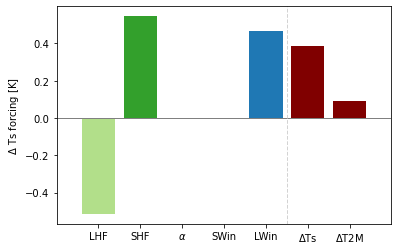

In [48]:
dT_1 = do_STDC(float(TSR_crop_ctl_ecearth_avg),float(dTSR_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))
dT_1.append(float(dTSA_crop_ctl_ecearth_avg))
print(dT_1)
plot_STDC(dT_1)


0.031564678486678405
[-0.09066144232348614, 0.09609176708825991, -0.002639632160275058, 0.0012915092276007765, -0.19071353440489086, -0.15506665408611298, -0.01861439272761345]


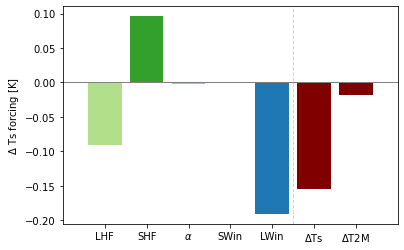

In [49]:
dT_1 = do_STDC(float(TSR_frst_ctl_ecearth_avg),float(dTSR_frst_ctl_ecearth_avg), float(SWin_frst_ctl_ecearth_avg),float(SWout_frst_ctl_ecearth_avg),float(SWin_ctl_frst_ctl_ecearth_avg),float(SWout_ctl_frst_ctl_ecearth_avg),float(dSWin_frst_ctl_ecearth_avg),float(dLWin_frst_ctl_ecearth_avg),float(dLHF_frst_ctl_ecearth_avg),float(dSHF_frst_ctl_ecearth_avg))
dT_1.append(float(dTSA_frst_ctl_ecearth_avg))
print(dT_1)
plot_STDC(dT_1)


In [59]:
dT_1 = do_STDC2(float(TSR_crop_ctl_ecearth_avg),float(dTSR_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))
dT_1.append(float(dTSA_crop_ctl_ecearth_avg))
print(dT_1)
plot_STDC(dT_1,approach='winckler')


NameError: name 'do_STDC2' is not defined

[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan  2.48270050e-01
  1.07850619e-02 -1.42482489e-01  5.32130152e-02  1.37181237e-01
  1.03676073e-01  1.02525145e-01  1.15071274e-01  4.12413299e-01
  1.24667525e+00  9.18413162e-01  2.38160729e-01  1.38374597e-01
  3.75507087e-01  4.65036392e-01  5.23386121e-01 -1.96419805e-02
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -6.57957047e-03 -1.92944240e-02
 -2.43209321e-02 -3.56302932e-02 -5.68593107e-02 -1.69167668e-02
 -4.81201708e-02 -1.01746917e-02 -4.00618464e-02 -3.75996977e-02
 -7.84551501e-02 -3.44476104e-02 -1.91707313e-02 -1.62438154e-02
 -3.63871902e-02 -5.20597100e-02 -3.15914750e-02 -7.13976026e-02
 -7.45586157e-02 -6.38692975e-02 -7.12302923e-02 -5.13565540e-02
 -3.99854779e-02 -5.67727

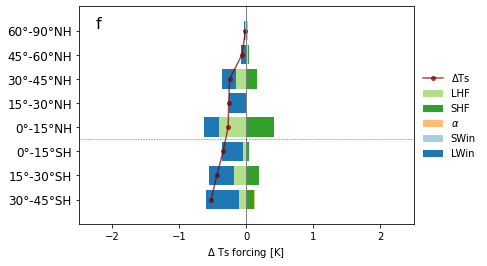

In [55]:
dT_lat = do_STDC(TSR_frst_ctl_ecearth_lat,dTS_frst_ctl_ecearth_lat, SWin_frst_ctl_ecearth_lat,SWout_frst_ctl_ecearth_lat,SWin_ctl_frst_ctl_ecearth_lat,SWout_ctl_frst_ctl_ecearth_lat,dSWin_frst_ctl_ecearth_lat,dLWin_frst_ctl_ecearth_lat,dLHF_frst_ctl_ecearth_lat,dSHF_frst_ctl_ecearth_lat)
dT_year = do_STDC(float(TSR_frst_ctl_ecearth_avg),float(dTS_frst_ctl_ecearth_avg), float(SWin_frst_ctl_ecearth_avg),float(SWout_frst_ctl_ecearth_avg),float(SWin_ctl_frst_ctl_ecearth_avg),float(SWout_ctl_frst_ctl_ecearth_avg),float(dSWin_frst_ctl_ecearth_avg),float(dLWin_frst_ctl_ecearth_avg),float(dLHF_frst_ctl_ecearth_avg),float(dSHF_frst_ctl_ecearth_avg))
plot_STDC_lat_15(dT_lat,dT_year,ylims=[-2.5,2.5],panel_label='f')


TSR [273.4394  273.5112  273.7028  273.7871  273.8888  273.85928 273.66577
 273.62878 273.67767 273.75967 273.62518 273.45374]
SWin [-0.01243332  0.00331667 -0.00341207 -0.00304236  0.0016829   0.01856503
  0.01121439  0.00768408  0.00260595 -0.00322044  0.00981545  0.00109795]
LWin [0.26033312 0.42463946 0.5672816  0.5954256  0.71131843 0.7013353
 0.4848806  0.46178344 0.5491046  0.6027751  0.44817516 0.28458986]
LHF [-0.46730098 -0.51027864 -0.49085152 -0.45551825 -0.63374394 -0.8467393
 -0.5604175  -0.4802811  -0.5308456  -0.60459775 -0.59749836 -0.5376848 ]
[-0.17531347 -0.1244615  -0.06609651 -0.04589877 -0.22819728 -0.26440287
 -0.15259147 -0.10669377 -0.13582367 -0.17572534 -0.17742932 -0.19822629]
TSR 281.4700012207031
SWin 0.000984517094819242
LWin 0.4667655050086617
LHF -0.5144590657721237
-0.11031129118763816
[array([-0.46730098, -0.51027864, -0.49085152, -0.45551825, -0.63374394,
       -0.8467393 , -0.5604175 , -0.4802811 , -0.5308456 , -0.60459775,
       -0.59749836, -0.

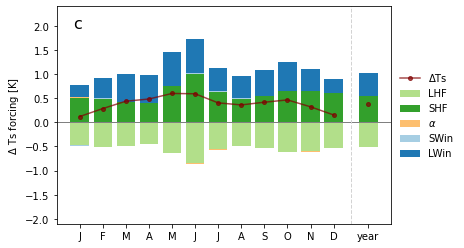

In [71]:
dT_month1 = do_STDC(TSR_crop_ctl_ecearth_seas,dTSR_crop_ctl_ecearth_seas, SWin_crop_ctl_ecearth_seas,SWout_crop_ctl_ecearth_seas,SWin_ctl_crop_ctl_ecearth_seas,SWout_ctl_crop_ctl_ecearth_seas,dSWin_crop_ctl_ecearth_seas,dLWin_crop_ctl_ecearth_seas,dLHF_crop_ctl_ecearth_seas,dSHF_crop_ctl_ecearth_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_ecearth_avg),float(dTSR_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))
plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.1,2.4],panel_label='c')


TSR [273.22922 273.0903  273.11517 273.16074 273.1406  273.10098 273.06073
 273.01837 273.0039  273.12726 273.21854 273.24338]
SWin [-0.00558804 -0.0047567  -0.00313058  0.00853881  0.00420787  0.00844519
  0.01681296  0.00779202  0.00495065 -0.00415667  0.01438559 -0.0061241 ]
LWin [-0.1477532  -0.19271994 -0.1970352  -0.17809778 -0.18548238 -0.2151878
 -0.2672982  -0.32725364 -0.326634   -0.21498352 -0.1313773  -0.10718272]
LHF [ 0.00714863 -0.00387736 -0.07213312 -0.1842525  -0.22227491 -0.22702664
 -0.16983323 -0.06426137 -0.00515557 -0.07327329 -0.1063197  -0.06260355]
[0.04882667 0.0469646  0.04151224 0.05403194 0.04991971 0.0352917
 0.03297496 0.04437119 0.0456478  0.04431562 0.02329083 0.04465554]
TSR 280.9291687011719
SWin 0.0012915092276007765
LWin -0.19071353440489086
LHF -0.09066144232348614
0.031564678486678405
[array([ 0.00714863, -0.00387736, -0.07213312, -0.1842525 , -0.22227491,
       -0.22702664, -0.16983323, -0.06426137, -0.00515557, -0.07327329,
       -0.1063197 ,

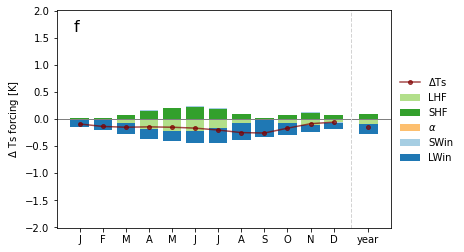

In [72]:
dT_month1 = do_STDC(TSR_frst_ctl_ecearth_seas,dTSR_frst_ctl_ecearth_seas, SWin_frst_ctl_ecearth_seas,SWout_frst_ctl_ecearth_seas,SWin_ctl_frst_ctl_ecearth_seas,SWout_ctl_frst_ctl_ecearth_seas,dSWin_frst_ctl_ecearth_seas,dLWin_frst_ctl_ecearth_seas,dLHF_frst_ctl_ecearth_seas,dSHF_frst_ctl_ecearth_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_ecearth_avg),float(dTSR_frst_ctl_ecearth_avg), float(SWin_frst_ctl_ecearth_avg),float(SWout_frst_ctl_ecearth_avg),float(SWin_ctl_frst_ctl_ecearth_avg),float(SWout_ctl_frst_ctl_ecearth_avg),float(dSWin_frst_ctl_ecearth_avg),float(dLWin_frst_ctl_ecearth_avg),float(dLHF_frst_ctl_ecearth_avg),float(dSHF_frst_ctl_ecearth_avg))
plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.01,2.01],panel_label='f')


[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan  0.07273754
 -0.318426   -0.31537867 -0.03752155  0.0816664   0.27283505  0.10979044
  0.22836566  0.3370902   0.14079405  0.19020727  0.02214832 -0.17147613
  0.05247292 -0.03786249 -0.09789341  0.10142627         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan  0.02832384 -0.06477664 -0.01663844  0.05744916
  0.08363059  0.04873219  0.04187065  0.07583249  0.13894016  0.09501612
  0.05529583  0.10427719  0.09319967  0.12659758  0.09770495  0.09757155
  0.14549506  0.08765052  0.06685857  0.05116951  0.06419775  0.00548266
  0.01436073  0.02614426  0.05236413  0.07927771  0.08700328  0.10884639
  0.12459709  0.11554834  0.12327799  0.1281673   0.07414395  0.02212995
 -0.04875708 -0.02971548 -0.05707598 -0.05989778 -0.05564559 -0.01054895
 -0.07311928 -0.04566276 -0.05703104 -0.04523075 -0

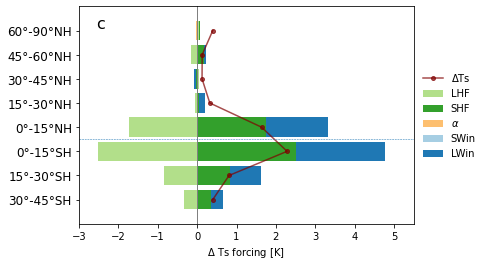

In [56]:
dT_lat = do_STDC(TSR_crop_ctl_ecearth_lat,dTS_crop_ctl_ecearth_lat, SWin_crop_ctl_ecearth_lat,SWout_crop_ctl_ecearth_lat,SWin_ctl_crop_ctl_ecearth_lat,SWout_ctl_crop_ctl_ecearth_lat,dSWin_crop_ctl_ecearth_lat,dLWin_crop_ctl_ecearth_lat,dLHF_crop_ctl_ecearth_lat,dSHF_crop_ctl_ecearth_lat)
dT_year = do_STDC(float(TSR_crop_ctl_ecearth_avg),float(dTS_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))
plot_STDC_lat_15(dT_lat,dT_year,ylims=[-3,5.5],panel_label='c')


In [53]:
dT_year = do_STDC(float(TSR_crop_ctl_ecearth_avg),float(dTS_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))


0.09560383203662026


In [6]:

dSWin_crop_ctl_mpiesm_avg,dSWout_crop_ctl_mpiesm_avg,dSWnet_crop_ctl_mpiesm_avg,dLWin_crop_ctl_mpiesm_avg,dLWout_crop_ctl_mpiesm_avg,dLWnet_crop_ctl_mpiesm_avg,dSHF_crop_ctl_mpiesm_avg,dLHF_crop_ctl_mpiesm_avg,dTS_crop_ctl_mpiesm_avg,dTSA_crop_ctl_mpiesm_avg,dTSR_crop_ctl_mpiesm_avg,dalbedo_crop_ctl_mpiesm_avg,SWin_crop_ctl_mpiesm_avg,SWout_crop_ctl_mpiesm_avg,TSR_crop_ctl_mpiesm_avg,LWout_crop_ctl_mpiesm_avg,SWin_ctl_crop_ctl_mpiesm_avg,SWout_ctl_crop_ctl_mpiesm_avg,TSR_ctl_crop_ctl_mpiesm_avg,LWout_ctl_crop_ctl_mpiesm_avg=read_ebal_data('crop-ctl','avg','mpiesm')
dSWin_frst_ctl_mpiesm_avg,dSWout_frst_ctl_mpiesm_avg,dSWnet_frst_ctl_mpiesm_avg,dLWin_frst_ctl_mpiesm_avg,dLWout_frst_ctl_mpiesm_avg,dLWnet_frst_ctl_mpiesm_avg,dSHF_frst_ctl_mpiesm_avg,dLHF_frst_ctl_mpiesm_avg,dTS_frst_ctl_mpiesm_avg,dTSA_frst_ctl_mpiesm_avg,dTSR_frst_ctl_mpiesm_avg,dalbedo_frst_ctl_mpiesm_avg,SWin_frst_ctl_mpiesm_avg,SWout_frst_ctl_mpiesm_avg,TSR_frst_ctl_mpiesm_avg,LWout_frst_ctl_mpiesm_avg,SWin_ctl_frst_ctl_mpiesm_avg,SWout_ctl_frst_ctl_mpiesm_avg,TSR_ctl_frst_ctl_mpiesm_avg,LWout_ctl_frst_ctl_mpiesm_avg=read_ebal_data('frst-ctl','avg','mpiesm')
dSWin_irr_crop_mpiesm_avg,dSWout_irr_crop_mpiesm_avg,dSWnet_irr_crop_mpiesm_avg,dLWin_irr_crop_mpiesm_avg,dLWout_irr_crop_mpiesm_avg,dLWnet_irr_crop_mpiesm_avg,dSHF_irr_crop_mpiesm_avg,dLHF_irr_crop_mpiesm_avg,dTS_irr_crop_mpiesm_avg,dTSA_irr_crop_mpiesm_avg,dTSR_irr_crop_mpiesm_avg,dalbedo_irr_crop_mpiesm_avg,SWin_irr_crop_mpiesm_avg,SWout_irr_crop_mpiesm_avg,TSR_irr_crop_mpiesm_avg,LWout_irr_crop_mpiesm_avg,SWin_ctl_irr_crop_mpiesm_avg,SWout_ctl_irr_crop_mpiesm_avg,TSR_ctl_irr_crop_mpiesm_avg,LWout_ctl_irr_crop_mpiesm_avg=read_ebal_data('irr-crop','avg','mpiesm')
dSWin_harv_frst_mpiesm_avg,dSWout_harv_frst_mpiesm_avg,dSWnet_harv_frst_mpiesm_avg,dLWin_harv_frst_mpiesm_avg,dLWout_harv_frst_mpiesm_avg,dLWnet_harv_frst_mpiesm_avg,dSHF_harv_frst_mpiesm_avg,dLHF_harv_frst_mpiesm_avg,dTS_harv_frst_mpiesm_avg,dTSA_harv_frst_mpiesm_avg,dTSR_harv_frst_mpiesm_avg,dalbedo_harv_frst_mpiesm_avg,SWin_harv_frst_mpiesm_avg,SWout_harv_frst_mpiesm_avg,TSR_harv_frst_mpiesm_avg,LWout_harv_frst_mpiesm_avg,SWin_ctl_harv_frst_mpiesm_avg,SWout_ctl_harv_frst_mpiesm_avg,TSR_ctl_harv_frst_mpiesm_avg,LWout_ctl_harv_frst_mpiesm_avg=read_ebal_data('harv-frst','avg','mpiesm')
#dSWin_crop_ctl_mpiesm_avg,dSWout_crop_ctl_mpiesm_avg,dSWnet_crop_ctl_mpiesm_avg,dLWin_crop_ctl_mpiesm_avg,dLWout_crop_ctl_mpiesm_avg,dLWnet_crop_ctl_mpiesm_avg,dSHF_crop_ctl_mpiesm_avg,dLHF_crop_ctl_mpiesm_avg,dG_crop_ctl_mpiesm_avg,dR_crop_ctl_mpiesm_avg,dTS_crop_ctl_mpiesm_avg,dTSA_crop_ctl_mpiesm_avg,dTSR_crop_ctl_mpiesm_avg,dalbedo_crop_ctl_mpiesm_avg,SWin_crop_ctl_mpiesm_avg,SWout_crop_ctl_mpiesm_avg,TSR_crop_ctl_mpiesm_avg,LWout_crop_ctl_mpiesm_avg,SWin_ctl_crop_ctl_mpiesm_avg,SWout_ctl_crop_ctl_mpiesm_avg,TSR_ctl_crop_ctl_mpiesm_avg,LWout_ctl_crop_ctl_mpiesm_avg=read_ebal_data(case_flag,'avg','mpiesm')
dSWin_crop_ctl_mpiesm_seas,dSWout_crop_ctl_mpiesm_seas,dSWnet_crop_ctl_mpiesm_seas,dLWin_crop_ctl_mpiesm_seas,dLWout_crop_ctl_mpiesm_seas,dLWnet_crop_ctl_mpiesm_seas,dSHF_crop_ctl_mpiesm_seas,dLHF_crop_ctl_mpiesm_seas,dTS_crop_ctl_mpiesm_seas,dTSA_crop_ctl_mpiesm_seas,dTSR_crop_ctl_mpiesm_seas,dalbedo_crop_ctl_mpiesm_seas,SWin_crop_ctl_mpiesm_seas,SWout_crop_ctl_mpiesm_seas,TSR_crop_ctl_mpiesm_seas,LWout_crop_ctl_mpiesm_seas,SWin_ctl_crop_ctl_mpiesm_seas,SWout_ctl_crop_ctl_mpiesm_seas,TSR_ctl_crop_ctl_mpiesm_seas,LWout_ctl_crop_ctl_mpiesm_seas=read_ebal_data('crop-ctl','seas','mpiesm')
dSWin_frst_ctl_mpiesm_seas,dSWout_frst_ctl_mpiesm_seas,dSWnet_frst_ctl_mpiesm_seas,dLWin_frst_ctl_mpiesm_seas,dLWout_frst_ctl_mpiesm_seas,dLWnet_frst_ctl_mpiesm_seas,dSHF_frst_ctl_mpiesm_seas,dLHF_frst_ctl_mpiesm_seas,dTS_frst_ctl_mpiesm_seas,dTSA_frst_ctl_mpiesm_seas,dTSR_frst_ctl_mpiesm_seas,dalbedo_frst_ctl_mpiesm_seas,SWin_frst_ctl_mpiesm_seas,SWout_frst_ctl_mpiesm_seas,TSR_frst_ctl_mpiesm_seas,LWout_frst_ctl_mpiesm_seas,SWin_ctl_frst_ctl_mpiesm_seas,SWout_ctl_frst_ctl_mpiesm_seas,TSR_ctl_frst_ctl_mpiesm_seas,LWout_ctl_frst_ctl_mpiesm_seas=read_ebal_data('frst-ctl','seas','mpiesm')
dSWin_irr_crop_mpiesm_seas,dSWout_irr_crop_mpiesm_seas,dSWnet_irr_crop_mpiesm_seas,dLWin_irr_crop_mpiesm_seas,dLWout_irr_crop_mpiesm_seas,dLWnet_irr_crop_mpiesm_seas,dSHF_irr_crop_mpiesm_seas,dLHF_irr_crop_mpiesm_seas,dTS_irr_crop_mpiesm_seas,dTSA_irr_crop_mpiesm_seas,dTSR_irr_crop_mpiesm_seas,dalbedo_irr_crop_mpiesm_seas,SWin_irr_crop_mpiesm_seas,SWout_irr_crop_mpiesm_seas,TSR_irr_crop_mpiesm_seas,LWout_irr_crop_mpiesm_seas,SWin_ctl_irr_crop_mpiesm_seas,SWout_ctl_irr_crop_mpiesm_seas,TSR_ctl_irr_crop_mpiesm_seas,LWout_ctl_irr_crop_mpiesm_seas=read_ebal_data('irr-crop','seas','mpiesm')
dSWin_harv_frst_mpiesm_seas,dSWout_harv_frst_mpiesm_seas,dSWnet_harv_frst_mpiesm_seas,dLWin_harv_frst_mpiesm_seas,dLWout_harv_frst_mpiesm_seas,dLWnet_harv_frst_mpiesm_seas,dSHF_harv_frst_mpiesm_seas,dLHF_harv_frst_mpiesm_seas,dTS_harv_frst_mpiesm_seas,dTSA_harv_frst_mpiesm_seas,dTSR_harv_frst_mpiesm_seas,dalbedo_harv_frst_mpiesm_seas,SWin_harv_frst_mpiesm_seas,SWout_harv_frst_mpiesm_seas,TSR_harv_frst_mpiesm_seas,LWout_harv_frst_mpiesm_seas,SWin_ctl_harv_frst_mpiesm_seas,SWout_ctl_harv_frst_mpiesm_seas,TSR_ctl_harv_frst_mpiesm_seas,LWout_ctl_harv_frst_mpiesm_seas=read_ebal_data('harv-frst','seas','mpiesm')


avg
ensmean
<xarray.DataArray 'rsds_local' (time: 1, lat: 96, lon: 192)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2054-07-01T06:00:00
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
Attributes:
    units:         W m-2
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
    institution:   MPIMET
<xarray.DataArray ()>
array(-0.09882265)
avg
ensmean
<xarray.DataArray 'rsds_local' (time: 1, lat: 96, lon: 192)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2054-07-01T06:00:00
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.

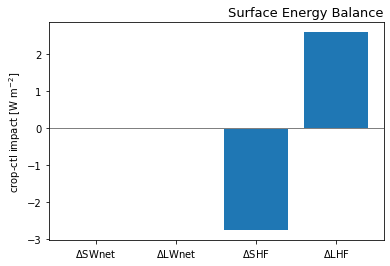

In [39]:
plot_SEB(float(dSWnet_crop_ctl_ecearth_avg),float(dLWnet_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),'crop-ctl')


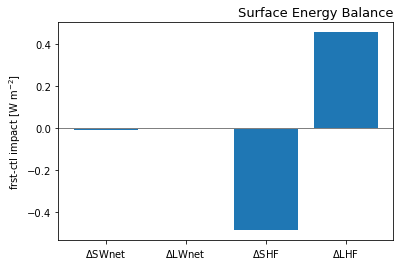

In [40]:
plot_SEB(float(dSWnet_frst_ctl_ecearth_avg),float(dLWnet_frst_ctl_ecearth_avg),float(dSHF_frst_ctl_ecearth_avg),float(dLHF_frst_ctl_ecearth_avg),'frst-ctl')


13.395275964305847
[-0.5144590657721237, 0.5455270541316282, -13.507986629753654, 0.0006513970762074667, 0.4667655050086617, 0.3857742249965668, 0.09184643626213074]


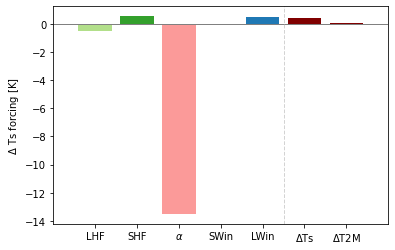

In [41]:
dT_1 = do_STDC(float(TSR_crop_ctl_ecearth_avg),float(dTSR_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))
dT_1.append(float(dTSA_crop_ctl_ecearth_avg))
print(dT_1)
plot_STDC(dT_1)


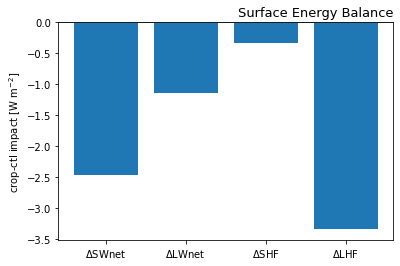

In [8]:
plot_SEB(float(dSWnet_crop_ctl_cesm_avg),float(dLWnet_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),'crop-ctl')


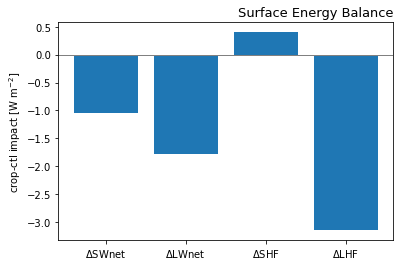

In [8]:
plot_SEB(float(dSWnet_crop_ctl_mpiesm_avg),float(dLWnet_crop_ctl_mpiesm_avg),float(dSHF_crop_ctl_mpiesm_avg),float(dLHF_crop_ctl_mpiesm_avg),'crop-ctl')


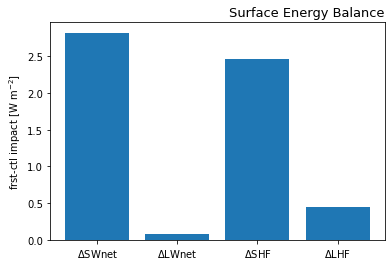

In [11]:
plot_SEB(float(dSWnet_frst_ctl_cesm_avg),float(dLWnet_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),'frst-ctl')


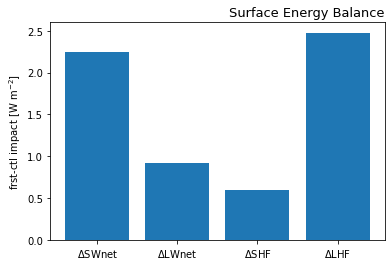

In [9]:
plot_SEB(float(dSWnet_frst_ctl_mpiesm_avg),float(dLWnet_frst_ctl_mpiesm_avg),float(dSHF_frst_ctl_mpiesm_avg),float(dLHF_frst_ctl_mpiesm_avg),'frst-ctl')


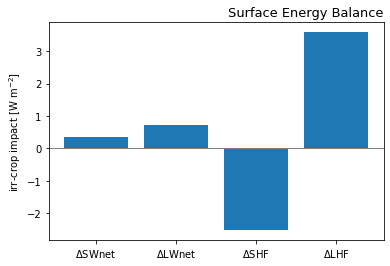

In [12]:
plot_SEB(float(dSWnet_irr_crop_cesm_avg),float(dLWnet_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),'irr-crop')


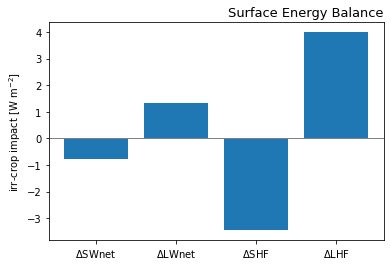

In [13]:
plot_SEB(float(dSWnet_irr_crop_mpiesm_avg),float(dLWnet_irr_crop_mpiesm_avg),float(dSHF_irr_crop_mpiesm_avg),float(dLHF_irr_crop_mpiesm_avg),'irr-crop')


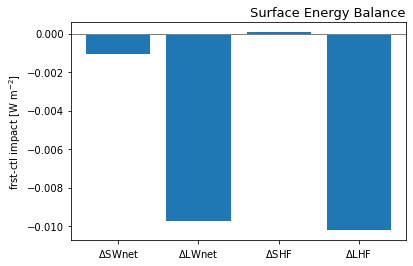

In [14]:
plot_SEB(float(dSWnet_harv_frst_cesm_avg),float(dLWnet_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),'frst-ctl')


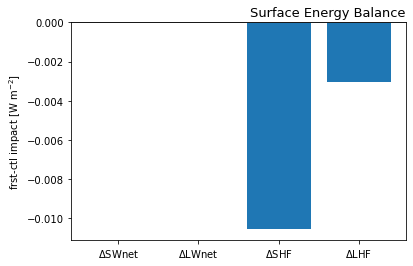

In [15]:
plot_SEB(float(dSWnet_harv_frst_mpiesm_avg),float(dLWnet_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),'frst-ctl')


-0.15245595663149497
[0.7492193743950932, 0.07349522666889145, -0.7174710502773445, 0.15941240305245585, 0.12391766574797825, 0.2361176629555793, 0.08248823247556239]


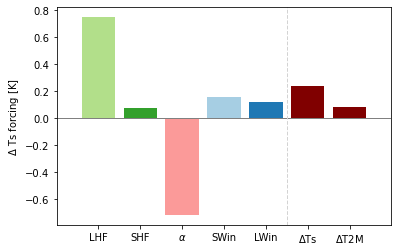

In [9]:
dT_1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
dT_1.append(float(dTSA_crop_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.05797434340207003
-17.321276269199007
[0.6308236539402831, -0.08065167680010135, -0.3815334885661624, 0.16794525176315558, 0.056090786244589616, 0.33470018317969447, -0.029442917372040286]


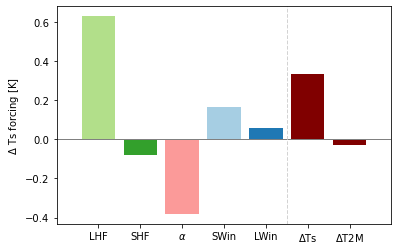

In [18]:
dT_1 = do_STDC(float(TSR_crop_ctl_mpiesm_avg),float(dTSR_crop_ctl_mpiesm_avg), float(SWin_crop_ctl_mpiesm_avg),float(SWout_crop_ctl_mpiesm_avg),float(SWin_ctl_crop_ctl_mpiesm_avg),float(SWout_ctl_crop_ctl_mpiesm_avg),float(dSWin_crop_ctl_mpiesm_avg),float(dLWin_crop_ctl_mpiesm_avg),float(dLHF_crop_ctl_mpiesm_avg),float(dSHF_crop_ctl_mpiesm_avg))
dT_1.append(float(dTSA_crop_ctl_mpiesm_avg))
print(dT_1)
plot_STDC(dT_1)


-5357.339051144655
[-5556.1584458630505, 5891.692766155517, -29.50895174733704, 10.632783389367821, 5041.066673435154, 0.3857742249965668, 0.09184643626213074]


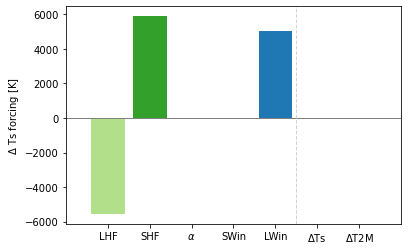

In [34]:
dT_1 = do_STDC(float(TSR_crop_ctl_ecearth_avg),float(dTSR_crop_ctl_ecearth_avg), float(SWin_crop_ctl_ecearth_avg),float(SWout_crop_ctl_ecearth_avg),float(SWin_ctl_crop_ctl_ecearth_avg),float(SWout_ctl_crop_ctl_ecearth_avg),float(dSWin_crop_ctl_ecearth_avg),float(dLWin_crop_ctl_ecearth_avg),float(dLHF_crop_ctl_ecearth_avg),float(dSHF_crop_ctl_ecearth_avg))
dT_1.append(float(dTSA_crop_ctl_ecearth_avg))
print(dT_1)
plot_STDC(dT_1)


-0.14213499857501993
-60.196681940630484


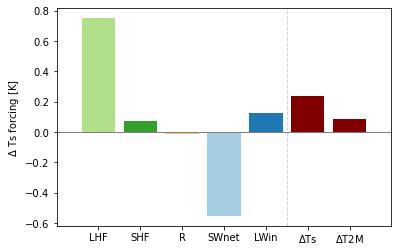

In [15]:
dT_2 = do_STDC2(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(dSWout_crop_ctl_cesm_avg), float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg),float(dR_crop_ctl_cesm_avg))
dT_2.append(float(dTSA_crop_ctl_cesm_avg))
print(dT_2)
plot_STDC(dT_2,approach='winckler')


0.033625986547856965
713.0587648849553
[-0.10088112914646873, -0.5542444486382694, 0.7336297955920912, -0.10315557457415461, -0.00425889130285549, 0.004715738478199924, 0.024716460963308668]


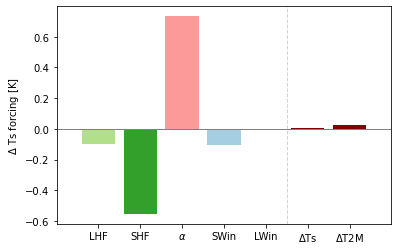

In [17]:
dT_1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
dT_1.append(float(dTSA_frst_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


0.05008266388765335
-50.12841455187594
[-0.4992140933484633, -0.11965899423298224, 0.708976840974186, -0.26368016197202787, 0.023585011620044987, -0.09990873307158908, 0.09211563186784477]


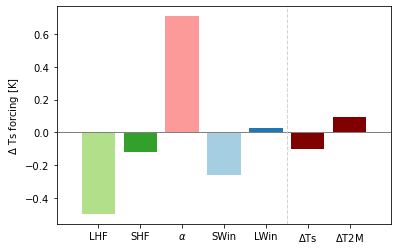

In [16]:
dT_1 = do_STDC(float(TSR_frst_ctl_mpiesm_avg),float(dTSR_frst_ctl_mpiesm_avg), float(SWin_frst_ctl_mpiesm_avg),float(SWout_frst_ctl_mpiesm_avg),float(SWin_ctl_frst_ctl_mpiesm_avg),float(SWout_ctl_frst_ctl_mpiesm_avg),float(dSWin_frst_ctl_mpiesm_avg),float(dLWin_frst_ctl_mpiesm_avg),float(dLHF_frst_ctl_mpiesm_avg),float(dSHF_frst_ctl_mpiesm_avg))
dT_1.append(float(dTSA_frst_ctl_mpiesm_avg))
print(dT_1)
plot_STDC(dT_1)


0.02580008199575275
547.1058693144721
[-0.10088112914646873, -0.5542444486382694, 0.004541264016109435, 0.6337588615539314, -0.00425889130285549, 0.004715738478199924, 0.024716460963308668]


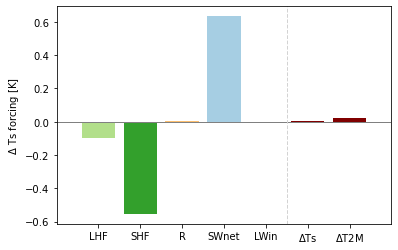

In [17]:
dT_2 = do_STDC2(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(dSWout_frst_ctl_cesm_avg), float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg),float(dR_frst_ctl_cesm_avg))
dT_2.append(float(dTSA_frst_ctl_cesm_avg))
print(dT_2)
plot_STDC(dT_2,approach='winckler')


-0.023805305263252946
15.152214402738442
[-0.8086562981904594, 0.5669772228617852, 0.1774140414522484, -0.008195056585786118, -0.06084236839745201, -0.15710776412291685, -0.059078048150300634]


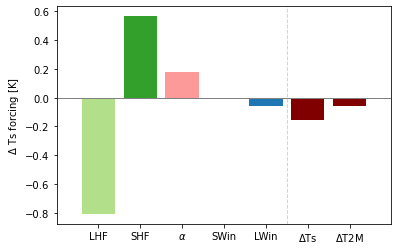

In [19]:
dT_1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
dT_1.append(float(dTSA_irr_crop_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


0.04576607881815398
-20.953939117151673
[-0.807887714235672, 0.6958991925693441, -0.04710458589867031, -0.1343837944583721, 0.029298053356646276, -0.21841276984857005, -0.0717302407608351]


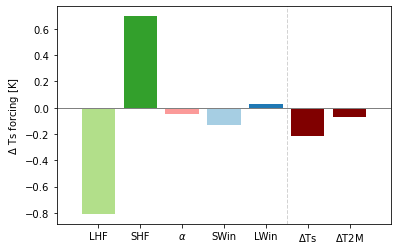

In [22]:
dT_1 = do_STDC(float(TSR_irr_crop_mpiesm_avg),float(dTSR_irr_crop_mpiesm_avg), float(SWin_irr_crop_mpiesm_avg),float(SWout_irr_crop_mpiesm_avg),float(SWin_ctl_irr_crop_mpiesm_avg),float(SWout_ctl_irr_crop_mpiesm_avg),float(dSWin_irr_crop_mpiesm_avg),float(dLWin_irr_crop_mpiesm_avg),float(dLHF_irr_crop_mpiesm_avg),float(dSHF_irr_crop_mpiesm_avg))
dT_1.append(float(dTSA_irr_crop_mpiesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.0014159204008929202
-65.88809011844089
[0.0022909462296279446, -1.5944688085596302e-05, 0.0006584067833104764, -0.0005646446966752627, 0.0011961345293139362, 0.002148977756598578, 0.000482214205734666]


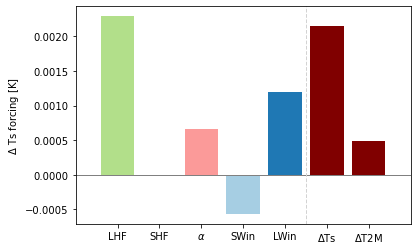

In [21]:
dT_1 = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
dT_1.append(float(dTSA_harv_frst_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.0027420908306423843
[0.0006141498857393251, 0.002127940944903059, -0.0, 0.0, 0.0, 0.0, -0.0010474131802941371]


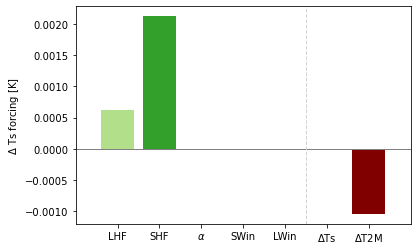

In [25]:
dT_1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
dT_1.append(float(dTSA_harv_frst_mpiesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.005186694803523989
2.2414225012337847
[-0.8099956778864872, 0.5679163088271213, -0.003902340585094376, 0.08070962175357582, -0.060943141782970854, -0.23140192447737928, -0.059078048150300634]


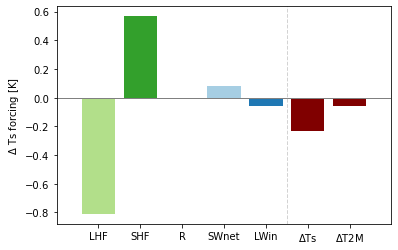

In [19]:
dT_2 = do_STDC2(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(dSWout_irr_crop_cesm_avg), float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg),float(dR_irr_crop_cesm_avg))
dT_2.append(float(dTSA_irr_crop_cesm_avg))
print(dT_2)
plot_STDC(dT_2,approach='winckler')


[-0.15775145 -0.16187271 -0.16770434 -0.1686849  -0.15962998 -0.14824858
 -0.13979383 -0.13578983 -0.13744989 -0.14536132 -0.15261355 -0.15566018]
-0.15245595663149497
[array([0.75698688, 0.76550312, 0.77840315, 0.78198802, 0.76388489,
       0.74106931, 0.72481961, 0.7178717 , 0.72219252, 0.73821721,
       0.75029434, 0.75378283]), array([0.07425719, 0.07509259, 0.07635803, 0.07670969, 0.07493385,
       0.07269574, 0.07110171, 0.07042015, 0.07084401, 0.07241596,
       0.07360068, 0.07394288]), array([-0.67248743, -0.68654523, -0.71959637, -0.75428739, -0.75090106,
       -0.73262443, -0.72500069, -0.72735693, -0.73522641, -0.74166028,
       -0.71335153, -0.68112826]), array([0.1099101 , 0.11732896, 0.13991266, 0.17105478, 0.18148667,
       0.18065595, 0.18510881, 0.19223967, 0.19630989, 0.19040814,
       0.15409227, 0.12050795]), array([0.12520238, 0.12661093, 0.12874454, 0.12933746, 0.12634328,
       0.12256968, 0.11988205, 0.1187329 , 0.11944754, 0.12209795,
       0.12409546

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

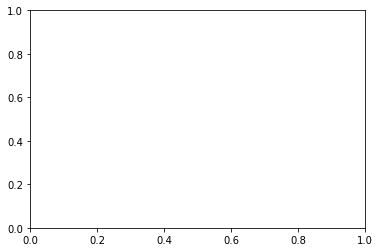

In [6]:
#tested old script and works, issue must be caused by adaptations made in read func, need to compare these between old and new scxript

dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
print(dT_month1)
plot_STDC_seas(dT_month1,dT_year1)

[-0.06550889 -0.07522668 -0.06480193 -0.0780565  -0.01048716 -0.02390393
 -0.03297784 -0.08965796 -0.09258485 -0.04769255 -0.02485605 -0.03714667]
-0.05797434340207003


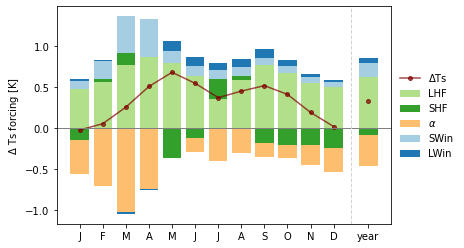

In [14]:
dT_month1 = do_STDC(TSR_crop_ctl_mpiesm_seas,dTSR_crop_ctl_mpiesm_seas, SWin_crop_ctl_mpiesm_seas,SWout_crop_ctl_mpiesm_seas,SWin_ctl_crop_ctl_mpiesm_seas,SWout_ctl_crop_ctl_mpiesm_seas,dSWin_crop_ctl_mpiesm_seas,dLWin_crop_ctl_mpiesm_seas,dLHF_crop_ctl_mpiesm_seas,dSHF_crop_ctl_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_mpiesm_avg),float(dTSR_crop_ctl_mpiesm_avg), float(SWin_crop_ctl_mpiesm_avg),float(SWout_crop_ctl_mpiesm_avg),float(SWin_ctl_crop_ctl_mpiesm_avg),float(SWout_ctl_crop_ctl_mpiesm_avg),float(dSWin_crop_ctl_mpiesm_avg),float(dLWin_crop_ctl_mpiesm_avg),float(dLHF_crop_ctl_mpiesm_avg),float(dSHF_crop_ctl_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[-0.03463337 -0.10071566 -0.18107098 -0.22558941 -0.15664986 -0.08592422
 -0.19242058 -0.1204484  -0.2175977  -0.23730401 -0.11031935  0.00341153]
[ -44.94135592 -123.8864329  -224.88555288 -219.21029214 -197.20974788
  -60.43367599  -88.47613531  -40.497366    -40.73647749  -38.19203288
  -24.18685059    2.37754185]
-0.14213499857501993
-60.196681940630484


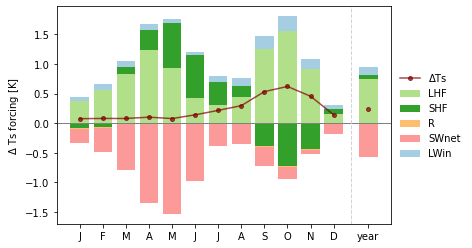

In [7]:
dT_month2 = do_STDC2(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, dSWout_crop_ctl_cesm_seas, dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dR_crop_ctl_cesm_seas)
dT_year2 = do_STDC2(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(dSWout_crop_ctl_cesm_avg), float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg),float(dR_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month2,dT_year2,approach='winckler')

[-0.05078908 -0.10930951 -0.15924031 -0.19146256 -0.0430853   0.07111988
 -0.09829686 -0.11113439 -0.28824686 -0.3371244  -0.18342626  0.00580511]
[ -83.38687332 -150.35092291 -155.587701   -139.71607152  -22.32425612
   23.7681481   -31.54516349  -36.23118653  -62.18781556  -64.6421791
  -47.89122373    3.97928085]
-0.128462375667068
-51.42809105765277


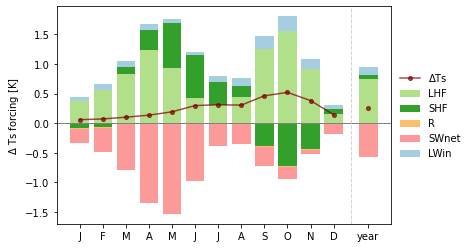

In [11]:
#same but combo of radiative and real TS

dT_month2 = do_STDC2(TSR_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas, dSWout_crop_ctl_cesm_seas, dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dR_crop_ctl_cesm_seas)
dT_year2 = do_STDC2(float(TSR_crop_ctl_cesm_avg),float(dTS_crop_ctl_cesm_avg), float(dSWout_crop_ctl_cesm_avg), float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg),float(dR_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month2,dT_year2,approach='winckler')

[ 0.06308869  0.05749105  0.0536822   0.05668859  0.08881322  0.05610493
 -0.09427355 -0.06235932  0.01369379  0.0496125   0.07876683  0.06027331]
0.033625986547856965


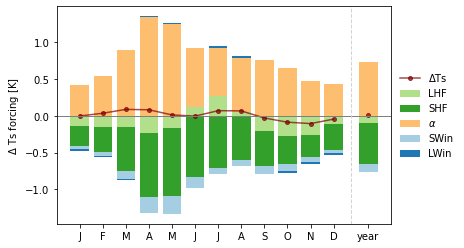

In [16]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[0.05739789 0.07597911 0.09426845 0.1162312  0.0224259  0.03009212
 0.06790601 0.05890713 0.03629724 0.00603972 0.01428379 0.03236121]
0.05008266388765335


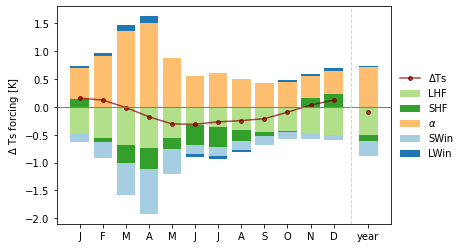

In [18]:
dT_month1 = do_STDC(TSR_frst_ctl_mpiesm_seas,dTSR_frst_ctl_mpiesm_seas, SWin_frst_ctl_mpiesm_seas,SWout_frst_ctl_mpiesm_seas,SWin_ctl_frst_ctl_mpiesm_seas,SWout_ctl_frst_ctl_mpiesm_seas,dSWin_frst_ctl_mpiesm_seas,dLWin_frst_ctl_mpiesm_seas,dLHF_frst_ctl_mpiesm_seas,dSHF_frst_ctl_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_mpiesm_avg),float(dTSR_frst_ctl_mpiesm_avg), float(SWin_frst_ctl_mpiesm_avg),float(SWout_frst_ctl_mpiesm_avg),float(SWin_ctl_frst_ctl_mpiesm_avg),float(SWout_ctl_frst_ctl_mpiesm_avg),float(dSWin_frst_ctl_mpiesm_avg),float(dLWin_frst_ctl_mpiesm_avg),float(dLHF_frst_ctl_mpiesm_avg),float(dSHF_frst_ctl_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[ 0.05855111  0.05249325  0.04486175  0.03924731  0.07173952  0.04662322
 -0.10102269 -0.06933396  0.00565927  0.04191131  0.07230138  0.05482341]
[-1247.06861375   159.30048075    52.70953382    49.01969561
   713.33151789  -800.20618811  -149.17699641  -107.19573565
   -18.06984581   -47.42521981   -67.50360469  -117.45866335]
0.02580008199575275
547.1058693144721


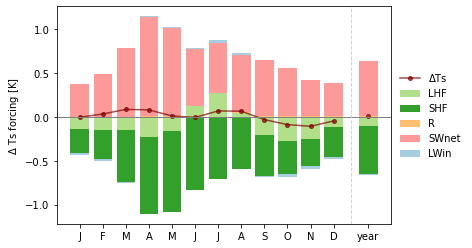

In [23]:
dT_month2 = do_STDC2(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, dSWout_frst_ctl_cesm_seas, dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dR_frst_ctl_cesm_seas)
dT_year2 = do_STDC2(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(dSWout_frst_ctl_cesm_avg), float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg),float(dR_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month2,dT_year2,approach='winckler')

[ 0.09534113  0.03602964  0.02655083  0.0107269  -0.01326128 -0.03557946
 -0.02924454 -0.12736313 -0.1384339  -0.09754741 -0.06979482  0.07562943]
-0.023805305263252946


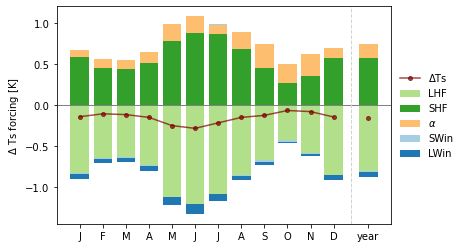

In [19]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.03113112  0.04637489  0.07975806  0.12660479  0.10470953 -0.00157523
 -0.06136556  0.01350167  0.05192062  0.05784233  0.03740945  0.02380724]
0.04576607881815398


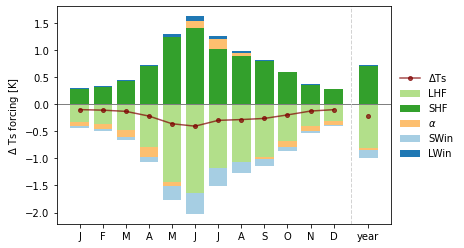

In [20]:
dT_month1 = do_STDC(TSR_irr_crop_mpiesm_seas,dTSR_irr_crop_mpiesm_seas, SWin_irr_crop_mpiesm_seas,SWout_irr_crop_mpiesm_seas,SWin_ctl_irr_crop_mpiesm_seas,SWout_ctl_irr_crop_mpiesm_seas,dSWin_irr_crop_mpiesm_seas,dLWin_irr_crop_mpiesm_seas,dLHF_irr_crop_mpiesm_seas,dSHF_irr_crop_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_mpiesm_avg),float(dTSR_irr_crop_mpiesm_avg), float(SWin_irr_crop_mpiesm_avg),float(SWout_irr_crop_mpiesm_avg),float(SWin_ctl_irr_crop_mpiesm_avg),float(SWout_ctl_irr_crop_mpiesm_avg),float(dSWin_irr_crop_mpiesm_avg),float(dLWin_irr_crop_mpiesm_avg),float(dLHF_irr_crop_mpiesm_avg),float(dSHF_irr_crop_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[0.15285563 0.1055777  0.08823664 0.07629872 0.10430955 0.08866129
 0.07227401 0.04734453 0.03900875 0.02933117 0.07314664 0.16126832]
[-117.34017038 -103.34109267  -73.43748015  -47.82872459  -42.50674329
  -32.5924335   -40.48779658  -50.70104222  -38.25610664  -45.27698047
  -91.05896339 -121.30689543]
0.08572099128221311
-61.176764901873426


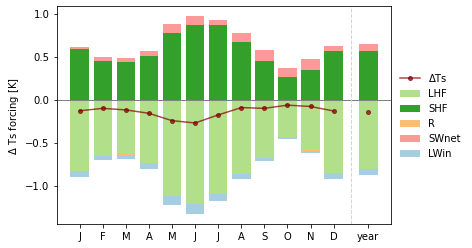

In [7]:
#same but combo of radiative and real TS

dT_month2 = do_STDC2(TSR_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas, dSWout_irr_crop_cesm_seas, dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dR_irr_crop_cesm_seas)
dT_year2 = do_STDC2(float(TSR_irr_crop_cesm_avg),float(dTS_irr_crop_cesm_avg), float(dSWout_irr_crop_cesm_avg), float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg),float(dR_irr_crop_cesm_avg))

plot_STDC_seas(dT_month2,dT_year2,approach='winckler')

[ 0.13647322  0.09690977  0.08807943  0.08138222  0.09488809  0.07235968
  0.02960889 -0.01410264  0.01117594  0.02369388  0.06949467  0.14449874]
[-93.06080309 -87.43826019 -73.21084966 -52.69456613 -37.23777186
 -25.09596998 -13.38719169   9.10864358  -8.61011527 -33.64704191
 -82.75061079 -96.5178157 ]
0.06873340419008275
-43.74920906920144


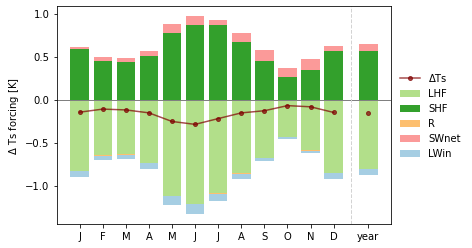

In [8]:
dT_month2 = do_STDC2(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, dSWout_irr_crop_cesm_seas, dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dR_irr_crop_cesm_seas)
dT_year2 = do_STDC2(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(dSWout_irr_crop_cesm_avg), float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg),float(dR_irr_crop_cesm_avg))

plot_STDC_seas(dT_month2,dT_year2,approach='winckler')

In [23]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,dG_total,
#   0           1            2             3            4            5           6          7        8
#dR_total,dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
#   9       10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dG_crop_ctl_cesm_avg,dR_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='boreal')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dG_frst_ctl_cesm_avg,dR_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='boreal')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dG_irr_crop_cesm_avg,dR_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='boreal')
#dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dG_crop_ctl_cesm_avg,dR_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data(case_flag,'avg','cesm')
dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dG_crop_ctl_cesm_seas,dR_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='boreal')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dG_frst_ctl_cesm_seas,dR_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='boreal')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dG_irr_crop_cesm_seas,dR_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='boreal')


<xarray.DataArray ()>
array(-0.00116387)
<xarray.DataArray ()>
array(0.0006263)
<xarray.DataArray ()>
array(-7.75362863e-05)
<xarray.DataArray ()>
array(-0.00116387)
<xarray.DataArray ()>
array(0.0006263)
<xarray.DataArray ()>
array(-7.75362863e-05)


[-0.09424591 -0.13184201 -0.17796191 -0.21264786 -0.15462942 -0.12129557
 -0.10899628 -0.14568212 -0.22945448 -0.24729133 -0.17237731 -0.07909058]
[-66.13596735 -85.23428191 -91.90309718 -71.75424706 -48.97884108
 -35.24547385 -34.21859698 -35.7721112  -33.29190317 -32.35073856
 -30.02133948 -35.18650886]
-0.1578105374335983
-42.79222548541654


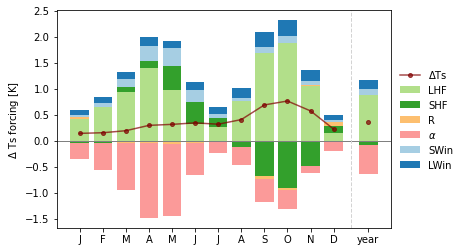

In [24]:
dT_month1 = do_STDC1(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dR_crop_ctl_cesm_seas)
dT_year1 = do_STDC1(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg),float(dR_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1,approach='thiery')

[ 0.05237758  0.06047821  0.06457591  0.06147707  0.03524978  0.00232323
 -0.02647029 -0.00488263  0.03488827  0.04924593  0.05467846  0.04721999]
[-148.79845133 1174.74605842  117.43267753  195.86872401  -74.24649538
  -37.96605075  -38.46548161   74.61196496  -29.13306076  -33.0217083
  -37.60929015  -57.57980807]
0.035204380008321504
-97.9531785579372


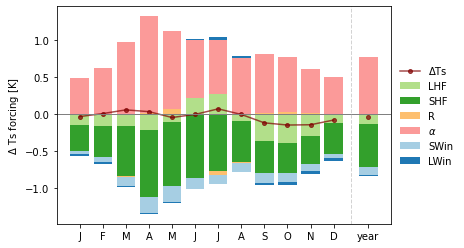

In [25]:
dT_month1 = do_STDC1(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dR_frst_ctl_cesm_seas)
dT_year1 = do_STDC1(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg),float(dR_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1,approach='thiery')

In [ ]:
dT_month1 = do_STDC1(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dR_irr_crop_cesm_seas)
dT_year1 = do_STDC1(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg),float(dR_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1,approach='thiery')

[ 0.04498074 -0.01195706  0.0132818  -0.06140164 -0.02904976  0.04948932
  0.02901087 -0.2956271  -0.78002819 -0.95114858 -0.72709059 -0.11185527]
[-25.31222729   7.99623079  -9.57929503  23.17314758   7.99865123
 -14.12913397 -11.61765335  71.44296072  96.42179245 104.11690472
 101.04541698  36.46069144]
-0.23556531314806173
58.204054044109085


[-0.00491623 -0.0020075  -0.00086423  0.00373042 -0.00970372 -0.01738598
  0.00379174  0.00919698  0.00450981  0.00113754 -0.00201519 -0.0041436 ]
-0.0014159204008929202


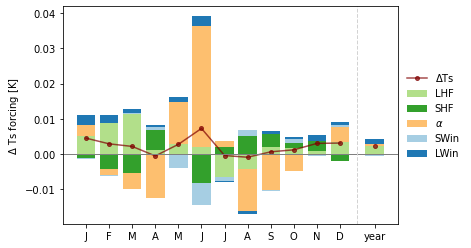

In [22]:
dT_month1 = do_STDC(TSR_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas, SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,dSWin_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[-1.45398133e-03 -3.80477766e-03 -1.02017140e-02 -1.12810028e-02
 -7.65063407e-03  3.61721167e-03  1.25999409e-03  5.15902787e-04
 -8.49146137e-04  7.68482223e-05  3.78534311e-04 -3.97757335e-03]
-0.0027420908306423843


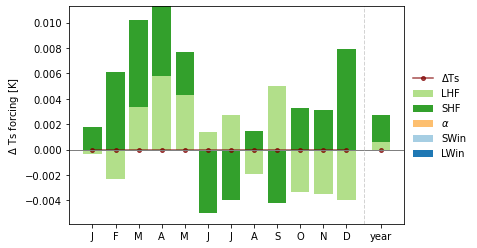

In [23]:
dT_month1 = do_STDC(TSR_harv_frst_mpiesm_seas,dTSR_harv_frst_mpiesm_seas, SWin_harv_frst_mpiesm_seas,SWout_harv_frst_mpiesm_seas,SWin_ctl_harv_frst_mpiesm_seas,SWout_ctl_harv_frst_mpiesm_seas,dSWin_harv_frst_mpiesm_seas,dLWin_harv_frst_mpiesm_seas,dLHF_harv_frst_mpiesm_seas,dSHF_harv_frst_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


In [77]:
##read in data
#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='boreal')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='boreal')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='boreal')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='boreal')
#dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dG_crop_ctl_cesm_avg,dR_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data(case_flag,'avg','cesm')
dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='boreal')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='boreal')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='boreal')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='boreal')



<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

-0.017815115488240274
[0.13818873189864175, 0.719988818126622, -1.4009227984802695, 0.2981094758919226, -0.08173289083344723, -0.34418377888477064, -0.18343468248996586]


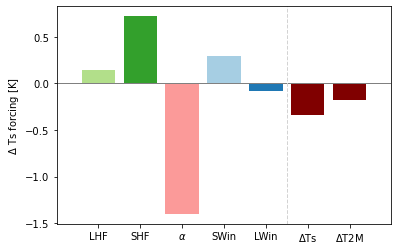

In [6]:
dT_1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
dT_1.append(float(dTSA_crop_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


0.006922887815479256
[0.04350809269780097, -0.3867096125463522, 0.5440635309166985, -0.0692523288876282, 0.04401826528416401, 0.18255083528016228, 0.11054354772543357]


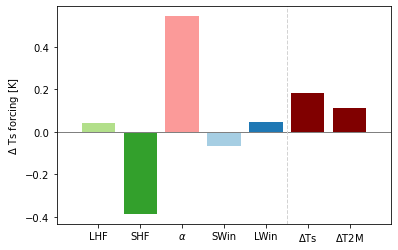

In [7]:
dT_1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
dT_1.append(float(dTSA_frst_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


0.004702313961539252
[-0.005999050907998605, -0.008115979671866511, 0.009924522014622395, 0.00472895438725949, 0.0017764020808978525, 0.007017161864453875, 0.003924317746109568]


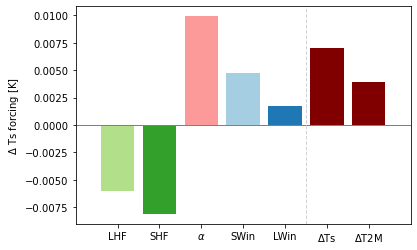

In [8]:
dT_1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
dT_1.append(float(dTSA_irr_crop_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


[ 0.02340853  0.00935694 -0.00625856  0.04755275  0.33215106  0.50465465
 -0.58183174 -0.15664989 -0.03276883 -0.04370409  0.08535627  0.04649568]
-0.017815115488240274


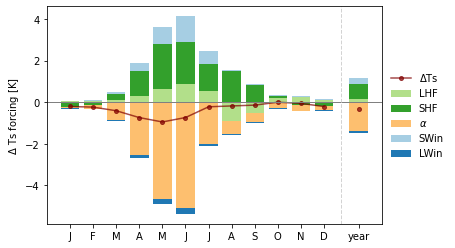

In [10]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.07635088  0.0575747   0.0346959  -0.00181558  0.03823156  0.32671904
 -0.16280124 -0.22639107 -0.13403212 -0.0413758   0.10453272  0.07916914]
0.006922887815479256


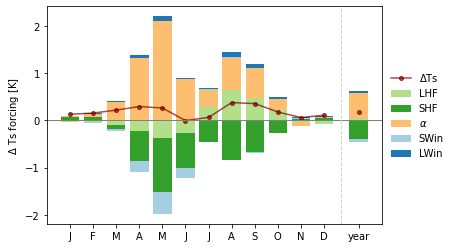

In [11]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.00250878  0.01509917  0.01824688 -0.00063021 -0.0218447  -0.10549511
  0.20781664  0.00513964 -0.00071991  0.02056802 -0.05788257 -0.01920306]
0.004702313961539252


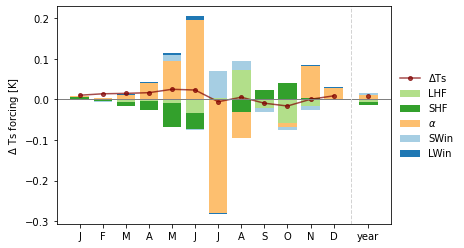

In [12]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [78]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='intermediate')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='intermediate')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='intermediate')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='intermediate')
#dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dG_crop_ctl_cesm_avg,dR_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data(case_flag,'avg','cesm')
dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='intermediate')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='intermediate')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='intermediate')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='intermediate')



<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

-0.055464286290427656
[0.29037837917192305, 1.3114416977521872, -2.1309343008388892, 0.32911531646646625, -0.07932200836879051, -0.33478520210753093, -0.23572634490669192]


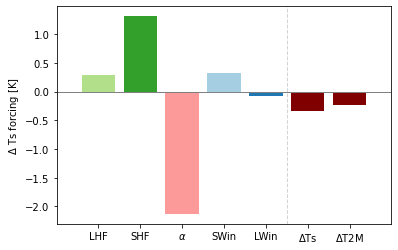

In [14]:
dT_1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
dT_1.append(float(dTSA_crop_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.006853160643275347
[0.04838872231251226, -1.3328985470663777, 1.7387245874353943, -0.21603794937717538, 0.11393627370877145, 0.34525992636984965, 0.20591863429292714]


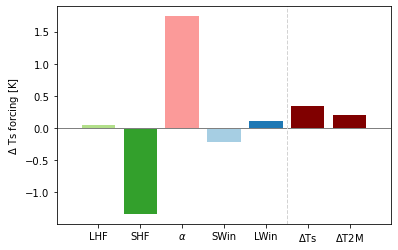

In [15]:
dT_1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
dT_1.append(float(dTSA_frst_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.037967046181094366
[-0.7313811184612263, 0.5377333450327142, 0.16710790082767585, 0.012331066393316475, -0.02779378853934312, -0.0799696409279573, -0.014089113296346462]


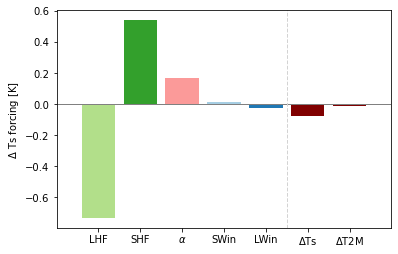

In [16]:
dT_1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
dT_1.append(float(dTSA_irr_crop_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


[-0.00509692 -0.06333194 -0.02396724  0.18870872  0.02685497 -0.16807117
  0.02702714  0.20634785 -0.18868026 -0.21218025 -0.05050679  0.1010793 ]
-0.055464286290427656


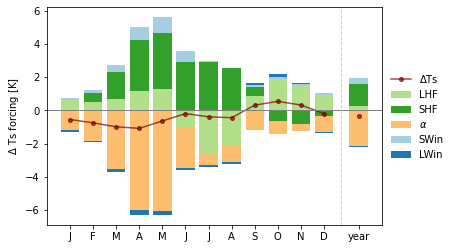

In [17]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[-0.01856789 -0.02537544 -0.02243032  0.02560512  0.30719174  0.04143939
 -0.23057926 -0.118328    0.05267104  0.0368036  -0.02455792 -0.0490965 ]
-0.006853160643275347


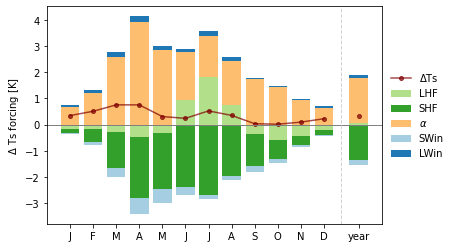

In [18]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.34396914  0.26656785  0.15075152  0.03838803 -0.05151221 -0.13992926
 -0.24338866 -0.35714209 -0.42470729 -0.25488749 -0.02452375  0.26486183]
-0.037967046181094366


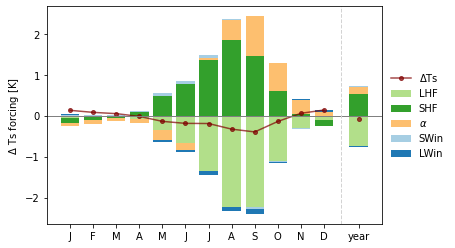

In [19]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [79]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='tropical')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='tropical')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='tropical')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='tropical')
#dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dG_crop_ctl_cesm_avg,dR_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data(case_flag,'avg','cesm')
dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='tropical')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='tropical')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='tropical')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='tropical')



<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'TG_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     K
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

    longname:  Local effect of LCLM change
<xarray.DataArray ()>
array(0.0739651)
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
      

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

-0.6717384582744939
[3.1022653375871547, -1.5869404245387937, -0.0357168921373241, 0.16871872679765904, 0.7959054361137945, 1.7724937255479967, 0.7544389708210032]


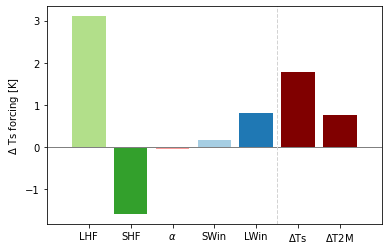

In [21]:
dT_1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
dT_1.append(float(dTSA_crop_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


0.17996173986163788
[-0.6607581110509, -0.4894611188719116, 0.8623374441826697, -0.19834854553541412, -0.17638113596300584, -0.482649727376924, -0.2168617483333602]


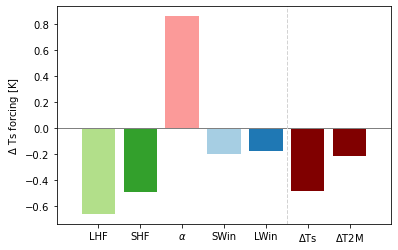

In [22]:
dT_1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
dT_1.append(float(dTSA_frst_ctl_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


-0.0033590911090982667
[-2.2981027001407552, 1.5913454120511434, 0.43578106851186005, -0.028520400525061614, -0.23037298201712067, -0.5332286932290323, -0.2125334821806204]


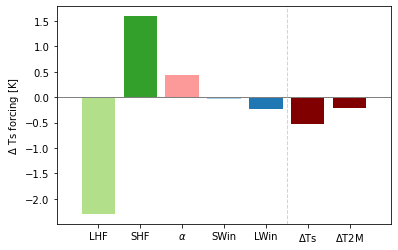

In [23]:
dT_1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
dT_1.append(float(dTSA_irr_crop_cesm_avg))
print(dT_1)
plot_STDC(dT_1)


[-0.39927743 -0.47970869 -0.74995173 -0.96751015 -0.71307059 -0.67548918
 -0.65305352 -0.70206891 -0.78635301 -0.86442727 -0.62781645 -0.3268366 ]
-0.6717384582744939


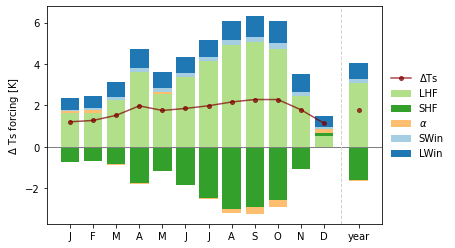

In [24]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[0.17192268 0.1456583  0.19447369 0.28194798 0.24173376 0.16338086
 0.07526008 0.08081044 0.14194831 0.21312107 0.26056503 0.20733856]
0.17996173986163788


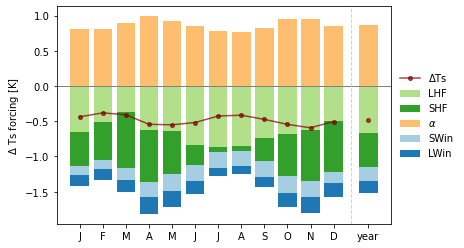

In [25]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.14894701  0.0024954   0.12077834  0.1786157   0.13196776 -0.03648792
 -0.12207739 -0.13855201 -0.14057515 -0.1340045  -0.11159278  0.18958337]
-0.0033590911090982667


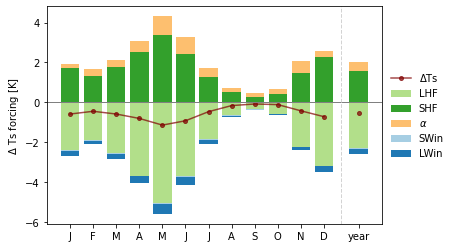

In [26]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [80]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='lnd')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='lnd')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='lnd')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='lnd')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='lnd')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='lnd')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='lnd')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='lnd')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='lnd')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='lnd')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='lnd')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='lnd')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='lnd')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='lnd')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='lnd')


<xarray.DataArray ()>
array(0.06831993)
<xarray.DataArray ()>
array(-0.0195898)
<xarray.DataArray ()>
array(0.01720413)
<xarray.DataArray ()>
array(-0.00067671)
<xarray.DataArray ()>
array(0.08790973)
<xarray.DataArray ()>
array(0.06831993)
<xarray.DataArray ()>
array(-0.0195898)
<xarray.DataArray ()>
array(0.01720413)
<xarray.DataArray ()>
array(-0.00067671)
<xarray.DataArray ()>
array(0.08790973)
<xarray.DataArray ()>
array(0.06831993)
<xarray.DataArray ()>
array(-0.0195898)
<xarray.DataArray ()>
array(0.01720413)
<xarray.DataArray ()>
array(-0.00067671)
<xarray.DataArray ()>
array(0.08790973)


In [82]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_mpiesm_lat,dSWout_crop_ctl_mpiesm_lat,dSWnet_crop_ctl_mpiesm_lat,dLWin_crop_ctl_mpiesm_lat,dLWout_crop_ctl_mpiesm_lat,dLWnet_crop_ctl_mpiesm_lat,dSHF_crop_ctl_mpiesm_lat,dLHF_crop_ctl_mpiesm_lat,dTS_crop_ctl_mpiesm_lat,dTSA_crop_ctl_mpiesm_lat,dTSR_crop_ctl_mpiesm_lat,dalbedo_crop_ctl_mpiesm_lat,SWin_crop_ctl_mpiesm_lat,SWout_crop_ctl_mpiesm_lat,TSR_crop_ctl_mpiesm_lat,LWout_crop_ctl_mpiesm_lat,SWin_ctl_crop_ctl_mpiesm_lat,SWout_ctl_crop_ctl_mpiesm_lat,TSR_ctl_crop_ctl_mpiesm_lat,LWout_ctl_crop_ctl_mpiesm_lat=read_ebal_data('crop-ctl','lat','mpiesm',mask='lnd')
dSWin_frst_ctl_mpiesm_lat,dSWout_frst_ctl_mpiesm_lat,dSWnet_frst_ctl_mpiesm_lat,dLWin_frst_ctl_mpiesm_lat,dLWout_frst_ctl_mpiesm_lat,dLWnet_frst_ctl_mpiesm_lat,dSHF_frst_ctl_mpiesm_lat,dLHF_frst_ctl_mpiesm_lat,dTS_frst_ctl_mpiesm_lat,dTSA_frst_ctl_mpiesm_lat,dTSR_frst_ctl_mpiesm_lat,dalbedo_frst_ctl_mpiesm_lat,SWin_frst_ctl_mpiesm_lat,SWout_frst_ctl_mpiesm_lat,TSR_frst_ctl_mpiesm_lat,LWout_frst_ctl_mpiesm_lat,SWin_ctl_frst_ctl_mpiesm_lat,SWout_ctl_frst_ctl_mpiesm_lat,TSR_ctl_frst_ctl_mpiesm_lat,LWout_ctl_frst_ctl_mpiesm_lat=read_ebal_data('frst-ctl','lat','mpiesm',mask='lnd')
dSWin_irr_crop_mpiesm_lat,dSWout_irr_crop_mpiesm_lat,dSWnet_irr_crop_mpiesm_lat,dLWin_irr_crop_mpiesm_lat,dLWout_irr_crop_mpiesm_lat,dLWnet_irr_crop_mpiesm_lat,dSHF_irr_crop_mpiesm_lat,dLHF_irr_crop_mpiesm_lat,dTS_irr_crop_mpiesm_lat,dTSA_irr_crop_mpiesm_lat,dTSR_irr_crop_mpiesm_lat,dalbedo_irr_crop_mpiesm_lat,SWin_irr_crop_mpiesm_lat,SWout_irr_crop_mpiesm_lat,TSR_irr_crop_mpiesm_lat,LWout_irr_crop_mpiesm_lat,SWin_ctl_irr_crop_mpiesm_lat,SWout_ctl_irr_crop_mpiesm_lat,TSR_ctl_irr_crop_mpiesm_lat,LWout_ctl_irr_crop_mpiesm_lat=read_ebal_data('irr-crop','lat','mpiesm',mask='lnd')
#dSWin_harv_frst_mpiesm_lat,dSWout_harv_frst_mpiesm_lat,dSWnet_harv_frst_mpiesm_lat,dLWin_harv_frst_mpiesm_lat,dLWout_harv_frst_mpiesm_lat,dLWnet_harv_frst_mpiesm_lat,dSHF_harv_frst_mpiesm_lat,dLHF_harv_frst_mpiesm_lat,dTS_harv_frst_mpiesm_lat,dTSA_harv_frst_mpiesm_lat,dTSR_harv_frst_mpiesm_lat,dalbedo_harv_frst_mpiesm_lat,SWin_harv_frst_mpiesm_lat,SWout_harv_frst_mpiesm_lat,TSR_harv_frst_mpiesm_lat,LWout_harv_frst_mpiesm_lat,SWin_ctl_harv_frst_mpiesm_lat,SWout_ctl_harv_frst_mpiesm_lat,TSR_ctl_harv_frst_mpiesm_lat,LWout_ctl_harv_frst_mpiesm_lat=read_ebal_data('harv-frst','lat','mpiesm',mask='lnd')
#dSWin_crop_frst_mpiesm_lat,dSWout_crop_frst_mpiesm_lat,dSWnet_crop_frst_mpiesm_lat,dLWin_crop_frst_mpiesm_lat,dLWout_crop_frst_mpiesm_lat,dLWnet_crop_frst_mpiesm_lat,dSHF_crop_frst_mpiesm_lat,dLHF_crop_frst_mpiesm_lat,dTS_crop_frst_mpiesm_lat,dTSA_crop_frst_mpiesm_lat,dTSR_crop_frst_mpiesm_lat,dalbedo_crop_frst_mpiesm_lat,SWin_crop_frst_mpiesm_lat,SWout_crop_frst_mpiesm_lat,TSR_crop_frst_mpiesm_lat,LWout_crop_frst_mpiesm_lat,SWin_ctl_crop_frst_mpiesm_lat,SWout_ctl_crop_frst_mpiesm_lat,TSR_ctl_crop_frst_mpiesm_lat,LWout_ctl_crop_frst_mpiesm_lat=read_ebal_data('crop-frst','lat','mpiesm',mask='lnd')

dSWin_crop_ctl_mpiesm_seas,dSWout_crop_ctl_mpiesm_seas,dSWnet_crop_ctl_mpiesm_seas,dLWin_crop_ctl_mpiesm_seas,dLWout_crop_ctl_mpiesm_seas,dLWnet_crop_ctl_mpiesm_seas,dSHF_crop_ctl_mpiesm_seas,dLHF_crop_ctl_mpiesm_seas,dTS_crop_ctl_mpiesm_seas,dTSA_crop_ctl_mpiesm_seas,dTSR_crop_ctl_mpiesm_seas,dalbedo_crop_ctl_mpiesm_seas,SWin_crop_ctl_mpiesm_seas,SWout_crop_ctl_mpiesm_seas,TSR_crop_ctl_mpiesm_seas,LWout_crop_ctl_mpiesm_seas,SWin_ctl_crop_ctl_mpiesm_seas,SWout_ctl_crop_ctl_mpiesm_seas,TSR_ctl_crop_ctl_mpiesm_seas,LWout_ctl_crop_ctl_mpiesm_seas=read_ebal_data('crop-ctl','seas','mpiesm',mask='lnd')
dSWin_frst_ctl_mpiesm_seas,dSWout_frst_ctl_mpiesm_seas,dSWnet_frst_ctl_mpiesm_seas,dLWin_frst_ctl_mpiesm_seas,dLWout_frst_ctl_mpiesm_seas,dLWnet_frst_ctl_mpiesm_seas,dSHF_frst_ctl_mpiesm_seas,dLHF_frst_ctl_mpiesm_seas,dTS_frst_ctl_mpiesm_seas,dTSA_frst_ctl_mpiesm_seas,dTSR_frst_ctl_mpiesm_seas,dalbedo_frst_ctl_mpiesm_seas,SWin_frst_ctl_mpiesm_seas,SWout_frst_ctl_mpiesm_seas,TSR_frst_ctl_mpiesm_seas,LWout_frst_ctl_mpiesm_seas,SWin_ctl_frst_ctl_mpiesm_seas,SWout_ctl_frst_ctl_mpiesm_seas,TSR_ctl_frst_ctl_mpiesm_seas,LWout_ctl_frst_ctl_mpiesm_seas=read_ebal_data('frst-ctl','seas','mpiesm',mask='lnd')
dSWin_irr_crop_mpiesm_seas,dSWout_irr_crop_mpiesm_seas,dSWnet_irr_crop_mpiesm_seas,dLWin_irr_crop_mpiesm_seas,dLWout_irr_crop_mpiesm_seas,dLWnet_irr_crop_mpiesm_seas,dSHF_irr_crop_mpiesm_seas,dLHF_irr_crop_mpiesm_seas,dTS_irr_crop_mpiesm_seas,dTSA_irr_crop_mpiesm_seas,dTSR_irr_crop_mpiesm_seas,dalbedo_irr_crop_mpiesm_seas,SWin_irr_crop_mpiesm_seas,SWout_irr_crop_mpiesm_seas,TSR_irr_crop_mpiesm_seas,LWout_irr_crop_mpiesm_seas,SWin_ctl_irr_crop_mpiesm_seas,SWout_ctl_irr_crop_mpiesm_seas,TSR_ctl_irr_crop_mpiesm_seas,LWout_ctl_irr_crop_mpiesm_seas=read_ebal_data('irr-crop','seas','mpiesm',mask='lnd')
#dSWin_harv_frst_mpiesm_seas,dSWout_harv_frst_mpiesm_seas,dSWnet_harv_frst_mpiesm_seas,dLWin_harv_frst_mpiesm_seas,dLWout_harv_frst_mpiesm_seas,dLWnet_harv_frst_mpiesm_seas,dSHF_harv_frst_mpiesm_seas,dLHF_harv_frst_mpiesm_seas,dTS_harv_frst_mpiesm_seas,dTSA_harv_frst_mpiesm_seas,dTSR_harv_frst_mpiesm_seas,dalbedo_harv_frst_mpiesm_seas,SWin_harv_frst_mpiesm_seas,SWout_harv_frst_mpiesm_seas,TSR_harv_frst_mpiesm_seas,LWout_harv_frst_mpiesm_seas,SWin_ctl_harv_frst_mpiesm_seas,SWout_ctl_harv_frst_mpiesm_seas,TSR_ctl_harv_frst_mpiesm_seas,LWout_ctl_harv_frst_mpiesm_seas=read_ebal_data('harv-frst','seas','mpiesm',mask='lnd')
#dSWin_crop_frst_mpiesm_seas,dSWout_crop_frst_mpiesm_seas,dSWnet_crop_frst_mpiesm_seas,dLWin_crop_frst_mpiesm_seas,dLWout_crop_frst_mpiesm_seas,dLWnet_crop_frst_mpiesm_seas,dSHF_crop_frst_mpiesm_seas,dLHF_crop_frst_mpiesm_seas,dTS_crop_frst_mpiesm_seas,dTSA_crop_frst_mpiesm_seas,dTSR_crop_frst_mpiesm_seas,dalbedo_crop_frst_mpiesm_seas,SWin_crop_frst_mpiesm_seas,SWout_crop_frst_mpiesm_seas,TSR_crop_frst_mpiesm_seas,LWout_crop_frst_mpiesm_seas,SWin_ctl_crop_frst_mpiesm_seas,SWout_ctl_crop_frst_mpiesm_seas,TSR_ctl_crop_frst_mpiesm_seas,LWout_ctl_crop_frst_mpiesm_seas=read_ebal_data('crop-frst','seas','mpiesm',mask='lnd')

dSWin_crop_ctl_mpiesm_avg,dSWout_crop_ctl_mpiesm_avg,dSWnet_crop_ctl_mpiesm_avg,dLWin_crop_ctl_mpiesm_avg,dLWout_crop_ctl_mpiesm_avg,dLWnet_crop_ctl_mpiesm_avg,dSHF_crop_ctl_mpiesm_avg,dLHF_crop_ctl_mpiesm_avg,dTS_crop_ctl_mpiesm_avg,dTSA_crop_ctl_mpiesm_avg,dTSR_crop_ctl_mpiesm_avg,dalbedo_crop_ctl_mpiesm_avg,SWin_crop_ctl_mpiesm_avg,SWout_crop_ctl_mpiesm_avg,TSR_crop_ctl_mpiesm_avg,LWout_crop_ctl_mpiesm_avg,SWin_ctl_crop_ctl_mpiesm_avg,SWout_ctl_crop_ctl_mpiesm_avg,TSR_ctl_crop_ctl_mpiesm_avg,LWout_ctl_crop_ctl_mpiesm_avg=read_ebal_data('crop-ctl','avg','mpiesm',mask='lnd')
dSWin_frst_ctl_mpiesm_avg,dSWout_frst_ctl_mpiesm_avg,dSWnet_frst_ctl_mpiesm_avg,dLWin_frst_ctl_mpiesm_avg,dLWout_frst_ctl_mpiesm_avg,dLWnet_frst_ctl_mpiesm_avg,dSHF_frst_ctl_mpiesm_avg,dLHF_frst_ctl_mpiesm_avg,dTS_frst_ctl_mpiesm_avg,dTSA_frst_ctl_mpiesm_avg,dTSR_frst_ctl_mpiesm_avg,dalbedo_frst_ctl_mpiesm_avg,SWin_frst_ctl_mpiesm_avg,SWout_frst_ctl_mpiesm_avg,TSR_frst_ctl_mpiesm_avg,LWout_frst_ctl_mpiesm_avg,SWin_ctl_frst_ctl_mpiesm_avg,SWout_ctl_frst_ctl_mpiesm_avg,TSR_ctl_frst_ctl_mpiesm_avg,LWout_ctl_frst_ctl_mpiesm_avg=read_ebal_data('frst-ctl','avg','mpiesm',mask='lnd')
dSWin_irr_crop_mpiesm_avg,dSWout_irr_crop_mpiesm_avg,dSWnet_irr_crop_mpiesm_avg,dLWin_irr_crop_mpiesm_avg,dLWout_irr_crop_mpiesm_avg,dLWnet_irr_crop_mpiesm_avg,dSHF_irr_crop_mpiesm_avg,dLHF_irr_crop_mpiesm_avg,dTS_irr_crop_mpiesm_avg,dTSA_irr_crop_mpiesm_avg,dTSR_irr_crop_mpiesm_avg,dalbedo_irr_crop_mpiesm_avg,SWin_irr_crop_mpiesm_avg,SWout_irr_crop_mpiesm_avg,TSR_irr_crop_mpiesm_avg,LWout_irr_crop_mpiesm_avg,SWin_ctl_irr_crop_mpiesm_avg,SWout_ctl_irr_crop_mpiesm_avg,TSR_ctl_irr_crop_mpiesm_avg,LWout_ctl_irr_crop_mpiesm_avg=read_ebal_data('irr-crop','avg','mpiesm',mask='lnd')
#dSWin_harv_frst_mpiesm_avg,dSWout_harv_frst_mpiesm_avg,dSWnet_harv_frst_mpiesm_avg,dLWin_harv_frst_mpiesm_avg,dLWout_harv_frst_mpiesm_avg,dLWnet_harv_frst_mpiesm_avg,dSHF_harv_frst_mpiesm_avg,dLHF_harv_frst_mpiesm_avg,dTS_harv_frst_mpiesm_avg,dTSA_harv_frst_mpiesm_avg,dTSR_harv_frst_mpiesm_avg,dalbedo_harv_frst_mpiesm_avg,SWin_harv_frst_mpiesm_avg,SWout_harv_frst_mpiesm_avg,TSR_harv_frst_mpiesm_avg,LWout_harv_frst_mpiesm_avg,SWin_ctl_harv_frst_mpiesm_avg,SWout_ctl_harv_frst_mpiesm_avg,TSR_ctl_harv_frst_mpiesm_avg,LWout_ctl_harv_frst_mpiesm_avg=read_ebal_data('harv-frst','avg','mpiesm',mask='lnd')
#dSWin_crop_frst_mpiesm_avg,dSWout_crop_frst_mpiesm_avg,dSWnet_crop_frst_mpiesm_avg,dLWin_crop_frst_mpiesm_avg,dLWout_crop_frst_mpiesm_avg,dLWnet_crop_frst_mpiesm_avg,dSHF_crop_frst_mpiesm_avg,dLHF_crop_frst_mpiesm_avg,dTS_crop_frst_mpiesm_avg,dTSA_crop_frst_mpiesm_avg,dTSR_crop_frst_mpiesm_avg,dalbedo_crop_frst_mpiesm_avg,SWin_crop_frst_mpiesm_avg,SWout_crop_frst_mpiesm_avg,TSR_crop_frst_mpiesm_avg,LWout_crop_frst_mpiesm_avg,SWin_ctl_crop_frst_mpiesm_avg,SWout_ctl_crop_frst_mpiesm_avg,TSR_ctl_crop_frst_mpiesm_avg,LWout_ctl_crop_frst_mpiesm_avg=read_ebal_data('crop-frst','avg','mpiesm',mask='lnd')


<xarray.DataArray ()>
array(-0.09882265)
<xarray.DataArray ()>
array(0.09553971)
<xarray.DataArray ()>
array(0.00242333)
<xarray.DataArray ()>
array(-0.09882265)
<xarray.DataArray ()>
array(0.09553971)
<xarray.DataArray ()>
array(0.00242333)
<xarray.DataArray ()>
array(-0.09882265)
<xarray.DataArray ()>
array(0.09553971)
<xarray.DataArray ()>
array(0.00242333)


[[ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.15245595663149497
[ 0.7562696   0.48448929  2.50799076  1.78215379  0.57738981  0.23793788
 -0.44425668 -0.23465138]


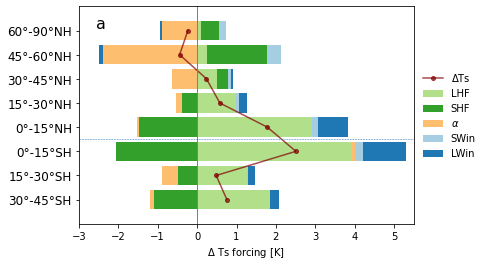

In [23]:
dT_lat = do_STDC(TSR_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat, SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,dSWin_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat)
dT_year = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,ylims=[-3,5.5],panel_label='a')

[-0.05077126 -0.11622517 -0.19065537 -0.21627953 -0.13487405 -0.07712585
 -0.20321429 -0.13409099 -0.23011396 -0.2500397  -0.12481953 -0.01194677]
-0.15245595663149497
[array([0.37462195, 0.56843879, 0.8285545 , 1.22972888, 0.92631926,
       0.42220621, 0.3114357 , 0.4446038 , 1.25941671, 1.56600034,
       0.91438131, 0.15189255]), array([-0.08194073, -0.06747802,  0.11418821,  0.3400922 ,  0.77287766,
        0.72472056,  0.38360257,  0.18121514, -0.38411797, -0.71796559,
       -0.43529986,  0.08736027]), array([-0.27450028, -0.46456355, -0.93228033, -1.67289824, -1.97987525,
       -1.41251928, -0.55188059, -0.3894883 , -0.43821662, -0.34213173,
       -0.15102597, -0.20305163]), array([0.03723169, 0.06968991, 0.15470724, 0.30943338, 0.42719384,
       0.42085277, 0.17528758, 0.04839885, 0.10599663, 0.12436353,
       0.0779259 , 0.04349885]), array([0.07242211, 0.09143481, 0.10600269, 0.11283336, 0.06779167,
       0.06404496, 0.10225206, 0.14678432, 0.22119455, 0.24111743,
     

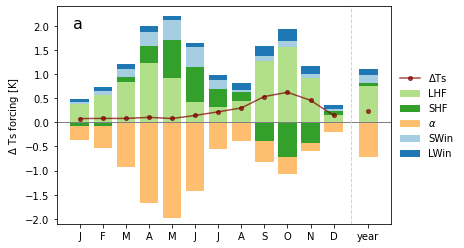

In [7]:
dT_seas = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_seas,dT_year,ylims=[-2.1,2.4],panel_label='a')


[-0.06550889 -0.07522668 -0.06480193 -0.0780565  -0.01048716 -0.02390393
 -0.03297784 -0.08965796 -0.09258485 -0.04769255 -0.02485605 -0.03714667]
-0.05797434340207003
[array([0.4806191 , 0.56856509, 0.76867139, 0.8650776 , 0.7965378 ,
       0.63550634, 0.35736278, 0.59090929, 0.77367493, 0.67888339,
       0.55156608, 0.50140242]), array([-0.14224258,  0.03049264,  0.14914516, -0.01068774, -0.36128987,
       -0.11899269,  0.2473114 ,  0.0507092 , -0.18180583, -0.19760599,
       -0.19898841, -0.23663893]), array([-0.4196059 , -0.70512221, -1.01998716, -0.7334477 , -0.00665952,
       -0.17180568, -0.39281674, -0.30692861, -0.16850931, -0.16887752,
       -0.24504876, -0.29895885]), array([0.10164782, 0.22227878, 0.44987447, 0.47284528, 0.14790219,
       0.12381402, 0.11108858, 0.10667618, 0.08371211, 0.08233133,
       0.06862791, 0.06365873]), array([ 0.02458729,  0.0153466 , -0.02460628, -0.00516623,  0.11736724,
        0.10492035,  0.084597  ,  0.10205116,  0.10650982,  0.06674

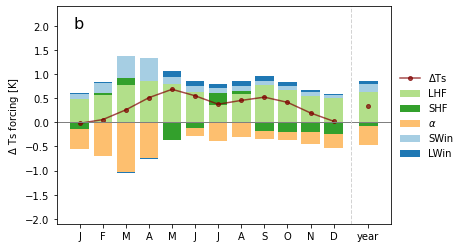

In [8]:

dT_seas = do_STDC(TSR_crop_ctl_mpiesm_seas,dTSR_crop_ctl_mpiesm_seas, SWin_crop_ctl_mpiesm_seas,SWout_crop_ctl_mpiesm_seas,SWin_ctl_crop_ctl_mpiesm_seas,SWout_ctl_crop_ctl_mpiesm_seas,dSWin_crop_ctl_mpiesm_seas,dLWin_crop_ctl_mpiesm_seas,dLHF_crop_ctl_mpiesm_seas,dSHF_crop_ctl_mpiesm_seas)
dT_year = do_STDC(float(TSR_crop_ctl_mpiesm_avg),float(dTSR_crop_ctl_mpiesm_avg), float(SWin_crop_ctl_mpiesm_avg),float(SWout_crop_ctl_mpiesm_avg),float(SWin_ctl_crop_ctl_mpiesm_avg),float(SWout_ctl_crop_ctl_mpiesm_avg),float(dSWin_crop_ctl_mpiesm_avg),float(dLWin_crop_ctl_mpiesm_avg),float(dLHF_crop_ctl_mpiesm_avg),float(dSHF_crop_ctl_mpiesm_avg))
plot_STDC_seas(dT_seas,dT_year,ylims=[-2.1,2.4],panel_label='b')


[[-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.05797434340207003
[0.86853381 1.21752266 0.5824794  0.89795548 0.36407733 0.90737527
 0.22627789 0.01583782]


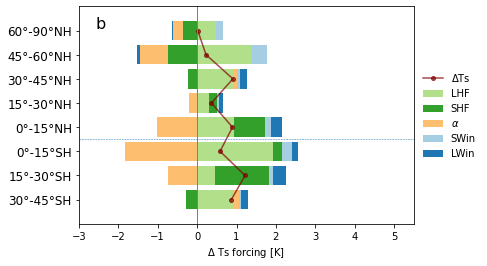

In [26]:
dT_lat = do_STDC(TSR_crop_ctl_mpiesm_lat,dTSR_crop_ctl_mpiesm_lat, SWin_crop_ctl_mpiesm_lat,SWout_crop_ctl_mpiesm_lat,SWin_ctl_crop_ctl_mpiesm_lat,SWout_ctl_crop_ctl_mpiesm_lat,dSWin_crop_ctl_mpiesm_lat,dLWin_crop_ctl_mpiesm_lat,dLHF_crop_ctl_mpiesm_lat,dSHF_crop_ctl_mpiesm_lat)
dT_year = do_STDC(float(TSR_crop_ctl_mpiesm_avg),float(dTSR_crop_ctl_mpiesm_avg), float(SWin_crop_ctl_mpiesm_avg),float(SWout_crop_ctl_mpiesm_avg),float(SWin_ctl_crop_ctl_mpiesm_avg),float(SWout_ctl_crop_ctl_mpiesm_avg),float(dSWin_crop_ctl_mpiesm_avg),float(dLWin_crop_ctl_mpiesm_avg),float(dLHF_crop_ctl_mpiesm_avg),float(dSHF_crop_ctl_mpiesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='mpiesm',ylims=[-3,5.5],panel_label='b')


TSR [268.89432422 267.89709266 266.40729917 266.02173329 268.08437697
 270.87215984 272.95744275 273.91522066 273.60471599 271.69983549
 270.07098107 269.34142687]
SWin [0.03723169 0.06968991 0.15470724 0.30943338 0.42719384 0.42085277
 0.17528758 0.04839885 0.10599663 0.12436353 0.0779259  0.04349885]
LWin [0.07242211 0.09143481 0.10600269 0.11283336 0.06779167 0.06404496
 0.10225206 0.14678432 0.22119455 0.24111743 0.17495106 0.07573659]
LHF [0.37462195 0.56843879 0.8285545  1.22972888 0.92631926 0.42220621
 0.3114357  0.4446038  1.25941671 1.56600034 0.91438131 0.15189255]
[-0.05077126 -0.11622517 -0.19065537 -0.21627953 -0.13487405 -0.07712585
 -0.20321429 -0.13409099 -0.23011396 -0.2500397  -0.12481953 -0.01194677]
TSR 269.97998362975244
SWin 0.15941240305245585
LWin 0.12391766574797825
LHF 0.7492193743950932
-0.15245595663149497
[array([0.37462195, 0.56843879, 0.8285545 , 1.22972888, 0.92631926,
       0.42220621, 0.3114357 , 0.4446038 , 1.25941671, 1.56600034,
       0.91438131,

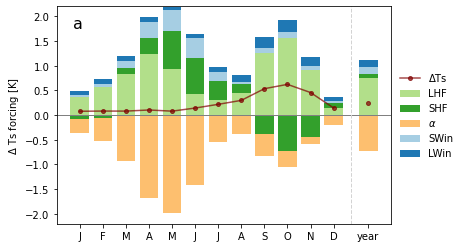

In [83]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))

plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.2,2.2],panel_label='a')

TSR [[224.64866638 224.79559326 225.85151672 ...          nan          nan
           nan]
 [224.64866638 224.79559326 225.85151672 ...          nan          nan
           nan]
 [224.64866638 224.79559326 225.85151672 ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]]
SWin [[ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LWin [[ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LHF [[-0. -0. -0. ... nan nan nan]
 [-0. -0. -0. ... nan nan nan]
 [-0. -0

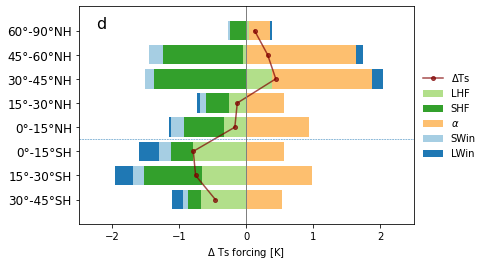

In [84]:
dT_lat = do_STDC(TSR_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat, SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,dSWin_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat)
dT_year = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,ylims=[-2.5,2.5],panel_label='d')


TSR [[224.81138611 229.91001892 234.28671265 ... 259.78765869 259.59619141
  259.37512207]
 [224.81138611 229.91001892 234.28671265 ... 259.78765869 259.59619141
  259.37512207]
 [224.81138611 229.91001892 234.28671265 ... 259.78765869 259.59619141
  259.37512207]
 ...
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]]
SWin [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LWin [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LHF [[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0

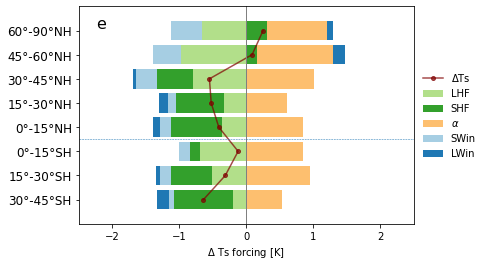

In [85]:
dT_lat = do_STDC(TSR_frst_ctl_mpiesm_lat,dTSR_frst_ctl_mpiesm_lat, SWin_frst_ctl_mpiesm_lat,SWout_frst_ctl_mpiesm_lat,SWin_ctl_frst_ctl_mpiesm_lat,SWout_ctl_frst_ctl_mpiesm_lat,dSWin_frst_ctl_mpiesm_lat,dLWin_frst_ctl_mpiesm_lat,dLHF_frst_ctl_mpiesm_lat,dSHF_frst_ctl_mpiesm_lat)
dT_year = do_STDC(float(TSR_frst_ctl_mpiesm_avg),float(dTSR_frst_ctl_mpiesm_avg), float(SWin_frst_ctl_mpiesm_avg),float(SWout_frst_ctl_mpiesm_avg),float(SWin_ctl_frst_ctl_mpiesm_avg),float(SWout_ctl_frst_ctl_mpiesm_avg),float(dSWin_frst_ctl_mpiesm_avg),float(dLWin_frst_ctl_mpiesm_avg),float(dLHF_frst_ctl_mpiesm_avg),float(dSHF_frst_ctl_mpiesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='mpiesm',ylims=[-2.5,2.5],panel_label='e')


[-1.45398133e-03 -3.80477766e-03 -1.02017140e-02 -1.12810028e-02
 -7.65063407e-03  3.61721167e-03  1.25999409e-03  5.15902787e-04
 -8.49146137e-04  7.68482223e-05  3.78534311e-04 -3.97757335e-03]
-0.0027420908306423843
[array([-0.00036193, -0.00233859,  0.00331636,  0.00582356,  0.00432181,
        0.00140953,  0.0027006 , -0.00194844,  0.0050196 , -0.00333172,
       -0.00348083, -0.00395936]), array([ 0.00181598,  0.0061435 ,  0.00688531,  0.00545735,  0.00332902,
       -0.00502654, -0.00396053,  0.00143234, -0.00417063,  0.00325498,
        0.00310266,  0.00793722]), array([-7.40118326e-08, -1.30482561e-07,  3.78979000e-08,  9.00399106e-08,
       -2.01898078e-07, -2.01858270e-07, -5.88632515e-08,  1.92335793e-07,
        1.75602619e-07, -1.13888481e-07, -3.56867007e-07, -2.83553415e-07]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


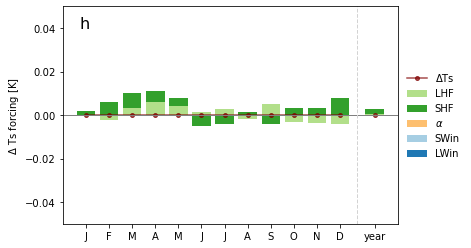

In [26]:
dT_month1 = do_STDC(TSR_harv_frst_mpiesm_seas,dTSR_harv_frst_mpiesm_seas, SWin_harv_frst_mpiesm_seas,SWout_harv_frst_mpiesm_seas,SWin_ctl_harv_frst_mpiesm_seas,SWout_ctl_harv_frst_mpiesm_seas,dSWin_harv_frst_mpiesm_seas,dLWin_harv_frst_mpiesm_seas,dLHF_harv_frst_mpiesm_seas,dSHF_harv_frst_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1,ylims=[-0.05,0.05],panel_label='h')


[-0.00491623 -0.0020075  -0.00086423  0.00373042 -0.00970372 -0.01738598
  0.00379174  0.00919698  0.00450981  0.00113754 -0.00201519 -0.0041436 ]
-0.0014159204008929202
[array([ 0.00499898,  0.00884737,  0.01137574,  0.00126027,  0.00281033,
        0.001992  , -0.0065829 , -0.00416302,  0.00204872,  0.00178618,
        0.00074565,  0.00344459]), array([-0.00120205, -0.0042899 , -0.00546413,  0.00562626, -0.00022109,
       -0.00807904,  0.00196299,  0.0050497 ,  0.00356971,  0.00142465,
        0.00292811, -0.00193194]), array([ 0.00316107, -0.0016528 , -0.00433653, -0.01248598,  0.01184575,
        0.03419503,  0.0017718 , -0.0119862 , -0.01006473, -0.00465863,
       -0.00034125,  0.0041695 ]), array([-0.00031618, -0.00027108,  0.00032996,  0.00071008, -0.00362031,
       -0.00632916, -0.00109064,  0.00181815, -0.00027131,  0.00097395,
       -0.00010453,  0.00056215]), array([ 0.00278785,  0.00227757,  0.00112826,  0.00063348,  0.00165545,
        0.00287707, -0.00026747, -0.00080

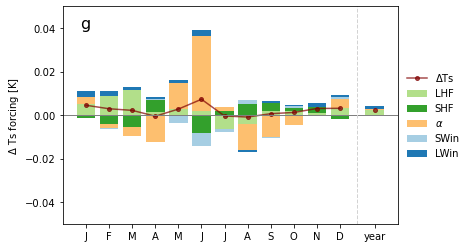

In [27]:
dT_month1 = do_STDC(TSR_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas, SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,dSWin_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1,ylims=[-0.05,0.05],panel_label='g')


TSR [277.90661839 277.57302892 277.72357837 278.6641603  280.01057957
 281.10958929 281.48311606 281.05850912 280.10948085 279.30201361
 278.65269515 278.17284158]
SWin [-0.03134844 -0.03030416 -0.03790382 -0.0883437  -0.24900595 -0.39425424
 -0.33169299 -0.21287793 -0.12958917 -0.06542228 -0.03470746 -0.02645046]
LWin [0.01267078 0.00678692 0.00852787 0.02192707 0.06279319 0.08416324
 0.06642999 0.02986337 0.01928063 0.01538425 0.01163496 0.00852277]
LHF [-0.32326934 -0.36592315 -0.47792077 -0.79390393 -1.4432014  -1.63135276
 -1.17047396 -1.06172229 -0.96790935 -0.68719184 -0.40119797 -0.30420839]
[ 0.03113112  0.04637489  0.07975806  0.12660479  0.10470953 -0.00157523
 -0.06136556  0.01350167  0.05192062  0.05784233  0.03740945  0.02380724]
TSR 279.3135406712404
SWin -0.1343837944583721
LWin 0.029298053356646276
LHF -0.807887714235672
0.04576607881815398
[array([-0.32326934, -0.36592315, -0.47792077, -0.79390393, -1.4432014 ,
       -1.63135276, -1.17047396, -1.06172229, -0.96790935

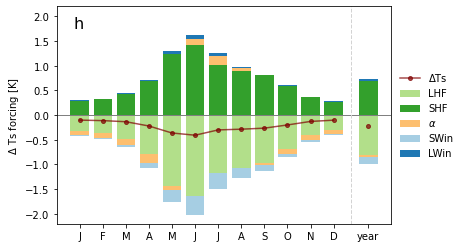

In [86]:
dT_month1 = do_STDC(TSR_irr_crop_mpiesm_seas,dTSR_irr_crop_mpiesm_seas, SWin_irr_crop_mpiesm_seas,SWout_irr_crop_mpiesm_seas,SWin_ctl_irr_crop_mpiesm_seas,SWout_ctl_irr_crop_mpiesm_seas,dSWin_irr_crop_mpiesm_seas,dLWin_irr_crop_mpiesm_seas,dLHF_irr_crop_mpiesm_seas,dSHF_irr_crop_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_mpiesm_avg),float(dTSR_irr_crop_mpiesm_avg), float(SWin_irr_crop_mpiesm_avg),float(SWout_irr_crop_mpiesm_avg),float(SWin_ctl_irr_crop_mpiesm_avg),float(SWout_ctl_irr_crop_mpiesm_avg),float(dSWin_irr_crop_mpiesm_avg),float(dLWin_irr_crop_mpiesm_avg),float(dLHF_irr_crop_mpiesm_avg),float(dSHF_irr_crop_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.2,2.2],panel_label='h')


TSR [268.52396171 267.59413145 266.0861637  265.60994047 267.49531031
 270.15331671 272.29761324 273.30814393 272.81095629 270.93765338
 269.44690646 268.89851303]
SWin [-0.00905026 -0.01015048 -0.00814036 -0.00599091 -0.0017695  -0.00607141
  0.00721207 -0.00584677 -0.02094062 -0.01629492 -0.01191267 -0.00625987]
LWin [-0.06242421 -0.04739251 -0.04943775 -0.06206084 -0.1004527  -0.11605739
 -0.08799502 -0.05507993 -0.03941729 -0.01700197 -0.02894983 -0.0643904 ]
LHF [-0.83243676 -0.64830551 -0.63666582 -0.73948424 -1.121185   -1.2104561
 -1.09004379 -0.85983234 -0.67656559 -0.43636404 -0.58945045 -0.8521287 ]
[ 0.09534113  0.03602964  0.02655083  0.0107269  -0.01326128 -0.03557946
 -0.02924454 -0.12736313 -0.1384339  -0.09754741 -0.06979482  0.07562943]
TSR 269.429650438551
SWin -0.008195056585786118
LWin -0.06084236839745201
LHF -0.8086562981904594
-0.023805305263252946
[array([-0.83243676, -0.64830551, -0.63666582, -0.73948424, -1.121185  ,
       -1.2104561 , -1.09004379, -0.859832

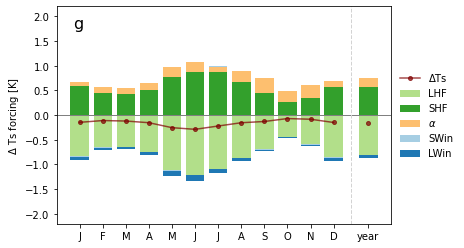

In [87]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.2,2.2],panel_label='g')


TSR [[224.81138611 229.91001892 234.28671265 ... 259.78765869 259.59619141
  259.37512207]
 [224.81138611 229.91001892 234.28671265 ... 259.78765869 259.59619141
  259.37512207]
 [224.81138611 229.91001892 234.28671265 ... 259.78765869 259.59619141
  259.37512207]
 ...
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]]
SWin [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LWin [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LHF [[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0

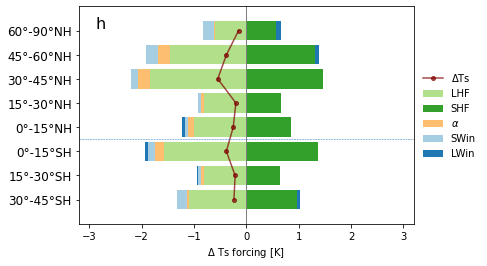

In [88]:
dT_month1 = do_STDC(TSR_irr_crop_mpiesm_lat,dTSR_irr_crop_mpiesm_lat, SWin_irr_crop_mpiesm_lat,SWout_irr_crop_mpiesm_lat,SWin_ctl_irr_crop_mpiesm_lat,SWout_ctl_irr_crop_mpiesm_lat,dSWin_irr_crop_mpiesm_lat,dLWin_irr_crop_mpiesm_lat,dLHF_irr_crop_mpiesm_lat,dSHF_irr_crop_mpiesm_lat)
dT_year1 = do_STDC(float(TSR_irr_crop_mpiesm_avg),float(dTSR_irr_crop_mpiesm_avg), float(SWin_irr_crop_mpiesm_avg),float(SWout_irr_crop_mpiesm_avg),float(SWin_ctl_irr_crop_mpiesm_avg),float(SWout_ctl_irr_crop_mpiesm_avg),float(dSWin_irr_crop_mpiesm_avg),float(dLWin_irr_crop_mpiesm_avg),float(dLHF_irr_crop_mpiesm_avg),float(dSHF_irr_crop_mpiesm_avg))
plot_STDC_lat_15(dT_month1,dT_year1,model='mpiesm',ylims=[-3.2,3.2],panel_label='h')


TSR [[224.64866638 224.79559326 225.85151672 ...          nan          nan
           nan]
 [224.64866638 224.79559326 225.85151672 ...          nan          nan
           nan]
 [224.64866638 224.79559326 225.85151672 ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]]
SWin [[ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LWin [[ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
LHF [[-0. -0. -0. ... nan nan nan]
 [-0. -0. -0. ... nan nan nan]
 [-0. -0

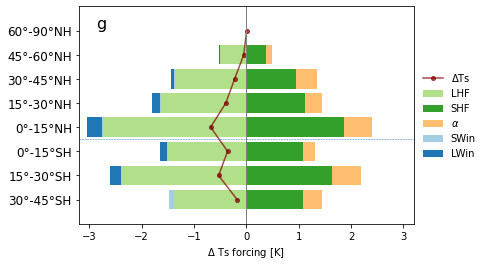

In [89]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat, SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,dSWin_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_lat_15(dT_month1,dT_year1,ylims=[-3.2,3.2],panel_label='g')


[[-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.0027420908306423843
[0. 0. 0. 0. 0. 0. 0. 0.]


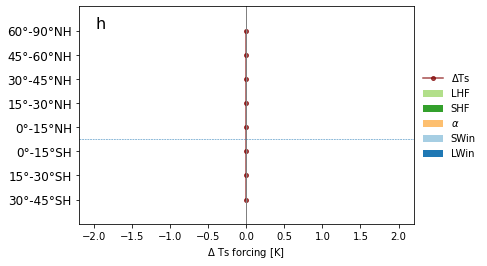

In [28]:
dT_month1 = do_STDC(TSR_harv_frst_mpiesm_lat,dTSR_harv_frst_mpiesm_lat, SWin_harv_frst_mpiesm_lat,SWout_harv_frst_mpiesm_lat,SWin_ctl_harv_frst_mpiesm_lat,SWout_ctl_harv_frst_mpiesm_lat,dSWin_harv_frst_mpiesm_lat,dLWin_harv_frst_mpiesm_lat,dLHF_harv_frst_mpiesm_lat,dSHF_harv_frst_mpiesm_lat)
dT_year1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
plot_STDC_lat_15(dT_month1,dT_year1,model='mpiesm',ylims=[-2.2,2.2],panel_label='h')


[[ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.0014159204008929202
[ 0.02191382  0.02274173  0.00834459  0.01064423  0.00192142 -0.00821768
  0.00195795 -0.00271305]


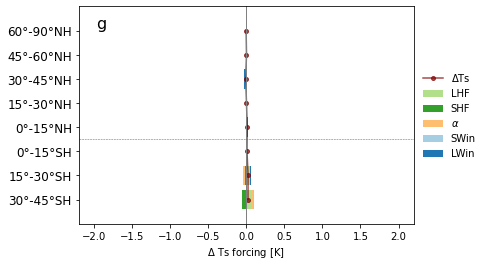

In [29]:
dT_month1 = do_STDC(TSR_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat, SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,dSWin_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat)
dT_year1 = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
plot_STDC_lat_15(dT_month1,dT_year1,model='cesm',ylims=[-2.2,2.2],panel_label='g')


TSR [278.26808481 277.91963225 277.98017261 278.92778768 280.43052016
 281.61163931 281.81374976 281.38298711 280.42646226 279.60542046
 278.94332362 278.49943288]
SWin [-0.14148342 -0.28882635 -0.57462654 -0.79922549 -0.458188   -0.16142251
 -0.17146286 -0.1656717  -0.15299907 -0.1311397  -0.09949371 -0.09477321]
LWin [ 0.04454176  0.06722341  0.1087096   0.11955972  0.00228306 -0.06652504
 -0.05409037 -0.03674062 -0.00259984  0.03427312  0.0352581   0.04002541]
LHF [-0.49529859 -0.55464082 -0.67550008 -0.73505616 -0.55042965 -0.32917508
 -0.3666707  -0.42084047 -0.4541559  -0.43887836 -0.47663791 -0.50676483]
[0.05739789 0.07597911 0.09426845 0.1162312  0.0224259  0.03009212
 0.06790601 0.05890713 0.03629724 0.00603972 0.01428379 0.03236121]
TSR 279.6504574778659
SWin -0.26368016197202787
LWin 0.023585011620044987
LHF -0.4992140933484633
0.05008266388765335
[array([-0.49529859, -0.55464082, -0.67550008, -0.73505616, -0.55042965,
       -0.32917508, -0.3666707 , -0.42084047, -0.454155

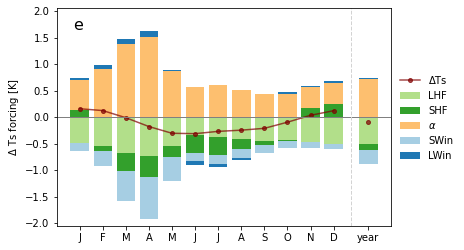

In [90]:
dT_month1 = do_STDC(TSR_frst_ctl_mpiesm_seas,dTSR_frst_ctl_mpiesm_seas, SWin_frst_ctl_mpiesm_seas,SWout_frst_ctl_mpiesm_seas,SWin_ctl_frst_ctl_mpiesm_seas,SWout_ctl_frst_ctl_mpiesm_seas,dSWin_frst_ctl_mpiesm_seas,dLWin_frst_ctl_mpiesm_seas,dLHF_frst_ctl_mpiesm_seas,dSHF_frst_ctl_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_mpiesm_avg),float(dTSR_frst_ctl_mpiesm_avg), float(SWin_frst_ctl_mpiesm_avg),float(SWout_frst_ctl_mpiesm_avg),float(SWin_ctl_frst_ctl_mpiesm_avg),float(SWout_ctl_frst_ctl_mpiesm_avg),float(dSWin_frst_ctl_mpiesm_avg),float(dLWin_frst_ctl_mpiesm_avg),float(dLHF_frst_ctl_mpiesm_avg),float(dSHF_frst_ctl_mpiesm_avg))

plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.05,2.05],panel_label='e')


TSR [268.81256564 267.84874825 266.41189348 265.99888762 268.01500081
 270.72415407 272.80767974 273.68247763 273.0392378  270.99011774
 269.50776073 269.15126237]
SWin [-0.04027227 -0.05820333 -0.11524219 -0.2169093  -0.24383454 -0.14897111
 -0.07732433 -0.08176604 -0.10812926 -0.09453269 -0.06402805 -0.0467792 ]
LWin [-0.02222838 -0.01904105 -0.00389183  0.00881958  0.00804764  0.0083549
  0.03391133  0.02998255 -0.00767643 -0.0292901  -0.03667209 -0.02383292]
LHF [-0.13441766 -0.15020387 -0.15085918 -0.22799718 -0.16183586  0.12405153
  0.26934093  0.04575732 -0.20559268 -0.27142254 -0.25517117 -0.11750506]
[ 0.06308869  0.05749105  0.0536822   0.05668859  0.08881322  0.05610493
 -0.09427355 -0.06235932  0.01369379  0.0496125   0.07876683  0.06027331]
TSR 269.74858170527506
SWin -0.10315557457415461
LWin -0.00425889130285549
LHF -0.10088112914646873
0.033625986547856965
[array([-0.13441766, -0.15020387, -0.15085918, -0.22799718, -0.16183586,
        0.12405153,  0.26934093,  0.04575

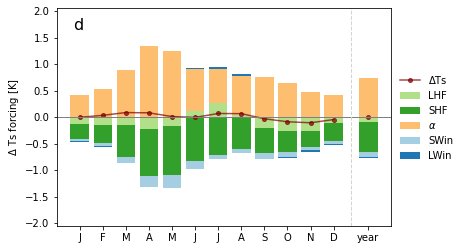

In [91]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))

plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.05,2.05],panel_label='d')


In [ ]:
dT_month1 = do_STDC(TSR_crop_ctl_mpiesm_seas,dTSR_crop_ctl_mpiesm_seas, SWin_crop_ctl_mpiesm_seas,SWout_crop_ctl_mpiesm_seas,SWin_ctl_crop_ctl_mpiesm_seas,SWout_ctl_crop_ctl_mpiesm_seas,dSWin_crop_ctl_mpiesm_seas,dLWin_crop_ctl_mpiesm_seas,dLHF_crop_ctl_mpiesm_seas,dSHF_crop_ctl_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_mpiesm_avg),float(dTSR_crop_ctl_mpiesm_avg), float(SWin_crop_ctl_mpiesm_avg),float(SWout_crop_ctl_mpiesm_avg),float(SWin_ctl_crop_ctl_mpiesm_avg),float(SWout_ctl_crop_ctl_mpiesm_avg),float(dSWin_crop_ctl_mpiesm_avg),float(dLWin_crop_ctl_mpiesm_avg),float(dLHF_crop_ctl_mpiesm_avg),float(dSHF_crop_ctl_mpiesm_avg))

plot_STDC_seas(dT_month1,dT_year1,ylims=[-2.2,2.2],panel_label='b')


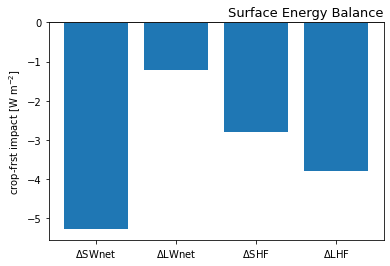

In [11]:
plot_SEB(float(dSWnet_crop_frst_cesm_avg),float(dLWnet_crop_frst_cesm_avg),float(dSHF_crop_frst_cesm_avg),float(dLHF_crop_frst_cesm_avg),'crop-frst')


-0.08456756772513674
[1.1268067630756846, 0.03808881643213321, -1.0860524561064164, 0.40775284308942333, 0.03258051748559576, 0.4346089162512836, -0.12030698442515309]


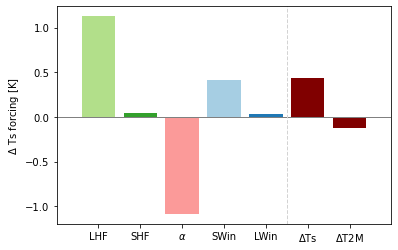

In [9]:
dT_1 = do_STDC(float(TSR_crop_frst_mpiesm_avg),float(dTSR_crop_frst_mpiesm_avg), float(SWin_crop_frst_mpiesm_avg),float(SWout_crop_frst_mpiesm_avg),float(SWin_ctl_crop_frst_mpiesm_avg),float(SWout_ctl_crop_frst_mpiesm_avg),float(dSWin_crop_frst_mpiesm_avg),float(dLWin_crop_frst_mpiesm_avg),float(dLHF_crop_frst_mpiesm_avg),float(dSHF_crop_frst_mpiesm_avg))
dT_1.append(float(dTSA_crop_frst_mpiesm_avg))
print(dT_1)
plot_STDC(dT_1)


[-0.11196002 -0.11759404 -0.05919096 -0.05368731  0.01022158 -0.03720755
 -0.08364431 -0.1340017  -0.11747721 -0.04553306 -0.03486982 -0.06510037]
-0.08456756772513674
[array([0.97843446, 1.12526307, 1.44266109, 1.59213446, 1.33597946,
       0.95974632, 0.72107654, 1.00549851, 1.22090194, 1.114908  ,
       1.02774629, 1.01076297]), array([-0.28371244,  0.11339363,  0.48259724,  0.37117463, -0.16373666,
        0.22263313,  0.59221498,  0.2346665 , -0.11229526, -0.18924877,
       -0.36465425, -0.47612428]), array([-0.9746497 , -1.61386058, -2.38507553, -2.22501635, -0.87198525,
       -0.72549558, -0.9907021 , -0.80357196, -0.59426433, -0.60880658,
       -0.6385572 , -0.71162493]), array([0.23406107, 0.47849072, 0.92233127, 1.12813255, 0.56359916,
       0.27202242, 0.26722982, 0.25966342, 0.22743751, 0.20595659,
       0.16329692, 0.15401934]), array([-0.02007408, -0.05199377, -0.13298206, -0.12360719,  0.11473416,
        0.17027262,  0.13792297,  0.13815606,  0.10884281,  0.03262

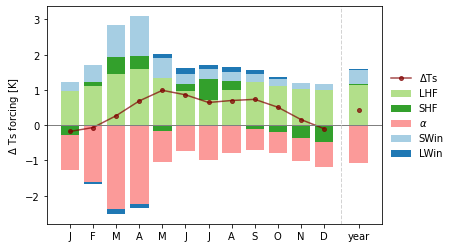

In [10]:
dT_month1 = do_STDC(TSR_crop_frst_mpiesm_seas,dTSR_crop_frst_mpiesm_seas, SWin_crop_frst_mpiesm_seas,SWout_crop_frst_mpiesm_seas,SWin_ctl_crop_frst_mpiesm_seas,SWout_ctl_crop_frst_mpiesm_seas,dSWin_crop_frst_mpiesm_seas,dLWin_crop_frst_mpiesm_seas,dLHF_crop_frst_mpiesm_seas,dSHF_crop_frst_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_crop_frst_mpiesm_avg),float(dTSR_crop_frst_mpiesm_avg), float(SWin_crop_frst_mpiesm_avg),float(SWout_crop_frst_mpiesm_avg),float(SWin_ctl_crop_frst_mpiesm_avg),float(SWout_ctl_crop_frst_mpiesm_avg),float(dSWin_crop_frst_mpiesm_avg),float(dLWin_crop_frst_mpiesm_avg),float(dLHF_crop_frst_mpiesm_avg),float(dSHF_crop_frst_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[[-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.08456756772513674
[ 1.50975104  1.53201982  0.70526688  1.30944151  0.88900586  1.45869961
  0.14047799 -0.23455233]


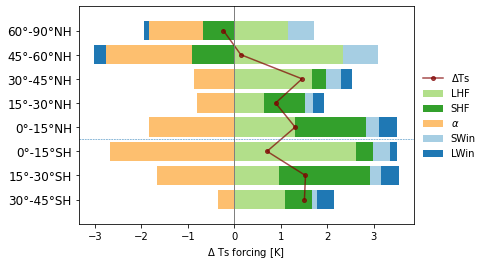

In [15]:
dT_lat = do_STDC(TSR_crop_frst_mpiesm_lat,dTSR_crop_frst_mpiesm_lat, SWin_crop_frst_mpiesm_lat,SWout_crop_frst_mpiesm_lat,SWin_ctl_crop_frst_mpiesm_lat,SWout_ctl_crop_frst_mpiesm_lat,dSWin_crop_frst_mpiesm_lat,dLWin_crop_frst_mpiesm_lat,dLHF_crop_frst_mpiesm_lat,dSHF_crop_frst_mpiesm_lat)
dT_year = do_STDC(float(TSR_crop_frst_mpiesm_avg),float(dTSR_crop_frst_mpiesm_avg), float(SWin_crop_frst_mpiesm_avg),float(SWout_crop_frst_mpiesm_avg),float(SWin_ctl_crop_frst_mpiesm_avg),float(SWout_ctl_crop_frst_mpiesm_avg),float(dSWin_crop_frst_mpiesm_avg),float(dLWin_crop_frst_mpiesm_avg),float(dLHF_crop_frst_mpiesm_avg),float(dSHF_crop_frst_mpiesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model)


[[ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.17106326058876742
[ 1.21788684  1.24188409  3.30043691  1.95398979  0.7128406  -0.20128684
 -0.76152225 -0.35660021]


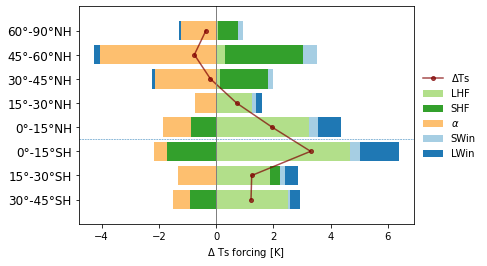

In [7]:

dT_lat = do_STDC(TSR_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat, SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,dSWin_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat)
dT_year = do_STDC(float(TSR_crop_frst_cesm_avg),float(dTSR_crop_frst_cesm_avg), float(SWin_crop_frst_cesm_avg),float(SWout_crop_frst_cesm_avg),float(SWin_ctl_crop_frst_cesm_avg),float(SWout_ctl_crop_frst_cesm_avg),float(dSWin_crop_frst_cesm_avg),float(dLWin_crop_frst_cesm_avg),float(dLHF_crop_frst_cesm_avg),float(dSHF_crop_frst_cesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='cesm')


[[-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
0.05008266388765335
0
1
2
3
4


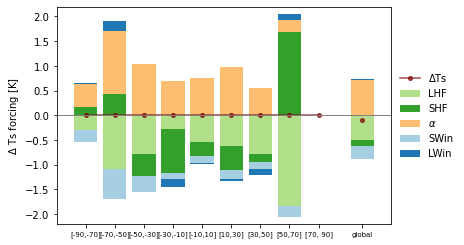

In [9]:
dT_lat = do_STDC(TSR_frst_ctl_mpiesm_lat,dTSR_frst_ctl_mpiesm_lat, SWin_frst_ctl_mpiesm_lat,SWout_frst_ctl_mpiesm_lat,SWin_ctl_frst_ctl_mpiesm_lat,SWout_ctl_frst_ctl_mpiesm_lat,dSWin_frst_ctl_mpiesm_lat,dLWin_frst_ctl_mpiesm_lat,dLHF_frst_ctl_mpiesm_lat,dSHF_frst_ctl_mpiesm_lat)
dT_year = do_STDC(float(TSR_frst_ctl_mpiesm_avg),float(dTSR_frst_ctl_mpiesm_avg), float(SWin_frst_ctl_mpiesm_avg),float(SWout_frst_ctl_mpiesm_avg),float(SWin_ctl_frst_ctl_mpiesm_avg),float(SWout_ctl_frst_ctl_mpiesm_avg),float(dSWin_frst_ctl_mpiesm_avg),float(dLWin_frst_ctl_mpiesm_avg),float(dLHF_frst_ctl_mpiesm_avg),float(dSHF_frst_ctl_mpiesm_avg))
plot_STDC_lats(dT_lat,dT_year,model='mpiesm',ylims=[-2.2,2.2])


[[ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
0.033625986547856965


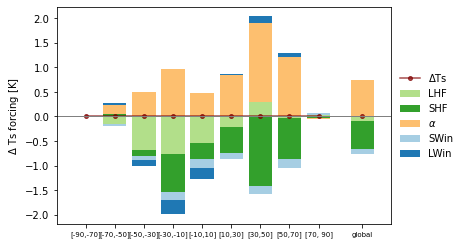

In [8]:
dT_lat = do_STDC(TSR_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat, SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,dSWin_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat)
dT_year = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_lats(dT_lat,dT_year,model='cesm')


In [ ]:
dT_lat = do_STDC(TSR_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat, SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,dSWin_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat)
dT_year = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='cesm',ylims=[-3.5,3.5],panel_label='g')


[[-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
0.04576607881815398


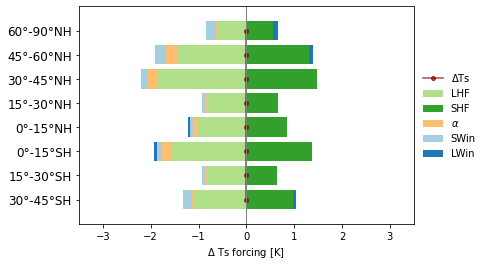

In [27]:
dT_lat = do_STDC(TSR_irr_crop_mpiesm_lat,dTSR_irr_crop_mpiesm_lat, SWin_irr_crop_mpiesm_lat,SWout_irr_crop_mpiesm_lat,SWin_ctl_irr_crop_mpiesm_lat,SWout_ctl_irr_crop_mpiesm_lat,dSWin_irr_crop_mpiesm_lat,dLWin_irr_crop_mpiesm_lat,dLHF_irr_crop_mpiesm_lat,dSHF_irr_crop_mpiesm_lat)
dT_year = do_STDC(float(TSR_irr_crop_mpiesm_avg),float(dTSR_irr_crop_mpiesm_avg), float(SWin_irr_crop_mpiesm_avg),float(SWout_irr_crop_mpiesm_avg),float(SWin_ctl_irr_crop_mpiesm_avg),float(SWout_ctl_irr_crop_mpiesm_avg),float(dSWin_irr_crop_mpiesm_avg),float(dLWin_irr_crop_mpiesm_avg),float(dLHF_irr_crop_mpiesm_avg),float(dSHF_irr_crop_mpiesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='mpiesm',ylims=[-3.5,3.5])


-0.0027420908306423843
[0.0006141498857393251, 0.002127940944903059, -0.0, 0.0, 0.0, 0.0, -0.0010474131802941371]


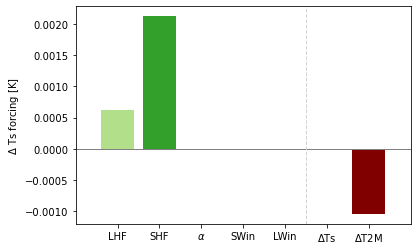

In [12]:
dT_1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
dT_1.append(float(dTSA_harv_frst_mpiesm_avg))
print(dT_1)
plot_STDC(dT_1)


[-1.45398133e-03 -3.80477766e-03 -1.02017140e-02 -1.12810028e-02
 -7.65063407e-03  3.61721167e-03  1.25999409e-03  5.15902787e-04
 -8.49146137e-04  7.68482223e-05  3.78534311e-04 -3.97757335e-03]
-0.0027420908306423843
[array([-0.00036193, -0.00233859,  0.00331636,  0.00582356,  0.00432181,
        0.00140953,  0.0027006 , -0.00194844,  0.0050196 , -0.00333172,
       -0.00348083, -0.00395936]), array([ 0.00181598,  0.0061435 ,  0.00688531,  0.00545735,  0.00332902,
       -0.00502654, -0.00396053,  0.00143234, -0.00417063,  0.00325498,
        0.00310266,  0.00793722]), array([-7.40118326e-08, -1.30482561e-07,  3.78979000e-08,  9.00399106e-08,
       -2.01898078e-07, -2.01858270e-07, -5.88632515e-08,  1.92335793e-07,
        1.75602619e-07, -1.13888481e-07, -3.56867007e-07, -2.83553415e-07]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


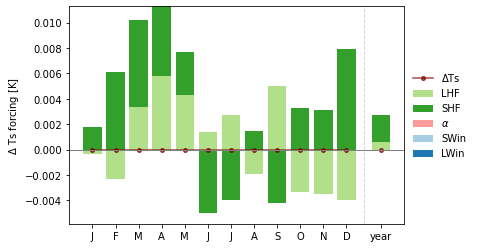

In [13]:
dT_month1 = do_STDC(TSR_harv_frst_mpiesm_seas,dTSR_harv_frst_mpiesm_seas, SWin_harv_frst_mpiesm_seas,SWout_harv_frst_mpiesm_seas,SWin_ctl_harv_frst_mpiesm_seas,SWout_ctl_harv_frst_mpiesm_seas,dSWin_harv_frst_mpiesm_seas,dLWin_harv_frst_mpiesm_seas,dLHF_harv_frst_mpiesm_seas,dSHF_harv_frst_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[[-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 [-3.72861068e-08  9.08383618e-07 -7.75272543e-07 ... -2.17207009e-07
  -5.49434460e-07 -4.56082725e-07]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.0027420908306423843


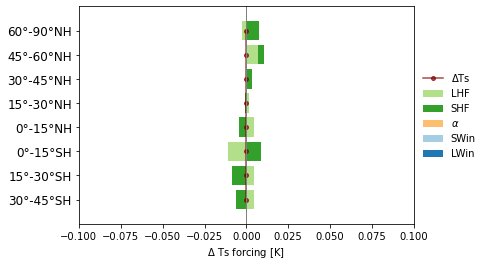

In [24]:
dT_lat = do_STDC(TSR_harv_frst_mpiesm_lat,dTSR_harv_frst_mpiesm_lat, SWin_harv_frst_mpiesm_lat,SWout_harv_frst_mpiesm_lat,SWin_ctl_harv_frst_mpiesm_lat,SWout_ctl_harv_frst_mpiesm_lat,dSWin_harv_frst_mpiesm_lat,dLWin_harv_frst_mpiesm_lat,dLHF_harv_frst_mpiesm_lat,dSHF_harv_frst_mpiesm_lat)
dT_year = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='mpiesm',ylims=[-0.1,0.1])


[[ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 [ 7.15987520e-08 -8.50270247e-07 -1.17660445e-06 ...             nan
              nan             nan]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
-0.0014159204008929202


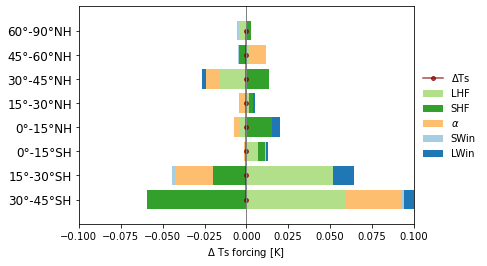

In [25]:
dT_lat = do_STDC(TSR_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat, SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,dSWin_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat)
dT_year = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
plot_STDC_lat_15(dT_lat,dT_year,model='cesm',ylims=[-0.1,0.1])


In [15]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='boreal')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='boreal')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='boreal')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='boreal')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='boreal')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='boreal')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='boreal')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='boreal')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='boreal')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='boreal')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='boreal')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='boreal')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='boreal')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='boreal')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='boreal')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'EFLX_LH_TOT_local' (time: 1, lat: 192, lon: 288)>
array([

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'EFLX_LH_TOT_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
      

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FLDS_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray ()>
array(0.07772038)
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0.

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray ()>
array(-0.0386322)
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0.

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'FSR_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

[ 0.02340853  0.00935694 -0.00625856  0.04755275  0.33215106  0.50465465
 -0.58183174 -0.15664989 -0.03276883 -0.04370409  0.08535627  0.04649568]
-0.017815115488240274
[array([ 0.06366092,  0.06111852,  0.12232979,  0.30795631,  0.61531888,
        0.89446556,  0.5152521 , -0.91346818, -0.51313685,  0.21761451,
        0.23196529,  0.1260978 ]), array([-0.21262376, -0.13283605,  0.25226183,  1.1758228 ,  2.17127492,
        1.98973482,  1.29741883,  1.47813833,  0.83742218,  0.05735833,
       -0.15535071, -0.16381046]), array([-0.07908639, -0.18184178, -0.86431929, -2.56006156, -4.65587552,
       -5.08948834, -2.03453064, -0.63684367, -0.45796297, -0.30592251,
       -0.25350387, -0.22706816]), array([0.01160899, 0.02688088, 0.13475558, 0.42306651, 0.84611629,
       1.24824074, 0.66137178, 0.06049352, 0.05090534, 0.09221042,
       0.06161922, 0.0369838 ]), array([-0.0161495 , -0.02238073, -0.05307533, -0.13759107, -0.26305245,
       -0.28886025, -0.08219095, -0.01465235, -0.02856

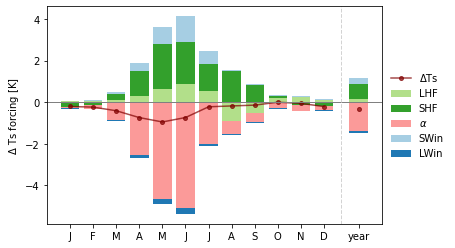

In [16]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.07635088  0.0575747   0.0346959  -0.00181558  0.03823156  0.32671904
 -0.16280124 -0.22639107 -0.13403212 -0.0413758   0.10453272  0.07916914]
0.006922887815479256
[array([-0.04272828, -0.04244653, -0.09288171, -0.22972034, -0.38084447,
       -0.26989796,  0.27796277,  0.63860317,  0.46429395,  0.21977982,
       -0.03155174, -0.06763195]), array([ 0.0676997 ,  0.06989568, -0.08507098, -0.63733211, -1.13333204,
       -0.72906293, -0.45367566, -0.83886364, -0.6647648 , -0.27748034,
        0.02931952,  0.05493103]), array([ 0.01883924,  0.06465477,  0.38193589,  1.31350974,  2.10235203,
        0.88174717,  0.37445499,  0.67836345,  0.63467299,  0.23522743,
       -0.09011759,  0.02366208]), array([-2.39597431e-03, -8.23555934e-03, -5.32529056e-02, -2.24739661e-01,
       -4.66567664e-01, -2.31564173e-01,  1.84817377e-02,  3.00789011e-02,
       -3.36246443e-02, -3.37298552e-04,  2.50102130e-02, -3.55980169e-03]), array([0.01097446, 0.01312934, 0.03144169, 0.07308594, 0.10187948,


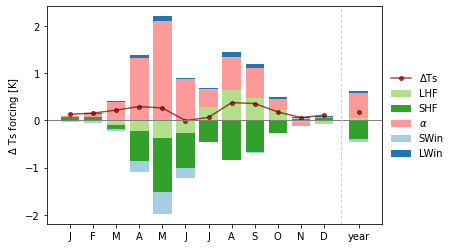

In [17]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


In [18]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='intermediate')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='intermediate')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='intermediate')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='intermediate')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='intermediate')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='intermediate')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='intermediate')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='intermediate')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='intermediate')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='intermediate')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='intermediate')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='intermediate')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='intermediate')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='intermediate')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='intermediate')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xar

<xarray.DataArray 'albedo_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         /
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan

<xarray.DataArray 'albedo_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         /
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan

<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, na

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xar

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.DataArray ()>
array(-0.0010175)
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
      

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xar

<xarray.DataArray 'EFLX_LH_TOT_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,

<xarray.DataArray 'albedo_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         /
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, n

[-0.00509692 -0.06333194 -0.02396724  0.18870872  0.02685497 -0.16807117
  0.02702714  0.20634785 -0.18868026 -0.21218025 -0.05050679  0.1010793 ]
-0.055464286290427656
[array([ 0.60414518,  0.51060872,  0.68437642,  1.16253033,  1.30557068,
       -0.97682348, -2.56071843, -2.11950162,  0.86617147,  1.87397297,
        1.45427871,  0.91640133]), array([-0.00425744,  0.52945128,  1.63149941,  3.11281962,  3.34506151,
        2.90935067,  2.93843565,  2.5881455 ,  0.57495161, -0.6188148 ,
       -0.83807345, -0.36516829]), array([-1.18728969, -1.81904792, -3.50906233, -6.01801609, -6.04253433,
       -2.52097131, -0.74549581, -0.91565175, -1.16689236, -0.81066595,
       -0.41301544, -0.92379679]), array([ 0.1372313 ,  0.20608373,  0.41848573,  0.76101039,  0.97485582,
        0.66294348,  0.06419896, -0.08759242,  0.11879498,  0.16102252,
        0.11798844,  0.14199839]), array([-0.09290298, -0.11442046, -0.18976345, -0.28924151, -0.24503989,
       -0.09739682, -0.1064087 , -0.110092

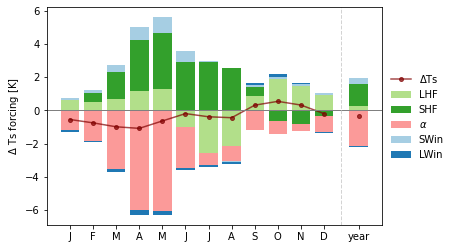

In [19]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[-0.01856789 -0.02537544 -0.02243032  0.02560512  0.30719174  0.04143939
 -0.23057926 -0.118328    0.05267104  0.0368036  -0.02455792 -0.0490965 ]
-0.006853160643275347
[array([-0.18369138, -0.178908  , -0.26851966, -0.46625412, -0.33173196,
        0.93597426,  1.80245665,  0.74777107, -0.3492484 , -0.58958276,
       -0.45041135, -0.21664095]), array([-0.13770017, -0.47617548, -1.39877097, -2.31346786, -2.14062118,
       -2.38502685, -2.67696267, -1.95656566, -1.23283879, -0.71215133,
       -0.31975713, -0.17898617]), array([0.65851884, 1.20506394, 2.58871793, 3.89730672, 2.85138851,
       1.84060925, 1.58297616, 1.68965956, 1.7446219 , 1.43207335,
       0.92596863, 0.64115274]), array([-0.05507134, -0.1226892 , -0.32827738, -0.6251503 , -0.50856093,
       -0.29761145, -0.15440537, -0.15689544, -0.21480389, -0.1786429 ,
       -0.09042647, -0.05176289]), array([0.0810497 , 0.1062871 , 0.18165489, 0.23383169, 0.12820123,
       0.1037127 , 0.1993644 , 0.14453779, 0.03253752, 0.02

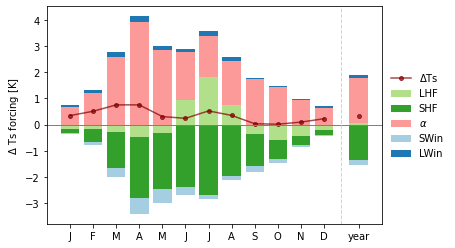

In [20]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[ 0.34396914  0.26656785  0.15075152  0.03838803 -0.05151221 -0.13992926
 -0.24338866 -0.35714209 -0.42470729 -0.25488749 -0.02452375  0.26486183]
-0.037967046181094366
[array([-0.05304064, -0.02812778, -0.02936404, -0.08619182, -0.36280326,
       -0.67928268, -1.35804316, -2.22487579, -2.22564299, -1.09837034,
       -0.31360259, -0.11477929]), array([-0.13711585, -0.08603371, -0.03140299,  0.10000128,  0.49127428,
        0.78016955,  1.35325266,  1.83646741,  1.46839949,  0.60766337,
        0.04855138, -0.13918927]), array([-0.05955744, -0.09819433, -0.06618706, -0.08942118, -0.23668259,
       -0.149152  ,  0.06444857,  0.50888166,  0.9592057 ,  0.66853843,
        0.33780879,  0.09098931]), array([ 0.0073891 ,  0.00855457,  0.01439257,  0.02327134,  0.05345111,
        0.06526894,  0.07180858,  0.01559364, -0.06118528, -0.03552425,
       -0.01772471,  0.00055022]), array([ 0.02789529,  0.01695171,  0.0104375 , -0.00503562, -0.03381092,
       -0.06632229, -0.08095611, -0.109020

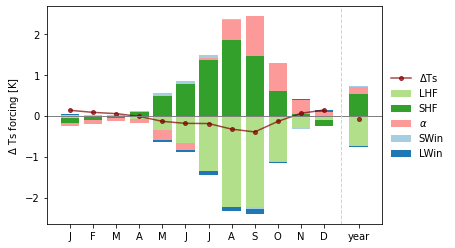

In [21]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [5]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='subtropics_NH')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='subtropics_NH')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='subtropics_NH')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='subtropics_NH')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='subtropics_NH')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='subtropics_NH')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='subtropics_NH')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='subtropics_NH')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='subtropics_NH')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='subtropics_NH')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='subtropics_NH')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='subtropics_NH')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='subtropics_NH')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='subtropics_NH')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='subtropics_NH')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FIRE_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FSR_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FSR_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

[-3.48651852e-05 -5.14348489e-02 -1.38369778e-01 -2.17007530e-01
 -9.16003148e-02  1.25632366e-01  1.11571686e-01 -1.68220750e-01
 -3.83681312e-01 -3.14759416e-01 -1.86994310e-01 -6.48634372e-02]
-0.11800037887285142
[array([ 0.9076494 ,  0.8466267 ,  0.99926445,  1.27731354, -0.16973559,
       -1.93357584, -0.80253616,  0.66985552,  1.91535289,  1.98414186,
        1.71140769,  1.13468431]), array([-0.24714305, -0.04557557, -0.01239644, -0.23322248,  0.65168499,
        1.78572472,  0.74922061,  0.04384743, -0.66816449, -0.85933142,
       -0.79424798, -0.4418612 ]), array([-0.42489793, -0.64095132, -0.74660729, -0.64000209, -0.27433087,
       -0.05517883, -0.09502333, -0.42204525, -0.51214421, -0.38649945,
       -0.24622985, -0.22312609]), array([5.72224849e-02, 7.30130582e-02, 1.14663738e-01, 1.46637973e-01,
       8.77736712e-02, 1.46780216e-03, 1.26980363e-04, 9.63288325e-02,
       1.99704401e-01, 1.84730242e-01, 1.18717294e-01, 6.94102312e-02]), array([ 0.09992742,  0.0690544

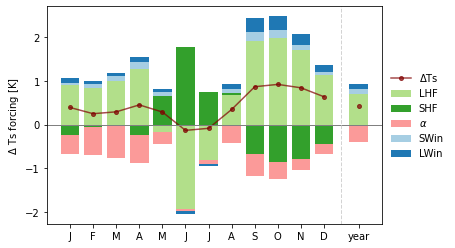

In [6]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[-0.00295243 -0.01520811 -0.02192371 -0.00027388 -0.09088024 -0.25710236
 -0.20759269 -0.05617404  0.0313944   0.01979189 -0.00848103 -0.00208566]
-0.05184772635167681
[array([-0.19426891, -0.10984227,  0.07838305,  0.35919854,  1.0518244 ,
        1.62399706,  0.75765361, -0.07437319, -0.43257438, -0.40707904,
       -0.36627014, -0.2586506 ]), array([-0.47505074, -0.62622742, -1.03698344, -1.46947717, -1.81668208,
       -1.94916602, -1.25176125, -0.78139504, -0.58108946, -0.5366415 ,
       -0.43608499, -0.50731443]), array([0.86013399, 0.99114407, 1.27080258, 1.44621533, 1.19350163,
       0.9727749 , 1.03897536, 1.12754729, 1.12929761, 1.05675836,
       0.93268376, 0.9028021 ]), array([-0.04183367, -0.06017827, -0.12099822, -0.21107789, -0.19051835,
       -0.08251636, -0.10803023, -0.15738894, -0.1700083 , -0.13636301,
       -0.08081992, -0.0584367 ]), array([0.05376408, 0.06363731, 0.07750402, 0.087392  , 0.12028207,
       0.17848505, 0.15465396, 0.07600449, 0.01170826, 0.023

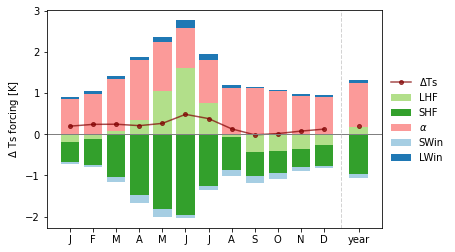

In [7]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[-0.0226575  -0.02355526 -0.04752085 -0.0460334  -0.03006645  0.20295577
  0.01574375 -0.287688   -0.25405134 -0.18677238 -0.13474436 -0.06062252]
-0.0670690426011736
[array([-0.09461383, -0.15061751, -0.2143575 , -0.54161921, -1.98130803,
       -3.99947492, -4.43991408, -2.9323267 , -1.7052983 , -0.92211955,
       -0.44647117, -0.16114677]), array([0.01359923, 0.06608096, 0.13331627, 0.35824496, 1.30321653,
       2.85330616, 3.38987048, 2.14708433, 1.14001431, 0.56346785,
       0.23220267, 0.05334942]), array([0.12855734, 0.11314768, 0.11397295, 0.16356686, 0.46360328,
       0.43657558, 0.54548805, 0.76972962, 0.6210095 , 0.43530852,
       0.31068929, 0.18361028]), array([-0.00307761, -0.0027457 , -0.00484371, -0.00963946, -0.03271547,
       -0.06921045, -0.09458558, -0.07551302, -0.04421081, -0.03547939,
       -0.01723062, -0.00428252]), array([ 0.00793082,  0.00057014, -0.00499979, -0.02847545, -0.14192902,
       -0.33089135, -0.3162203 , -0.19701818, -0.11273937, -0.038798

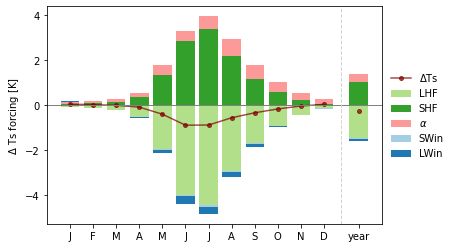

In [8]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [9]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='tropical')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='tropical')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='tropical')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='tropical')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='tropical')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='tropical')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='tropical')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='tropical')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='tropical')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='tropical')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='tropical')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='tropical')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='tropical')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='tropical')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='tropical')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'albedo_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         /
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
   

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'TSA_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FLDS_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
 

[-0.39927743 -0.47970869 -0.74995173 -0.96751015 -0.71307059 -0.67548918
 -0.65305352 -0.70206891 -0.78635301 -0.86442727 -0.62781645 -0.3268366 ]
-0.6717384582744939
[array([1.61547419, 1.65161091, 2.26233655, 3.60492776, 2.5503622 ,
       3.35275072, 4.12009746, 4.91858747, 5.06060023, 4.74231956,
       2.45528934, 0.51572061]), array([-0.72857269, -0.69338399, -0.84003721, -1.72501755, -1.16582019,
       -1.8254834 , -2.44068883, -2.97387913, -2.91391481, -2.54380483,
       -1.07338565,  0.15653951]), array([ 0.11704617,  0.1078056 , -0.0296563 , -0.06609362,  0.11191653,
        0.02612123, -0.07417208, -0.21057375, -0.31654081, -0.35928494,
        0.0090982 ,  0.1844199 ]), array([0.06949365, 0.10037306, 0.15525279, 0.21282482, 0.17686611,
       0.17330667, 0.19305826, 0.2235888 , 0.26279716, 0.28068367,
       0.18526104, 0.08204176]), array([0.53764977, 0.59072836, 0.72717381, 0.92176077, 0.79814731,
       0.80487548, 0.84020967, 0.91253288, 0.97897529, 1.0303179 ,
      

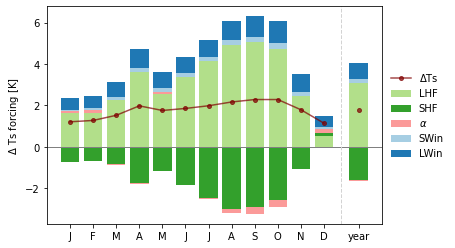

In [10]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[0.17192268 0.1456583  0.19447369 0.28194798 0.24173376 0.16338086
 0.07526008 0.08081044 0.14194831 0.21312107 0.26056503 0.20733856]
0.17996173986163788
[array([-0.65100121, -0.50940651, -0.36289775, -0.62202378, -0.64089924,
       -0.83391113, -0.86701248, -0.85748567, -0.74219981, -0.67764992,
       -0.62523682, -0.49905697]), array([-0.48086834, -0.54040606, -0.79884653, -0.73278225, -0.60052366,
       -0.28350936, -0.07369675, -0.06265465, -0.31950857, -0.59824978,
       -0.72878264, -0.71957221]), array([0.81164785, 0.80337392, 0.89737252, 0.98970166, 0.9175186 ,
       0.8530844 , 0.7811881 , 0.75943559, 0.82432053, 0.95413841,
       0.94985265, 0.85700643]), array([-0.13004485, -0.13165576, -0.16481497, -0.22527827, -0.24558952,
       -0.23570552, -0.21679927, -0.21335774, -0.22576888, -0.24054198,
       -0.22328498, -0.16398327]), array([-0.15856218, -0.14856574, -0.17295799, -0.23456135, -0.22292701,
       -0.18109702, -0.12476141, -0.12117739, -0.15226704, -0.195517

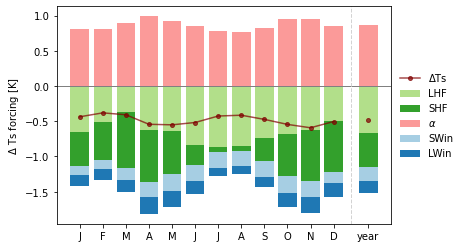

In [11]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[ 0.14894701  0.0024954   0.12077834  0.1786157   0.13196776 -0.03648792
 -0.12207739 -0.13855201 -0.14057515 -0.1340045  -0.11159278  0.18958337]
-0.0033590911090982667
[array([-2.39395405, -1.88474609, -2.55463207, -3.65956374, -5.02120479,
       -3.6682133 , -1.82556093, -0.65361878, -0.34479635, -0.58228355,
       -2.20646678, -3.17403221]), array([1.74520188, 1.30932139, 1.77810979, 2.52590374, 3.35244087,
       2.4390323 , 1.29046642, 0.52044737, 0.26799491, 0.40019528,
       1.44922769, 2.28147323]), array([0.19220986, 0.34681819, 0.34402127, 0.52963782, 0.96230975,
       0.82397279, 0.45150169, 0.20514057, 0.18817389, 0.26798238,
       0.64015088, 0.316605  ]), array([-0.02302444, -0.02296297, -0.02273868, -0.03022481, -0.06004312,
       -0.05832183, -0.03887751, -0.01816886, -0.01473965, -0.01956144,
       -0.01707023, -0.02028803]), array([-0.25065506, -0.19434921, -0.24608539, -0.34512236, -0.49975803,
       -0.41800464, -0.2174075 , -0.07268102, -0.03424805, -0.041

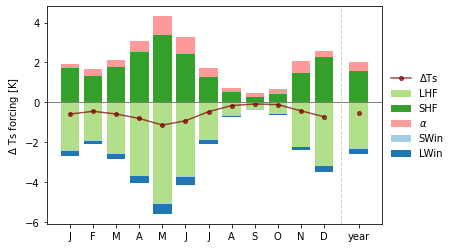

In [12]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [13]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='subtropics_SH')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='subtropics_SH')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='subtropics_SH')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='subtropics_SH')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='subtropics_SH')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='subtropics_SH')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='subtropics_SH')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='subtropics_SH')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='subtropics_SH')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='subtropics_SH')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='subtropics_SH')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='subtropics_SH')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='subtropics_SH')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='subtropics_SH')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='subtropics_SH')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'albedo_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LC

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray ()>
array(-0.0024175)
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0.

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'albedo_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         /
    cell_methods:  time: mean
    longname:      Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
   

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

[ 0.19086399 -0.32611015 -0.50660912 -0.49452229 -0.27272877 -0.04625796
  0.02363345 -0.03470739 -0.15019464 -0.27199048  0.02472481  0.45810772]
-0.11865890014661645
[array([-1.57787767,  2.02885606,  3.28362305,  3.62108661,  3.06142922,
        2.20400025,  1.78588422,  1.85415761,  2.28626623,  2.70068169,
       -0.54026076, -4.56627311]), array([ 1.3665919 , -0.75103466, -1.50542397, -1.88730163, -1.72961684,
       -1.36885402, -1.19295589, -1.1934742 , -1.34304025, -1.46612096,
        0.70201879,  3.63757901]), array([-0.15707727, -0.68942581, -0.8333387 , -0.76640634, -0.58524461,
       -0.39386858, -0.30658747, -0.3254418 , -0.42382122, -0.51780932,
       -0.0526365 ,  0.07799618]), array([-0.11287219,  0.04325892,  0.11221755,  0.1554015 ,  0.1289585 ,
        0.08023891,  0.0627918 ,  0.07157288,  0.09228007,  0.10884449,
       -0.02474996, -0.19048065]), array([-0.11398286,  0.23763633,  0.40801583,  0.45339115,  0.36865494,
        0.23827181,  0.15868668,  0.1405233

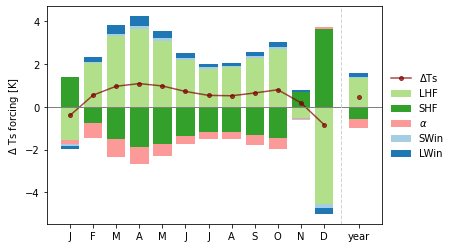

In [14]:
dT_month1 = do_STDC(TSR_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas, SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,dSWin_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_crop_ctl_cesm_avg),float(dTSR_crop_ctl_cesm_avg), float(SWin_crop_ctl_cesm_avg),float(SWout_crop_ctl_cesm_avg),float(SWin_ctl_crop_ctl_cesm_avg),float(SWout_ctl_crop_ctl_cesm_avg),float(dSWin_crop_ctl_cesm_avg),float(dLWin_crop_ctl_cesm_avg),float(dLHF_crop_ctl_cesm_avg),float(dSHF_crop_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[ 0.46172848  0.56304741  0.52215654  0.39163989  0.18831485  0.00263976
 -0.06841053 -0.01832773  0.1064647   0.30020066  0.46360024  0.41273112]
0.26719269996374095
[array([ 0.59527737, -0.22770116, -0.59159425, -0.78877242, -1.07220887,
       -1.17957171, -1.12750397, -1.0695039 , -0.96760345, -0.81130077,
       -0.41964925,  0.74124727]), array([-2.29763924, -1.73430522, -1.26277881, -0.80622407, -0.18035576,
        0.24631449,  0.39254453,  0.26273417, -0.16797889, -0.78319388,
       -1.42044207, -2.41025566]), array([0.90352172, 1.00988328, 0.98372869, 0.91489115, 0.78336352,
       0.68153973, 0.61416494, 0.64049655, 0.78712967, 0.96540793,
       0.9769371 , 0.92684545]), array([-0.09288804, -0.13205336, -0.16491446, -0.19451977, -0.17949887,
       -0.12672592, -0.11420659, -0.12039094, -0.12959934, -0.15090367,
       -0.15654039, -0.08954639]), array([-0.35644053, -0.43823547, -0.43919438, -0.380093  , -0.26822492,
       -0.16182585, -0.08911185, -0.09597756, -0.1563156

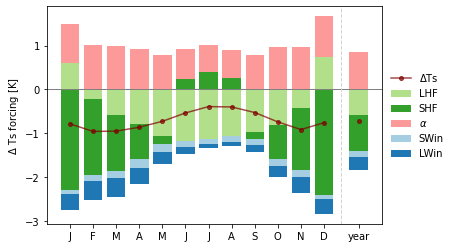

In [15]:
dT_month1 = do_STDC(TSR_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas, SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,dSWin_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas)
dT_year1 = do_STDC(float(TSR_frst_ctl_cesm_avg),float(dTSR_frst_ctl_cesm_avg), float(SWin_frst_ctl_cesm_avg),float(SWout_frst_ctl_cesm_avg),float(SWin_ctl_frst_ctl_cesm_avg),float(SWout_ctl_frst_ctl_cesm_avg),float(dSWin_frst_ctl_cesm_avg),float(dLWin_frst_ctl_cesm_avg),float(dLHF_frst_ctl_cesm_avg),float(dSHF_frst_ctl_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[ 0.31725261 -0.17311487 -0.24977078 -0.25251305 -0.21122812 -0.12566364
 -0.09746995 -0.0991637  -0.13493363 -0.19392187 -0.34350232  0.25824497]
-0.13155101636973088
[array([-7.83015495, -5.6868161 , -3.4470391 , -1.54317547, -0.63517922,
       -0.29686751, -0.14084943, -0.08925221, -0.12372973, -0.38356453,
       -2.3822315 , -5.86380359]), array([5.9558654 , 4.1897044 , 2.42366951, 1.05007017, 0.35519669,
       0.12767236, 0.0424763 , 0.01973798, 0.04299399, 0.21686229,
       1.49187516, 4.25144217]), array([0.72049708, 1.1477127 , 0.96556183, 0.62480655, 0.45233154,
       0.28844827, 0.20710323, 0.18247217, 0.22885773, 0.35571373,
       1.01637677, 0.64763662]), array([-0.10902909, -0.1168039 , -0.08435017, -0.06173085, -0.02543501,
       -0.00199853, -0.00404144, -0.00504627, -0.01154594, -0.01793373,
       -0.03652408, -0.0421395 ]), array([-0.55797575, -0.38807097, -0.24848488, -0.09330891, -0.01960031,
       -0.00394682,  0.00561855,  0.00699121,  0.00670473, -0.00519

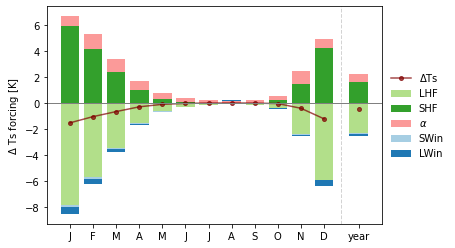

In [16]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

In [17]:
##read in data

#dSWin_total,dSWout_total,dSWnet_total,dLWin_total,dLWout_total,dLWnet_total,dSHF_total,dLHF_total,
#   0           1            2             3            4            5           6          7      
#dTS_total,dTSA_total,dTSR_total,dalbedo_total,SWin,SWout,TSR,LWout,SWin_ctl,SWout_ctl,TSR_ctl,LWout_ctl
# 10          11        12         13           14  15   16   17    18        19      20        21

dSWin_crop_ctl_cesm_lat,dSWout_crop_ctl_cesm_lat,dSWnet_crop_ctl_cesm_lat,dLWin_crop_ctl_cesm_lat,dLWout_crop_ctl_cesm_lat,dLWnet_crop_ctl_cesm_lat,dSHF_crop_ctl_cesm_lat,dLHF_crop_ctl_cesm_lat,dTS_crop_ctl_cesm_lat,dTSA_crop_ctl_cesm_lat,dTSR_crop_ctl_cesm_lat,dalbedo_crop_ctl_cesm_lat,SWin_crop_ctl_cesm_lat,SWout_crop_ctl_cesm_lat,TSR_crop_ctl_cesm_lat,LWout_crop_ctl_cesm_lat,SWin_ctl_crop_ctl_cesm_lat,SWout_ctl_crop_ctl_cesm_lat,TSR_ctl_crop_ctl_cesm_lat,LWout_ctl_crop_ctl_cesm_lat=read_ebal_data('crop-ctl','lat','cesm',mask='boreal')
dSWin_frst_ctl_cesm_lat,dSWout_frst_ctl_cesm_lat,dSWnet_frst_ctl_cesm_lat,dLWin_frst_ctl_cesm_lat,dLWout_frst_ctl_cesm_lat,dLWnet_frst_ctl_cesm_lat,dSHF_frst_ctl_cesm_lat,dLHF_frst_ctl_cesm_lat,dTS_frst_ctl_cesm_lat,dTSA_frst_ctl_cesm_lat,dTSR_frst_ctl_cesm_lat,dalbedo_frst_ctl_cesm_lat,SWin_frst_ctl_cesm_lat,SWout_frst_ctl_cesm_lat,TSR_frst_ctl_cesm_lat,LWout_frst_ctl_cesm_lat,SWin_ctl_frst_ctl_cesm_lat,SWout_ctl_frst_ctl_cesm_lat,TSR_ctl_frst_ctl_cesm_lat,LWout_ctl_frst_ctl_cesm_lat=read_ebal_data('frst-ctl','lat','cesm',mask='boreal')
dSWin_irr_crop_cesm_lat,dSWout_irr_crop_cesm_lat,dSWnet_irr_crop_cesm_lat,dLWin_irr_crop_cesm_lat,dLWout_irr_crop_cesm_lat,dLWnet_irr_crop_cesm_lat,dSHF_irr_crop_cesm_lat,dLHF_irr_crop_cesm_lat,dTS_irr_crop_cesm_lat,dTSA_irr_crop_cesm_lat,dTSR_irr_crop_cesm_lat,dalbedo_irr_crop_cesm_lat,SWin_irr_crop_cesm_lat,SWout_irr_crop_cesm_lat,TSR_irr_crop_cesm_lat,LWout_irr_crop_cesm_lat,SWin_ctl_irr_crop_cesm_lat,SWout_ctl_irr_crop_cesm_lat,TSR_ctl_irr_crop_cesm_lat,LWout_ctl_irr_crop_cesm_lat=read_ebal_data('irr-crop','lat','cesm',mask='boreal')
dSWin_harv_frst_cesm_lat,dSWout_harv_frst_cesm_lat,dSWnet_harv_frst_cesm_lat,dLWin_harv_frst_cesm_lat,dLWout_harv_frst_cesm_lat,dLWnet_harv_frst_cesm_lat,dSHF_harv_frst_cesm_lat,dLHF_harv_frst_cesm_lat,dTS_harv_frst_cesm_lat,dTSA_harv_frst_cesm_lat,dTSR_harv_frst_cesm_lat,dalbedo_harv_frst_cesm_lat,SWin_harv_frst_cesm_lat,SWout_harv_frst_cesm_lat,TSR_harv_frst_cesm_lat,LWout_harv_frst_cesm_lat,SWin_ctl_harv_frst_cesm_lat,SWout_ctl_harv_frst_cesm_lat,TSR_ctl_harv_frst_cesm_lat,LWout_ctl_harv_frst_cesm_lat=read_ebal_data('harv-frst','lat','cesm',mask='boreal')
dSWin_crop_frst_cesm_lat,dSWout_crop_frst_cesm_lat,dSWnet_crop_frst_cesm_lat,dLWin_crop_frst_cesm_lat,dLWout_crop_frst_cesm_lat,dLWnet_crop_frst_cesm_lat,dSHF_crop_frst_cesm_lat,dLHF_crop_frst_cesm_lat,dTS_crop_frst_cesm_lat,dTSA_crop_frst_cesm_lat,dTSR_crop_frst_cesm_lat,dalbedo_crop_frst_cesm_lat,SWin_crop_frst_cesm_lat,SWout_crop_frst_cesm_lat,TSR_crop_frst_cesm_lat,LWout_crop_frst_cesm_lat,SWin_ctl_crop_frst_cesm_lat,SWout_ctl_crop_frst_cesm_lat,TSR_ctl_crop_frst_cesm_lat,LWout_ctl_crop_frst_cesm_lat=read_ebal_data('crop-frst','lat','cesm',mask='boreal')

dSWin_crop_ctl_cesm_seas,dSWout_crop_ctl_cesm_seas,dSWnet_crop_ctl_cesm_seas,dLWin_crop_ctl_cesm_seas,dLWout_crop_ctl_cesm_seas,dLWnet_crop_ctl_cesm_seas,dSHF_crop_ctl_cesm_seas,dLHF_crop_ctl_cesm_seas,dTS_crop_ctl_cesm_seas,dTSA_crop_ctl_cesm_seas,dTSR_crop_ctl_cesm_seas,dalbedo_crop_ctl_cesm_seas,SWin_crop_ctl_cesm_seas,SWout_crop_ctl_cesm_seas,TSR_crop_ctl_cesm_seas,LWout_crop_ctl_cesm_seas,SWin_ctl_crop_ctl_cesm_seas,SWout_ctl_crop_ctl_cesm_seas,TSR_ctl_crop_ctl_cesm_seas,LWout_ctl_crop_ctl_cesm_seas=read_ebal_data('crop-ctl','seas','cesm',mask='boreal')
dSWin_frst_ctl_cesm_seas,dSWout_frst_ctl_cesm_seas,dSWnet_frst_ctl_cesm_seas,dLWin_frst_ctl_cesm_seas,dLWout_frst_ctl_cesm_seas,dLWnet_frst_ctl_cesm_seas,dSHF_frst_ctl_cesm_seas,dLHF_frst_ctl_cesm_seas,dTS_frst_ctl_cesm_seas,dTSA_frst_ctl_cesm_seas,dTSR_frst_ctl_cesm_seas,dalbedo_frst_ctl_cesm_seas,SWin_frst_ctl_cesm_seas,SWout_frst_ctl_cesm_seas,TSR_frst_ctl_cesm_seas,LWout_frst_ctl_cesm_seas,SWin_ctl_frst_ctl_cesm_seas,SWout_ctl_frst_ctl_cesm_seas,TSR_ctl_frst_ctl_cesm_seas,LWout_ctl_frst_ctl_cesm_seas=read_ebal_data('frst-ctl','seas','cesm',mask='boreal')
dSWin_irr_crop_cesm_seas,dSWout_irr_crop_cesm_seas,dSWnet_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLWout_irr_crop_cesm_seas,dLWnet_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dTS_irr_crop_cesm_seas,dTSA_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas,dalbedo_irr_crop_cesm_seas,SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,TSR_irr_crop_cesm_seas,LWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,TSR_ctl_irr_crop_cesm_seas,LWout_ctl_irr_crop_cesm_seas=read_ebal_data('irr-crop','seas','cesm',mask='boreal')
dSWin_harv_frst_cesm_seas,dSWout_harv_frst_cesm_seas,dSWnet_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLWout_harv_frst_cesm_seas,dLWnet_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dTS_harv_frst_cesm_seas,dTSA_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas,dalbedo_harv_frst_cesm_seas,SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,TSR_harv_frst_cesm_seas,LWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,TSR_ctl_harv_frst_cesm_seas,LWout_ctl_harv_frst_cesm_seas=read_ebal_data('harv-frst','seas','cesm',mask='boreal')
dSWin_crop_frst_cesm_seas,dSWout_crop_frst_cesm_seas,dSWnet_crop_frst_cesm_seas,dLWin_crop_frst_cesm_seas,dLWout_crop_frst_cesm_seas,dLWnet_crop_frst_cesm_seas,dSHF_crop_frst_cesm_seas,dLHF_crop_frst_cesm_seas,dTS_crop_frst_cesm_seas,dTSA_crop_frst_cesm_seas,dTSR_crop_frst_cesm_seas,dalbedo_crop_frst_cesm_seas,SWin_crop_frst_cesm_seas,SWout_crop_frst_cesm_seas,TSR_crop_frst_cesm_seas,LWout_crop_frst_cesm_seas,SWin_ctl_crop_frst_cesm_seas,SWout_ctl_crop_frst_cesm_seas,TSR_ctl_crop_frst_cesm_seas,LWout_ctl_crop_frst_cesm_seas=read_ebal_data('crop-frst','seas','cesm',mask='boreal')

dSWin_crop_ctl_cesm_avg,dSWout_crop_ctl_cesm_avg,dSWnet_crop_ctl_cesm_avg,dLWin_crop_ctl_cesm_avg,dLWout_crop_ctl_cesm_avg,dLWnet_crop_ctl_cesm_avg,dSHF_crop_ctl_cesm_avg,dLHF_crop_ctl_cesm_avg,dTS_crop_ctl_cesm_avg,dTSA_crop_ctl_cesm_avg,dTSR_crop_ctl_cesm_avg,dalbedo_crop_ctl_cesm_avg,SWin_crop_ctl_cesm_avg,SWout_crop_ctl_cesm_avg,TSR_crop_ctl_cesm_avg,LWout_crop_ctl_cesm_avg,SWin_ctl_crop_ctl_cesm_avg,SWout_ctl_crop_ctl_cesm_avg,TSR_ctl_crop_ctl_cesm_avg,LWout_ctl_crop_ctl_cesm_avg=read_ebal_data('crop-ctl','avg','cesm',mask='boreal')
dSWin_frst_ctl_cesm_avg,dSWout_frst_ctl_cesm_avg,dSWnet_frst_ctl_cesm_avg,dLWin_frst_ctl_cesm_avg,dLWout_frst_ctl_cesm_avg,dLWnet_frst_ctl_cesm_avg,dSHF_frst_ctl_cesm_avg,dLHF_frst_ctl_cesm_avg,dTS_frst_ctl_cesm_avg,dTSA_frst_ctl_cesm_avg,dTSR_frst_ctl_cesm_avg,dalbedo_frst_ctl_cesm_avg,SWin_frst_ctl_cesm_avg,SWout_frst_ctl_cesm_avg,TSR_frst_ctl_cesm_avg,LWout_frst_ctl_cesm_avg,SWin_ctl_frst_ctl_cesm_avg,SWout_ctl_frst_ctl_cesm_avg,TSR_ctl_frst_ctl_cesm_avg,LWout_ctl_frst_ctl_cesm_avg=read_ebal_data('frst-ctl','avg','cesm',mask='boreal')
dSWin_irr_crop_cesm_avg,dSWout_irr_crop_cesm_avg,dSWnet_irr_crop_cesm_avg,dLWin_irr_crop_cesm_avg,dLWout_irr_crop_cesm_avg,dLWnet_irr_crop_cesm_avg,dSHF_irr_crop_cesm_avg,dLHF_irr_crop_cesm_avg,dTS_irr_crop_cesm_avg,dTSA_irr_crop_cesm_avg,dTSR_irr_crop_cesm_avg,dalbedo_irr_crop_cesm_avg,SWin_irr_crop_cesm_avg,SWout_irr_crop_cesm_avg,TSR_irr_crop_cesm_avg,LWout_irr_crop_cesm_avg,SWin_ctl_irr_crop_cesm_avg,SWout_ctl_irr_crop_cesm_avg,TSR_ctl_irr_crop_cesm_avg,LWout_ctl_irr_crop_cesm_avg=read_ebal_data('irr-crop','avg','cesm',mask='boreal')
dSWin_harv_frst_cesm_avg,dSWout_harv_frst_cesm_avg,dSWnet_harv_frst_cesm_avg,dLWin_harv_frst_cesm_avg,dLWout_harv_frst_cesm_avg,dLWnet_harv_frst_cesm_avg,dSHF_harv_frst_cesm_avg,dLHF_harv_frst_cesm_avg,dTS_harv_frst_cesm_avg,dTSA_harv_frst_cesm_avg,dTSR_harv_frst_cesm_avg,dalbedo_harv_frst_cesm_avg,SWin_harv_frst_cesm_avg,SWout_harv_frst_cesm_avg,TSR_harv_frst_cesm_avg,LWout_harv_frst_cesm_avg,SWin_ctl_harv_frst_cesm_avg,SWout_ctl_harv_frst_cesm_avg,TSR_ctl_harv_frst_cesm_avg,LWout_ctl_harv_frst_cesm_avg=read_ebal_data('harv-frst','avg','cesm',mask='boreal')
dSWin_crop_frst_cesm_avg,dSWout_crop_frst_cesm_avg,dSWnet_crop_frst_cesm_avg,dLWin_crop_frst_cesm_avg,dLWout_crop_frst_cesm_avg,dLWnet_crop_frst_cesm_avg,dSHF_crop_frst_cesm_avg,dLHF_crop_frst_cesm_avg,dTS_crop_frst_cesm_avg,dTSA_crop_frst_cesm_avg,dTSR_crop_frst_cesm_avg,dalbedo_crop_frst_cesm_avg,SWin_crop_frst_cesm_avg,SWout_crop_frst_cesm_avg,TSR_crop_frst_cesm_avg,LWout_crop_frst_cesm_avg,SWin_ctl_crop_frst_cesm_avg,SWout_ctl_crop_frst_cesm_avg,TSR_ctl_crop_frst_cesm_avg,LWout_ctl_crop_frst_cesm_avg=read_ebal_data('crop-frst','avg','cesm',mask='boreal')


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 0040-06-16 00:00:00
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    units:         W/m^2
    cell_methods:  time: mean
    longname:      Local effect of LC

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
  

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray ()>
array(-0.04294048)
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 

<xarray.DataArray 'FSH_local' (time: 1, lat: 192, lon: 288)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 0040-06-16 00:00:00
Attributes:
    units:     W/m^2
    longname:  Local effect of LCLM change
<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    latmask  (lat, lon) float64 ...
<xarray.DataArray 'latmask' (lat: 192, lon: 288)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
  

[ 0.00250878  0.01509917  0.01824688 -0.00063021 -0.0218447  -0.10549511
  0.20781664  0.00513964 -0.00071991  0.02056802 -0.05788257 -0.01920306]
0.004702313961539252
[array([-0.00127923, -0.00068444, -0.00651034, -0.0042928 , -0.00954565,
       -0.03337951,  0.00423492,  0.07344816, -0.0213947 , -0.05834576,
       -0.01603827, -0.00019349]), array([ 4.87947510e-03, -4.50078780e-03, -9.13047423e-03, -2.18605473e-02,
       -5.80981280e-02, -4.06392560e-02, -2.38702897e-03, -3.20756147e-02,
        2.17904203e-02,  3.94634041e-02,  3.36449354e-03, -1.88214765e-05]), array([ 2.88179071e-03,  3.19932121e-03,  1.08342816e-02,  4.13046372e-02,
        9.35244436e-02,  1.95726206e-01, -2.77250000e-01, -6.25780341e-02,
       -4.39949598e-05, -1.01403344e-02,  7.75837202e-02,  2.88266894e-02]), array([-0.0001426 , -0.00027441, -0.00167344, -0.00046423,  0.01634402,
       -0.00224084,  0.06432223,  0.02088336, -0.00931986, -0.00691892,
       -0.01047127, -0.00174228]), array([ 0.00121784,

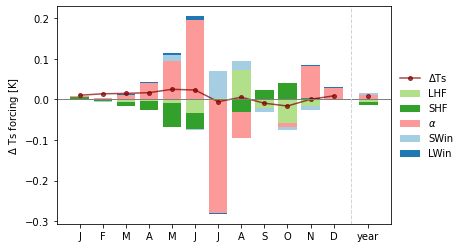

In [18]:
dT_month1 = do_STDC(TSR_irr_crop_cesm_seas,dTSR_irr_crop_cesm_seas, SWin_irr_crop_cesm_seas,SWout_irr_crop_cesm_seas,SWin_ctl_irr_crop_cesm_seas,SWout_ctl_irr_crop_cesm_seas,dSWin_irr_crop_cesm_seas,dLWin_irr_crop_cesm_seas,dLHF_irr_crop_cesm_seas,dSHF_irr_crop_cesm_seas)
dT_year1 = do_STDC(float(TSR_irr_crop_cesm_avg),float(dTSR_irr_crop_cesm_avg), float(SWin_irr_crop_cesm_avg),float(SWout_irr_crop_cesm_avg),float(SWin_ctl_irr_crop_cesm_avg),float(SWout_ctl_irr_crop_cesm_avg),float(dSWin_irr_crop_cesm_avg),float(dLWin_irr_crop_cesm_avg),float(dLHF_irr_crop_cesm_avg),float(dSHF_irr_crop_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)

[-0.00491623 -0.0020075  -0.00086423  0.00373042 -0.00970372 -0.01738598
  0.00379174  0.00919698  0.00450981  0.00113754 -0.00201519 -0.0041436 ]
-0.0014159204008929202
[array([ 0.00499898,  0.00884737,  0.01137574,  0.00126027,  0.00281033,
        0.001992  , -0.0065829 , -0.00416302,  0.00204872,  0.00178618,
        0.00074565,  0.00344459]), array([-0.00120205, -0.0042899 , -0.00546413,  0.00562626, -0.00022109,
       -0.00807904,  0.00196299,  0.0050497 ,  0.00356971,  0.00142465,
        0.00292811, -0.00193194]), array([ 0.00316107, -0.0016528 , -0.00433653, -0.01248598,  0.01184575,
        0.03419503,  0.0017718 , -0.0119862 , -0.01006473, -0.00465863,
       -0.00034125,  0.0041695 ]), array([-0.00031618, -0.00027108,  0.00032996,  0.00071008, -0.00362031,
       -0.00632916, -0.00109064,  0.00181815, -0.00027131,  0.00097395,
       -0.00010453,  0.00056215]), array([ 0.00278785,  0.00227757,  0.00112826,  0.00063348,  0.00165545,
        0.00287707, -0.00026747, -0.00080

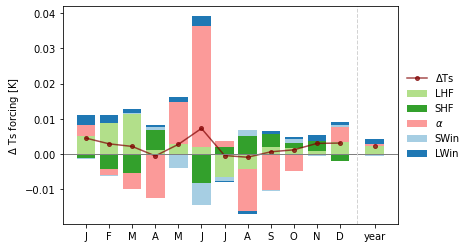

In [7]:
dT_month1 = do_STDC(TSR_harv_frst_cesm_seas,dTSR_harv_frst_cesm_seas, SWin_harv_frst_cesm_seas,SWout_harv_frst_cesm_seas,SWin_ctl_harv_frst_cesm_seas,SWout_ctl_harv_frst_cesm_seas,dSWin_harv_frst_cesm_seas,dLWin_harv_frst_cesm_seas,dLHF_harv_frst_cesm_seas,dSHF_harv_frst_cesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


[-1.45398133e-03 -3.80477766e-03 -1.02017140e-02 -1.12810028e-02
 -7.65063407e-03  3.61721167e-03  1.25999409e-03  5.15902787e-04
 -8.49146137e-04  7.68482223e-05  3.78534311e-04 -3.97757335e-03]
-0.0027420908306423843
[array([-0.00036193, -0.00233859,  0.00331636,  0.00582356,  0.00432181,
        0.00140953,  0.0027006 , -0.00194844,  0.0050196 , -0.00333172,
       -0.00348083, -0.00395936]), array([ 0.00181598,  0.0061435 ,  0.00688531,  0.00545735,  0.00332902,
       -0.00502654, -0.00396053,  0.00143234, -0.00417063,  0.00325498,
        0.00310266,  0.00793722]), array([-7.40118326e-08, -1.30482561e-07,  3.78979000e-08,  9.00399106e-08,
       -2.01898078e-07, -2.01858270e-07, -5.88632515e-08,  1.92335793e-07,
        1.75602619e-07, -1.13888481e-07, -3.56867007e-07, -2.83553415e-07]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


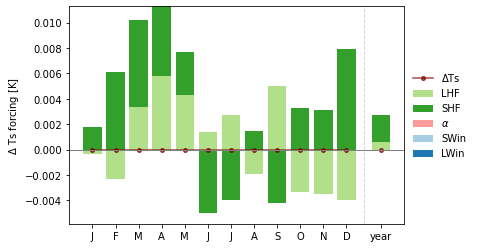

In [8]:
dT_month1 = do_STDC(TSR_harv_frst_mpiesm_seas,dTSR_harv_frst_mpiesm_seas, SWin_harv_frst_mpiesm_seas,SWout_harv_frst_mpiesm_seas,SWin_ctl_harv_frst_mpiesm_seas,SWout_ctl_harv_frst_mpiesm_seas,dSWin_harv_frst_mpiesm_seas,dLWin_harv_frst_mpiesm_seas,dLHF_harv_frst_mpiesm_seas,dSHF_harv_frst_mpiesm_seas)
dT_year1 = do_STDC(float(TSR_harv_frst_mpiesm_avg),float(dTSR_harv_frst_mpiesm_avg), float(SWin_harv_frst_mpiesm_avg),float(SWout_harv_frst_mpiesm_avg),float(SWin_ctl_harv_frst_mpiesm_avg),float(SWout_ctl_harv_frst_mpiesm_avg),float(dSWin_harv_frst_mpiesm_avg),float(dLWin_harv_frst_mpiesm_avg),float(dLHF_harv_frst_mpiesm_avg),float(dSHF_harv_frst_mpiesm_avg))
plot_STDC_seas(dT_month1,dT_year1)


In [ ]:
dT_year1 = do_STDC(float(TSR_harv_frst_cesm_avg),float(dTSR_harv_frst_cesm_avg), float(SWin_harv_frst_cesm_avg),float(SWout_harv_frst_cesm_avg),float(SWin_ctl_harv_frst_cesm_avg),float(SWout_ctl_harv_frst_cesm_avg),float(dSWin_harv_frst_cesm_avg),float(dLWin_harv_frst_cesm_avg),float(dLHF_harv_frst_cesm_avg),float(dSHF_harv_frst_cesm_avg))
plot_STDC_seas(dT_year1)
